# Matts Data Exploration Notebook

In [2]:
#Import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

In [3]:
#Read the data into notebook
df=pd.read_csv('zillow_data.csv')

In [4]:
df.head()

RegionID  RegionName      City State              Metro CountyName  \
0     84654       60657   Chicago    IL            Chicago       Cook   
1     90668       75070  McKinney    TX  Dallas-Fort Worth     Collin   
2     91982       77494      Katy    TX            Houston     Harris   
3     84616       60614   Chicago    IL            Chicago       Cook   
4     93144       79936   El Paso    TX            El Paso    El Paso   

   SizeRank   1996-04   1996-05   1996-06  ...  2017-07  2017-08  2017-09  \
0         1  334200.0  335400.0  336500.0  ...  1005500  1007500  1007800   
1         2  235700.0  236900.0  236700.0  ...   308000   310000   312500   
2         3  210400.0  212200.0  212200.0  ...   321000   320600   320200   
3         4  498100.0  500900.0  503100.0  ...  1289800  1287700  1287400   
4         5   77300.0   77300.0   77300.0  ...   119100   119400   120000   

   2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
0  1009600  1013300  1018700  1024400  1030700  1033800  1030600  
1   314100   315000   316600   318100   319600   321100   321800  
2   320400   320800   321200   321200   323000   326900   329900  
3  1291500  1296600  1299000  1302700  1306400  1308500  1307000  
4   120300   120300   120300   120300   120500   121000   121500  

[5 rows x 272 columns]

### Try and get Dates alone

In [5]:
filter_col1 = [col for col in df if col.startswith('20')]

In [6]:
filter_col2=[col for col in df if col.startswith('199')]

In [7]:
filter_col1.append(filter_col2)

In [8]:
dates_df=df.drop(['RegionID','RegionName','City','State','Metro','CountyName','SizeRank'],axis=1)

In [9]:
dates_df2=dates_df.stack().reset_index()

In [10]:
dates_df2

level_0  level_1         0
0              0  1996-04  334200.0
1              0  1996-05  335400.0
2              0  1996-06  336500.0
3              0  1996-07  337600.0
4              0  1996-08  338500.0
...          ...      ...       ...
3744699    14722  2017-12  348900.0
3744700    14722  2018-01  350400.0
3744701    14722  2018-02  353000.0
3744702    14722  2018-03  356000.0
3744703    14722  2018-04  357200.0

[3744704 rows x 3 columns]

In [11]:
dates_df2=dates_df2.rename({'level_1':'Date',0:'Median_Value'},axis='columns')

In [12]:
dates_df2.drop(['level_0'],axis=1,inplace=True)

In [13]:
dates_df2.columns

Index(['Date', 'Median_Value'], dtype='object')

In [14]:
dates_df2['Date']=pd.to_datetime(dates_df2['Date'])

In [15]:
dates_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3744704 entries, 0 to 3744703
Data columns (total 2 columns):
 #   Column        Dtype         
---  ------        -----         
 0   Date          datetime64[ns]
 1   Median_Value  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.1 MB


In [16]:
dates_df2.set_index('Date',inplace=True)

In [17]:
dates_df2

Median_Value
Date                    
1996-04-01      334200.0
1996-05-01      335400.0
1996-06-01      336500.0
1996-07-01      337600.0
1996-08-01      338500.0
...                  ...
2017-12-01      348900.0
2018-01-01      350400.0
2018-02-01      353000.0
2018-03-01      356000.0
2018-04-01      357200.0

[3744704 rows x 1 columns]

In [18]:
into_df=['RegionID','RegionName','City','State','Metro','CountyName','SizeRank']

In [19]:
other_df= df[into_df]

In [20]:
other_df

RegionID  RegionName                 City State              Metro  \
0         84654       60657              Chicago    IL            Chicago   
1         90668       75070             McKinney    TX  Dallas-Fort Worth   
2         91982       77494                 Katy    TX            Houston   
3         84616       60614              Chicago    IL            Chicago   
4         93144       79936              El Paso    TX            El Paso   
...         ...         ...                  ...   ...                ...   
14718     58333        1338             Ashfield    MA    Greenfield Town   
14719     59107        3293            Woodstock    NH          Claremont   
14720     75672       40404                Berea    KY           Richmond   
14721     93733       81225  Mount Crested Butte    CO                NaN   
14722     95851       89155             Mesquite    NV          Las Vegas   

      CountyName  SizeRank  
0           Cook         1  
1         Collin         2  
2         Harris         3  
3           Cook         4  
4        El Paso         5  
...          ...       ...  
14718   Franklin     14719  
14719    Grafton     14720  
14720    Madison     14721  
14721   Gunnison     14722  
14722      Clark     14723  

[14723 rows x 7 columns]

### Try new direction

In [21]:
def melt_data2(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted

In [22]:
df=melt_data2(df)

In [23]:
df.set_index('time',inplace=True)

In [24]:
df.RegionID.value_counts().sort_values()

76690     46
99281     46
79637     46
73597     46
85339     46
        ... 
77986    265
92334    265
77984    265
86185    265
99930    265
Name: RegionID, Length: 14723, dtype: int64

In [25]:
df

RegionName  RegionID  SizeRank                 City State  \
time                                                                    
1996-04-01       60657     84654         1              Chicago    IL   
1996-04-01       75070     90668         2             McKinney    TX   
1996-04-01       77494     91982         3                 Katy    TX   
1996-04-01       60614     84616         4              Chicago    IL   
1996-04-01       79936     93144         5              El Paso    TX   
...                ...       ...       ...                  ...   ...   
2018-04-01        1338     58333     14719             Ashfield    MA   
2018-04-01        3293     59107     14720            Woodstock    NH   
2018-04-01       40404     75672     14721                Berea    KY   
2018-04-01       81225     93733     14722  Mount Crested Butte    CO   
2018-04-01       89155     95851     14723             Mesquite    NV   

                        Metro CountyName     value  
time                                                
1996-04-01            Chicago       Cook  334200.0  
1996-04-01  Dallas-Fort Worth     Collin  235700.0  
1996-04-01            Houston     Harris  210400.0  
1996-04-01            Chicago       Cook  498100.0  
1996-04-01            El Paso    El Paso   77300.0  
...                       ...        ...       ...  
2018-04-01    Greenfield Town   Franklin  209300.0  
2018-04-01          Claremont    Grafton  225800.0  
2018-04-01           Richmond    Madison  133400.0  
2018-04-01                NaN   Gunnison  664400.0  
2018-04-01          Las Vegas      Clark  357200.0  

[3744704 rows x 8 columns]

In [26]:
#font = {'family' : 'normal',
        #'weight' : 'bold',
        #'size'   : 22}

#plt.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

In [27]:
list2=['RegionID','value']
df_plot= df[list2]

In [28]:
df_plot

RegionID     value
time                          
1996-04-01     84654  334200.0
1996-04-01     90668  235700.0
1996-04-01     91982  210400.0
1996-04-01     84616  498100.0
1996-04-01     93144   77300.0
...              ...       ...
2018-04-01     58333  209300.0
2018-04-01     59107  225800.0
2018-04-01     75672  133400.0
2018-04-01     93733  664400.0
2018-04-01     95851  357200.0

[3744704 rows x 2 columns]

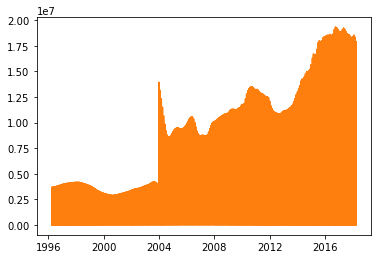

In [29]:
fig,ax= plt.subplots()
ax.plot(df_plot)


In [30]:
new_df=df.groupby(['time','City','RegionID']).mean()

In [31]:
new_df

RegionName  SizeRank     value
time       City         RegionID                                
1996-04-01 Abbeville    88633          70510      4358   47900.0
           Aberdeen     66718          21001      4197  110800.0
                        69850          28315      7078   79800.0
                        94053          83210     12949   65100.0
                        99840          98520      5029   86600.0
...                                      ...       ...       ...
2018-04-01 Zionsville   77955          46077      3608  394800.0
           Zionville    70145          28698     13180  164800.0
           Zumbro Falls 82545          55991     14454  262800.0
           Zumbrota     82546          55992     10870  191600.0
           Zuni         67864          23898     13586  190300.0

[3744704 rows x 3 columns]

In [32]:
new_df.drop(['RegionName','SizeRank'],axis=1,inplace=True)

In [33]:
new_df

value
time       City         RegionID          
1996-04-01 Abbeville    88633      47900.0
           Aberdeen     66718     110800.0
                        69850      79800.0
                        94053      65100.0
                        99840      86600.0
...                                    ...
2018-04-01 Zionsville   77955     394800.0
           Zionville    70145     164800.0
           Zumbro Falls 82545     262800.0
           Zumbrota     82546     191600.0
           Zuni         67864     190300.0

[3744704 rows x 1 columns]

In [34]:
plot_this= df[['RegionID','value']]

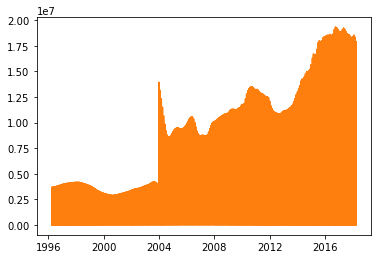

In [35]:
fig,ax=plt.subplots()
ax.plot(plot_this)

In [36]:
plot_this.isna().sum()

RegionID    0
value       0
dtype: int64

In [37]:
# Rename RegionName to be Zipcode
df=df.rename({'RegionName':'Zipcode'},axis='columns')

In [38]:
df

Zipcode  RegionID  SizeRank                 City State  \
time                                                                 
1996-04-01    60657     84654         1              Chicago    IL   
1996-04-01    75070     90668         2             McKinney    TX   
1996-04-01    77494     91982         3                 Katy    TX   
1996-04-01    60614     84616         4              Chicago    IL   
1996-04-01    79936     93144         5              El Paso    TX   
...             ...       ...       ...                  ...   ...   
2018-04-01     1338     58333     14719             Ashfield    MA   
2018-04-01     3293     59107     14720            Woodstock    NH   
2018-04-01    40404     75672     14721                Berea    KY   
2018-04-01    81225     93733     14722  Mount Crested Butte    CO   
2018-04-01    89155     95851     14723             Mesquite    NV   

                        Metro CountyName     value  
time                                                
1996-04-01            Chicago       Cook  334200.0  
1996-04-01  Dallas-Fort Worth     Collin  235700.0  
1996-04-01            Houston     Harris  210400.0  
1996-04-01            Chicago       Cook  498100.0  
1996-04-01            El Paso    El Paso   77300.0  
...                       ...        ...       ...  
2018-04-01    Greenfield Town   Franklin  209300.0  
2018-04-01          Claremont    Grafton  225800.0  
2018-04-01           Richmond    Madison  133400.0  
2018-04-01                NaN   Gunnison  664400.0  
2018-04-01          Las Vegas      Clark  357200.0  

[3744704 rows x 8 columns]

In [39]:
#drop no longer relevant columns
df.drop(['RegionID','SizeRank','City','CountyName'],axis=1,inplace=True)

In [40]:
df

Zipcode State              Metro     value
time                                                  
1996-04-01    60657    IL            Chicago  334200.0
1996-04-01    75070    TX  Dallas-Fort Worth  235700.0
1996-04-01    77494    TX            Houston  210400.0
1996-04-01    60614    IL            Chicago  498100.0
1996-04-01    79936    TX            El Paso   77300.0
...             ...   ...                ...       ...
2018-04-01     1338    MA    Greenfield Town  209300.0
2018-04-01     3293    NH          Claremont  225800.0
2018-04-01    40404    KY           Richmond  133400.0
2018-04-01    81225    CO                NaN  664400.0
2018-04-01    89155    NV          Las Vegas  357200.0

[3744704 rows x 4 columns]

### Create a Arizona dataframe and focus only on Arizona for now

In [41]:
Arizona_df= df[(df['State'] == 'AZ')]

In [42]:
Arizona_df

Zipcode State     Metro     value
time                                         
1996-04-01    85032    AZ   Phoenix   95400.0
1996-04-01    85710    AZ    Tucson   94600.0
1996-04-01    85225    AZ   Phoenix  101200.0
1996-04-01    85308    AZ   Phoenix  124800.0
1996-04-01    85281    AZ   Phoenix   81200.0
...             ...   ...       ...       ...
2018-04-01    86332    AZ  Prescott  172500.0
2018-04-01    85645    AZ    Tucson  152300.0
2018-04-01    85928    AZ  Show Low  225100.0
2018-04-01    85637    AZ   Nogales  320000.0
2018-04-01    85611    AZ   Nogales  269000.0

[58775 rows x 4 columns]

In [43]:
print('Number of Zipcodes in Arizona_df:', Arizona_df['Zipcode'].nunique())

Number of Zipcodes in Arizona_df: 230


In [44]:
Arizona_df_grouped=Arizona_df.groupby('Zipcode').mean()

In [45]:
Arizona_df_grouped

value
Zipcode               
85003    267899.245283
85008    124401.132075
85012    347115.471698
85013    189566.792453
85014    186123.018868
...                ...
86413    106110.112360
86426    142161.132075
86429    183313.962264
86440    124294.339623
86442    125302.641509

[230 rows x 1 columns]

In [46]:
Arizona_grouped = Arizona_df.groupby(['Zipcode'], as_index = True).resample('M').sum()
Arizona_grouped.drop(columns = 'Zipcode', inplace = True)
Arizona_grouped.head()

value
Zipcode time                
85003   1996-04-30  109700.0
        1996-05-31  110500.0
        1996-06-30  111300.0
        1996-07-31  112200.0
        1996-08-31  113100.0

In [47]:
metro_group = Arizona_df.groupby('Metro')

In [48]:
metro_group = metro_group.value.mean()
metro_group = metro_group.sort_values(ascending=False).head(10)

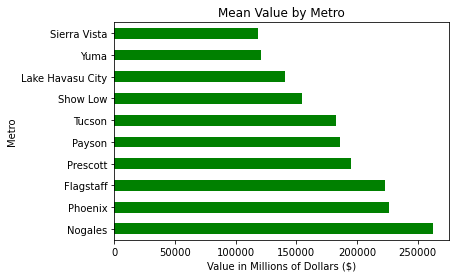

<Figure size 432x288 with 0 Axes>

In [52]:
metro_group.plot.barh(color='green')
plt.title('Mean Value by Metro')
plt.xlabel('Value in Millions of Dollars ($)')
plt.show()

In [51]:
metro_group

Metro
Nogales             262909.859155
Phoenix             226303.873261
Flagstaff           223125.125990
Prescott            195169.015588
Payson              185970.270270
Tucson              182765.870547
Show Low            154669.272237
Lake Havasu City    140700.819352
Yuma                121157.132075
Sierra Vista        118178.275731
Name: value, dtype: float64

In [70]:
# stationarity check with Dickey-Fuller test
def stationarity_check(df):
    '''Takes time series dataframe and returns with results for Dickey-Fuller test'''
    dftest = adfuller(df.dropna())
    print('\nResults of Dickey-Fuller Test: \n')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [71]:
stationarity_check(Arizona_grouped)


Results of Dickey-Fuller Test: 

Test Statistic                -1.255244e+01
p-value                        2.190871e-23
#Lags Used                     6.000000e+01
Number of Observations Used    5.871400e+04
Critical Value (1%)           -3.430461e+00
Critical Value (5%)           -2.861589e+00
Critical Value (10%)          -2.566796e+00
dtype: float64


In [124]:
def plot_zip(zipcode):
    series = Arizona_grouped_recent.loc[zipcode,'value']
    fig, ax = plt.subplots(figsize=(18,5))
    series.plot(ax=ax)
    ax.set_title(zipcode);

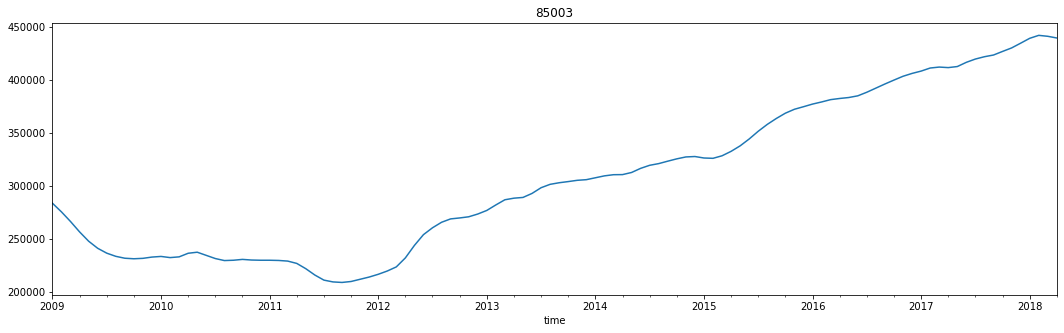

In [125]:
plot_zip(85003)

In [111]:
Arizona_recent_yrs=Arizona_df['2009-01-01':'2018-04-01']

In [112]:
Arizona_grouped_recent = Arizona_recent_yrs.groupby(['Zipcode'], as_index = True).resample('M').sum()
Arizona_grouped_recent.drop(columns = 'Zipcode', inplace = True)
Arizona_grouped_recent.head()

value
Zipcode time                
85003   2009-01-31  283500.0
        2009-02-28  275300.0
        2009-03-31  266200.0
        2009-04-30  256400.0
        2009-05-31  247600.0

In [113]:
Arizona_grouped_recent.shape

(25520, 1)

In [72]:
stationarity_check(Arizona_grouped_recent)


Results of Dickey-Fuller Test: 

Test Statistic                -1.064732e+01
p-value                        4.758623e-19
#Lags Used                     7.000000e+00
Number of Observations Used    2.551200e+04
Critical Value (1%)           -3.430606e+00
Critical Value (5%)           -2.861653e+00
Critical Value (10%)          -2.566830e+00
dtype: float64


In [80]:
Arizona_grouped_recent.index

MultiIndex([(85003, '2009-01-31'),
            (85003, '2009-02-28'),
            (85003, '2009-03-31'),
            (85003, '2009-04-30'),
            (85003, '2009-05-31'),
            (85003, '2009-06-30'),
            (85003, '2009-07-31'),
            (85003, '2009-08-31'),
            (85003, '2009-09-30'),
            (85003, '2009-10-31'),
            ...
            (86442, '2017-07-31'),
            (86442, '2017-08-31'),
            (86442, '2017-09-30'),
            (86442, '2017-10-31'),
            (86442, '2017-11-30'),
            (86442, '2017-12-31'),
            (86442, '2018-01-31'),
            (86442, '2018-02-28'),
            (86442, '2018-03-31'),
            (86442, '2018-04-30')],
           names=['Zipcode', 'time'], length=25520)

In [96]:
Arizona_grouped_recent.index.names

FrozenList(['Zipcode', 'time'])

In [102]:
# Use pandas grouper to group values using annual frequency
Arizona_grouped_recent.index[1000]

(85020, Timestamp('2017-09-30 00:00:00'))

In [106]:
Arizona_df.Zipcode.unique()

230

<ipython-input-124-30c3c16c9f16>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(18,5))


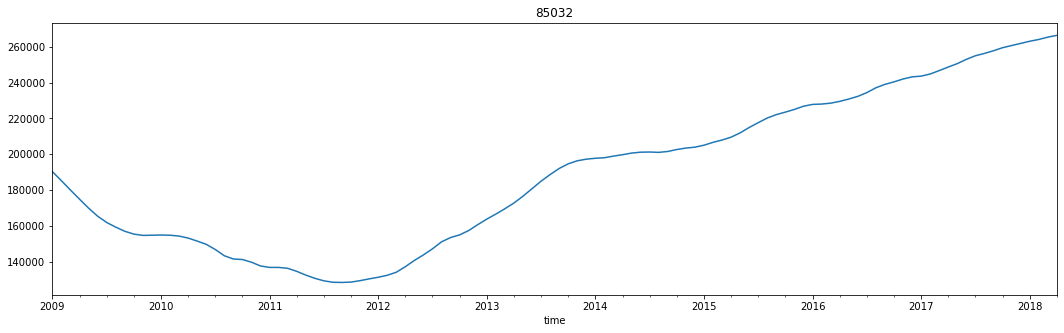

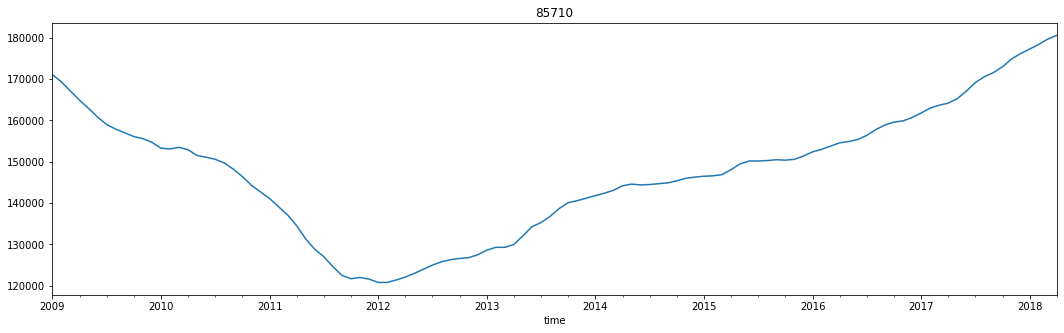

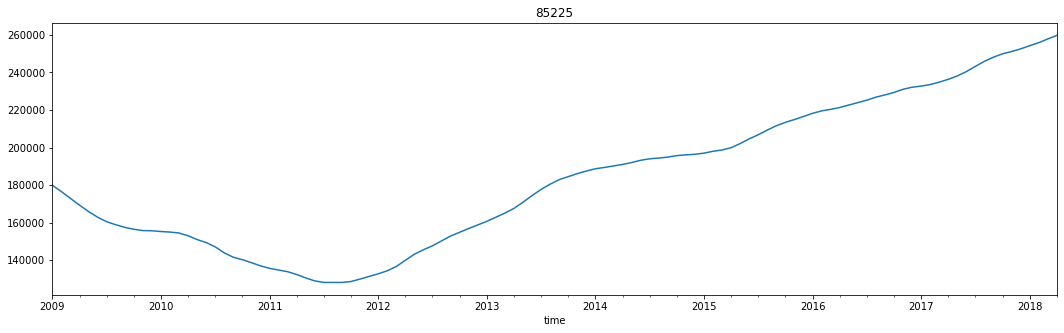

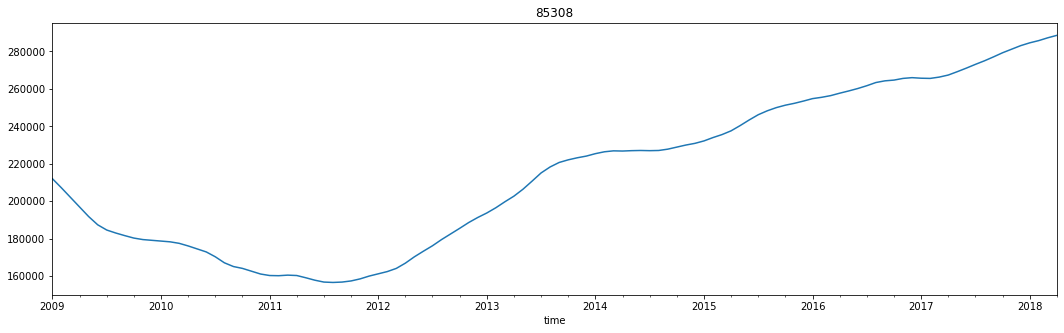

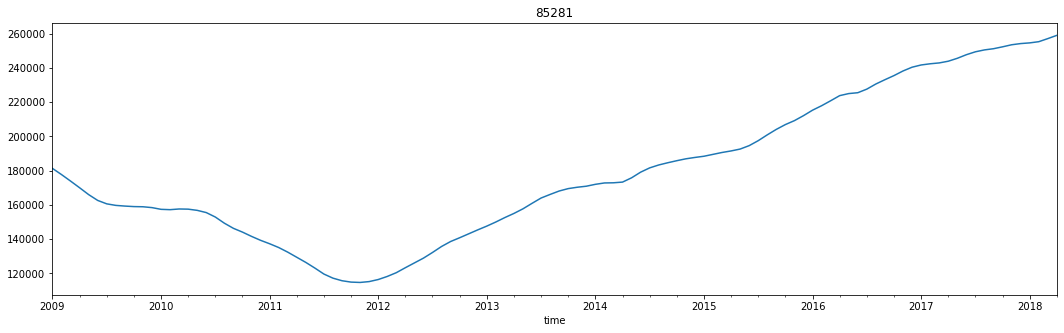

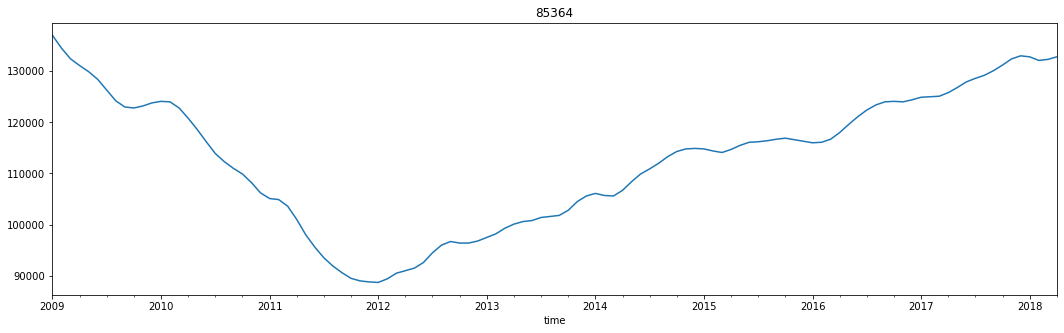

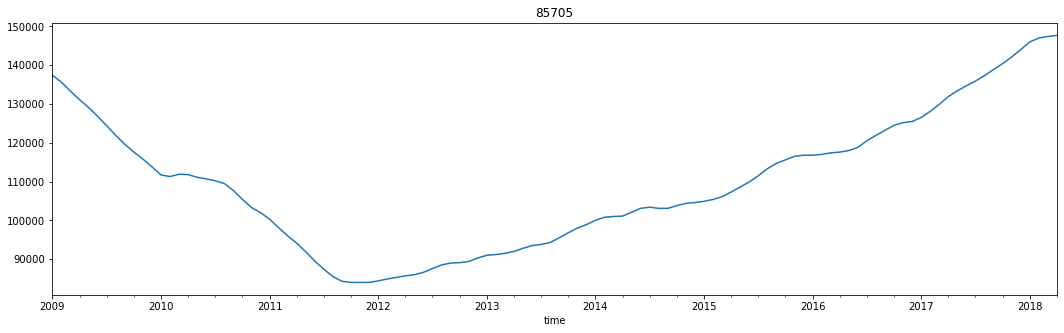

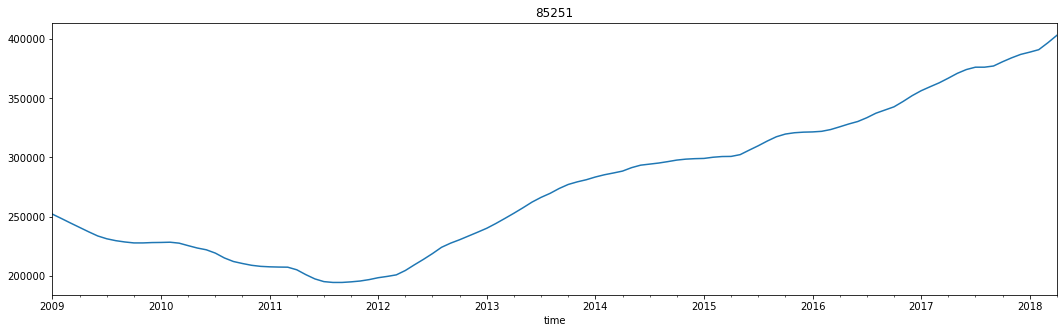

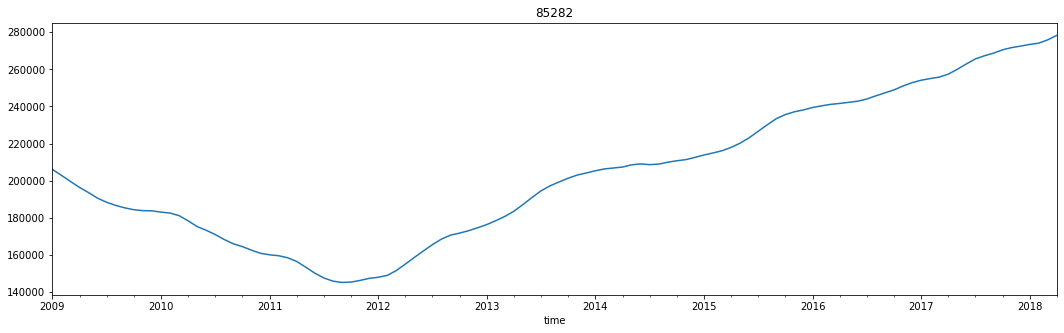

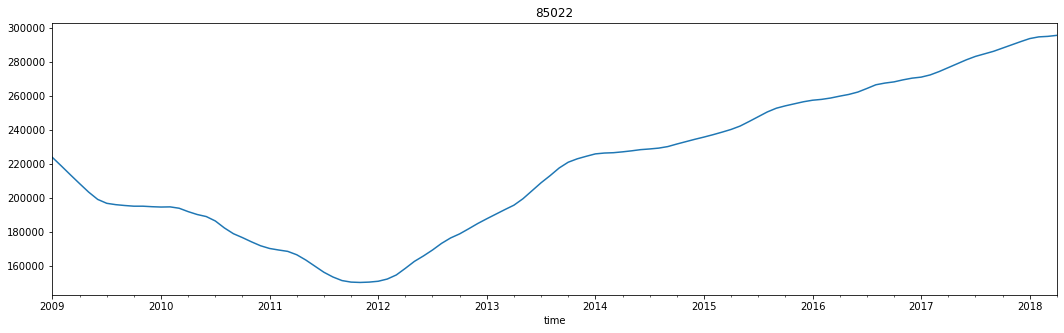

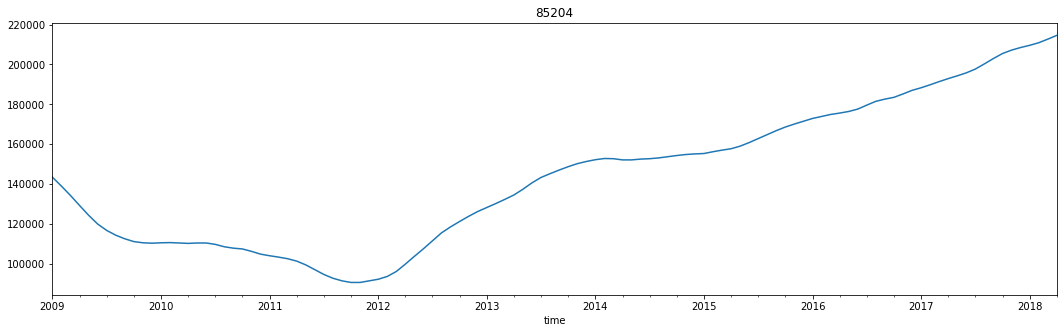

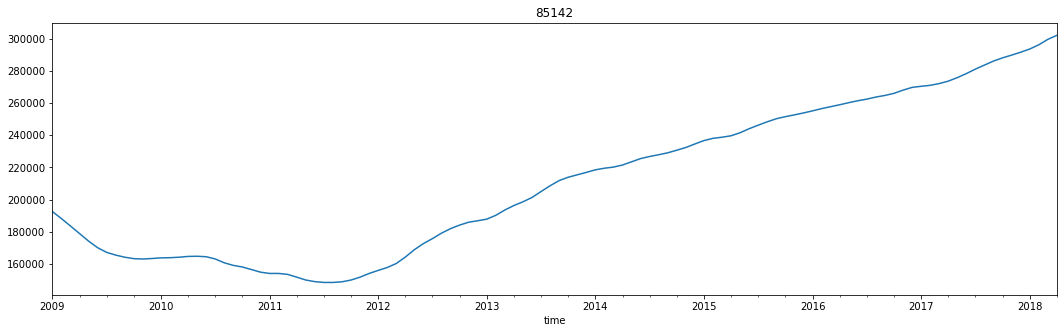

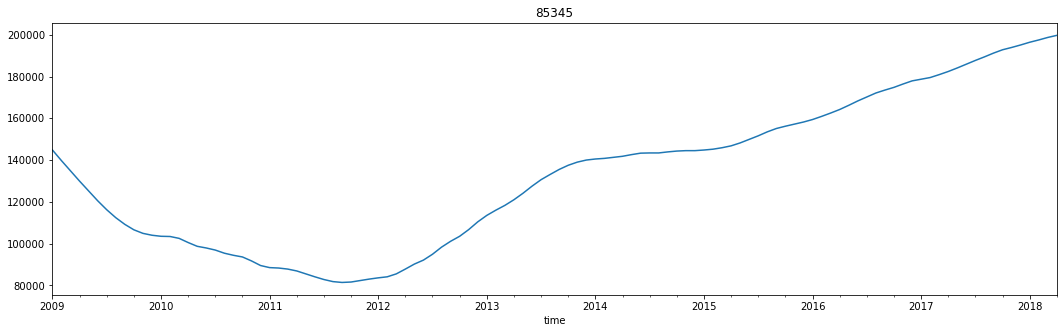

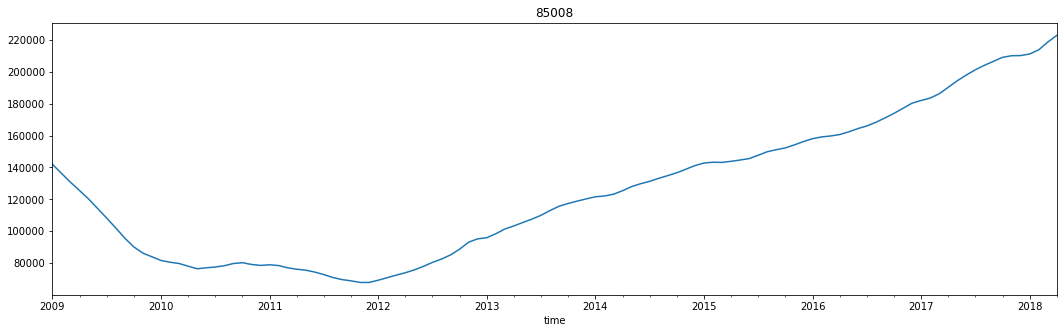

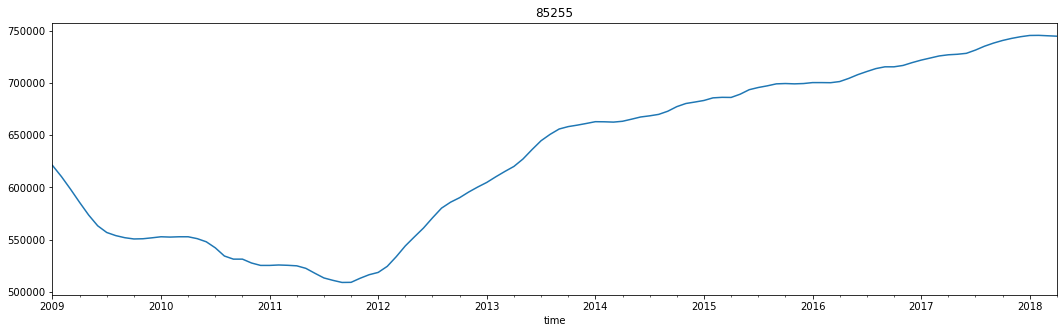

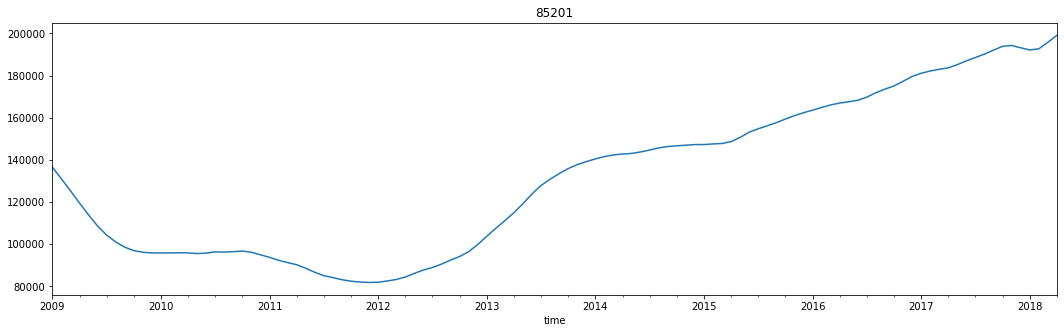

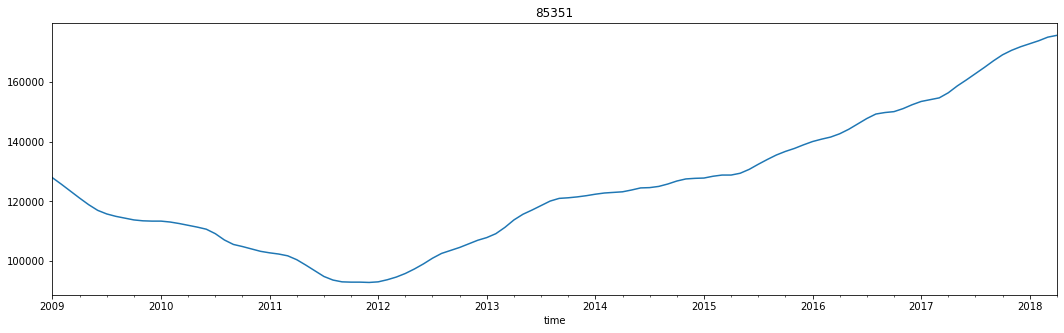

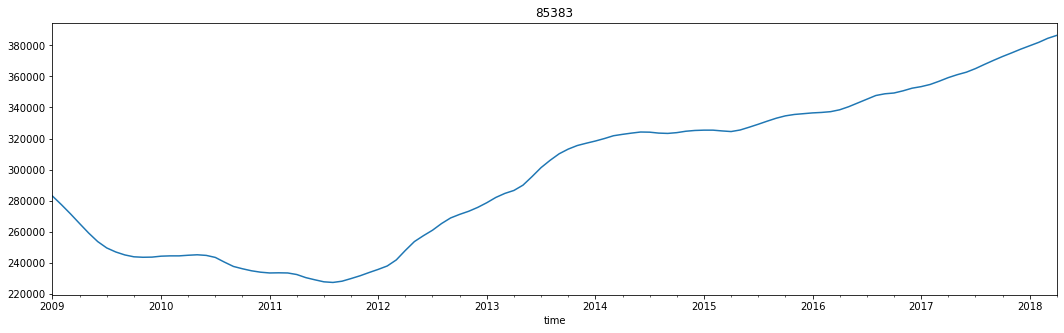

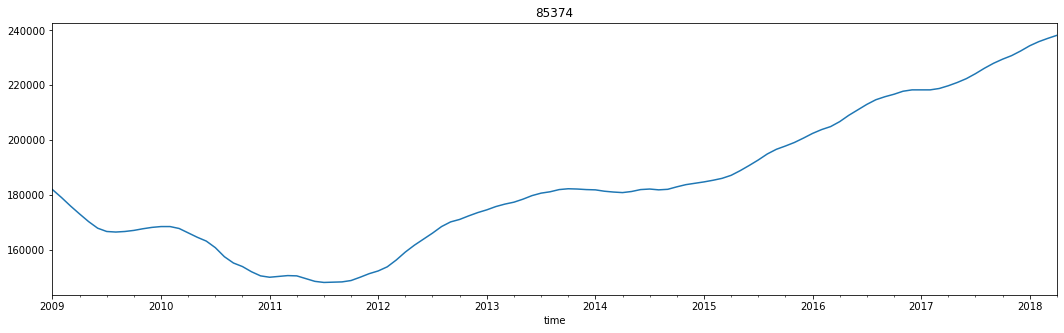

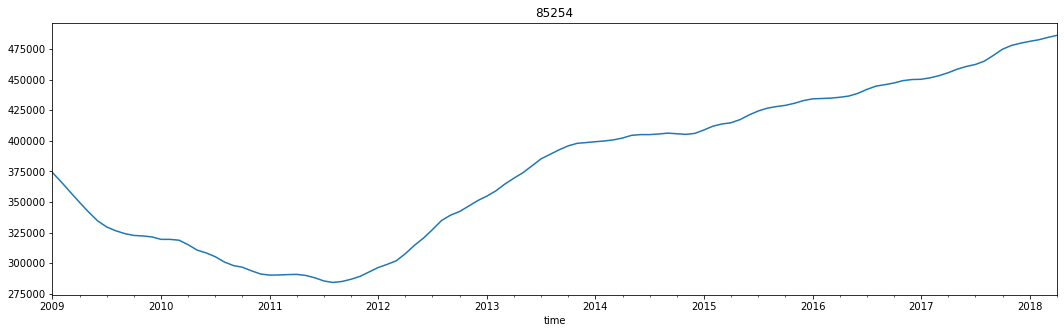

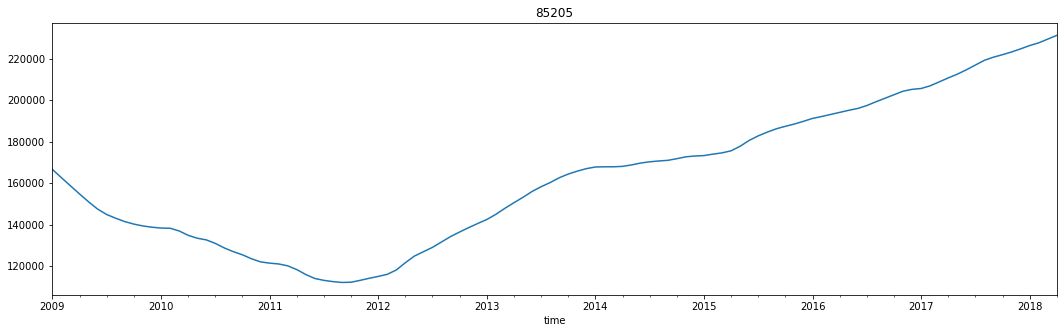

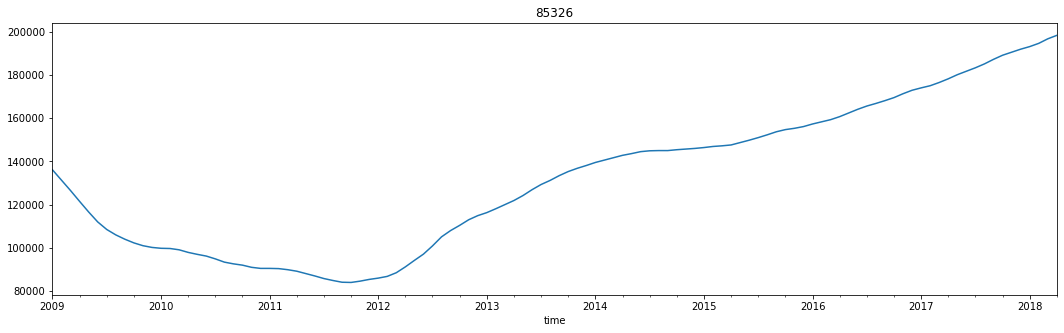

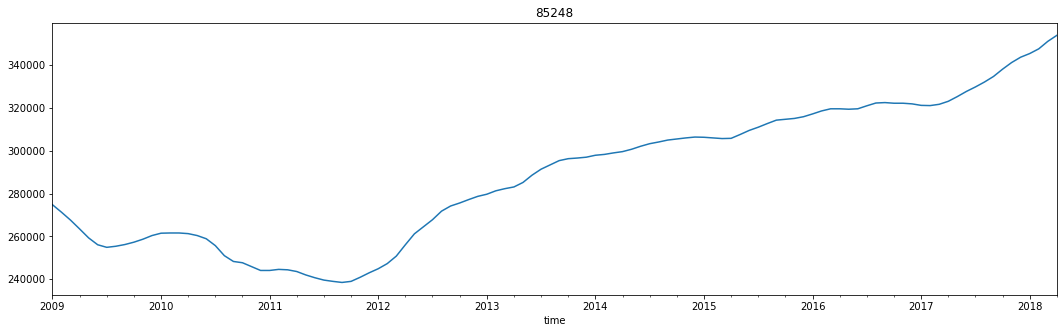

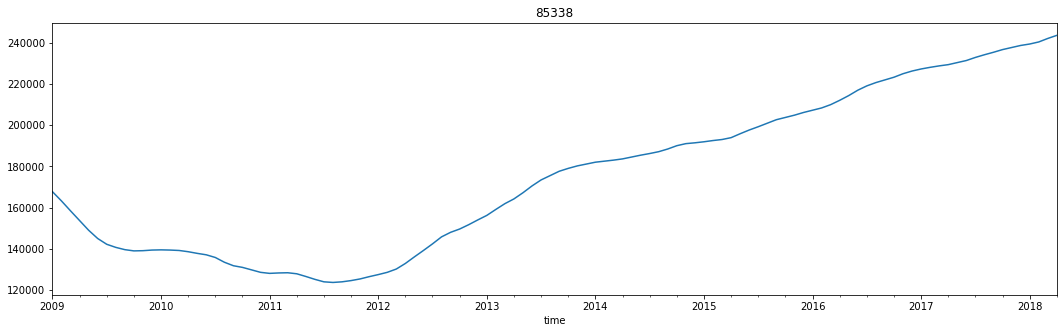

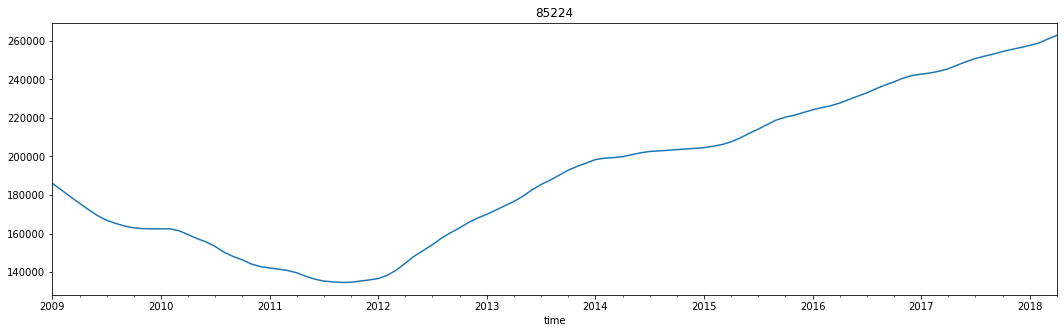

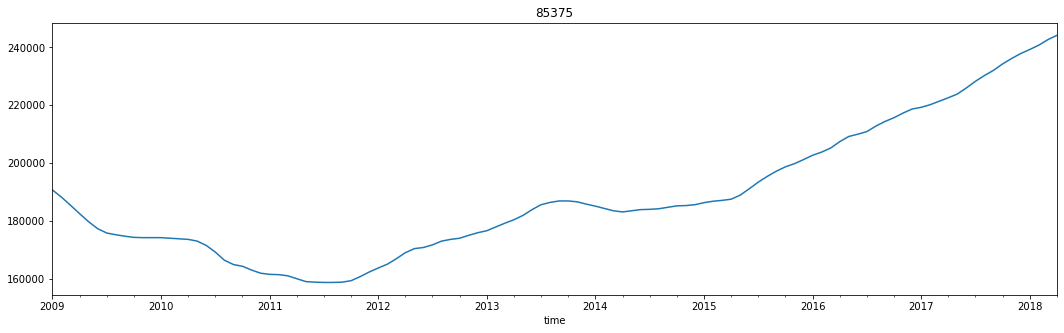

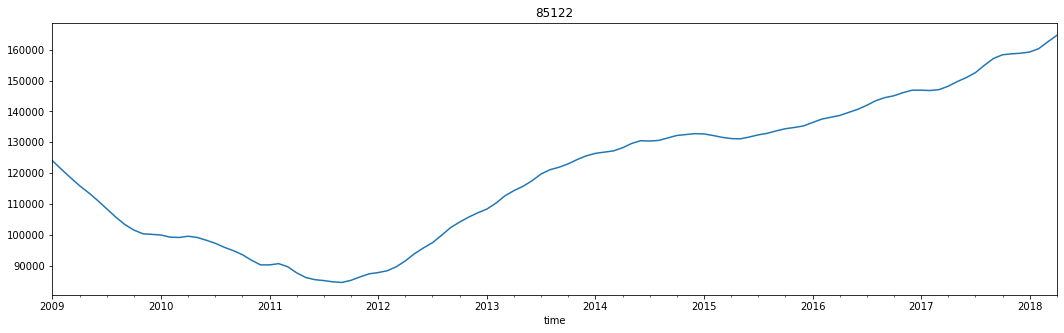

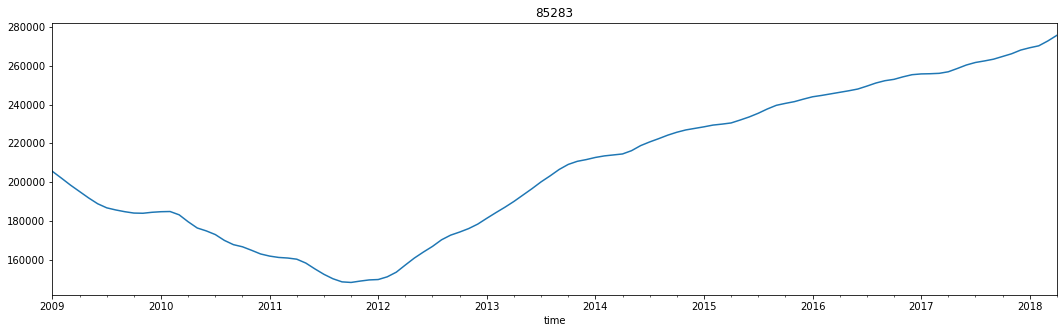

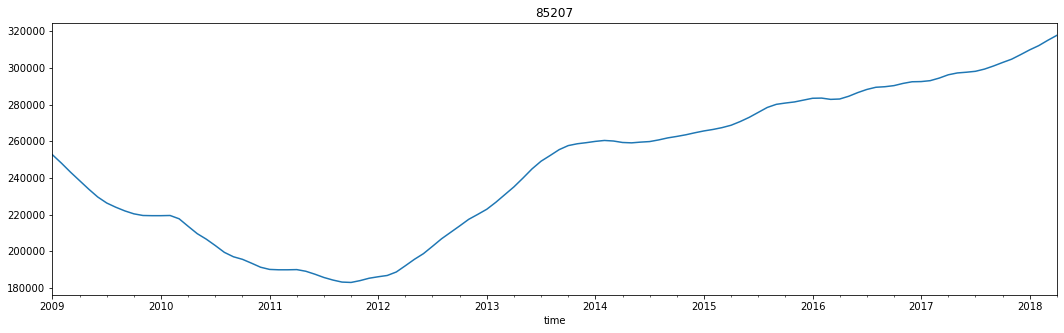

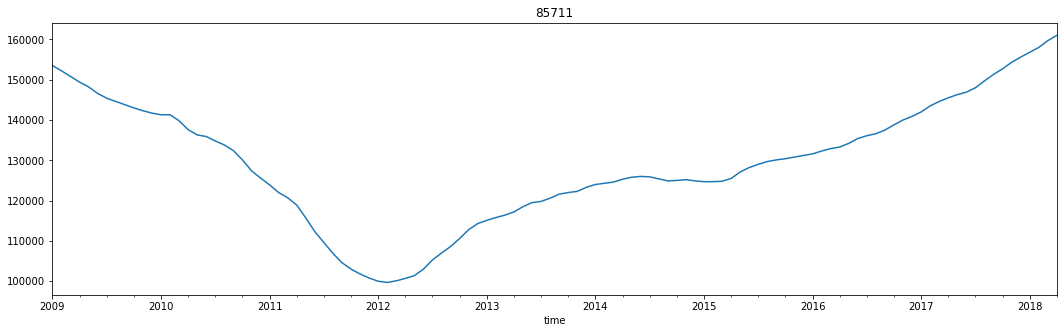

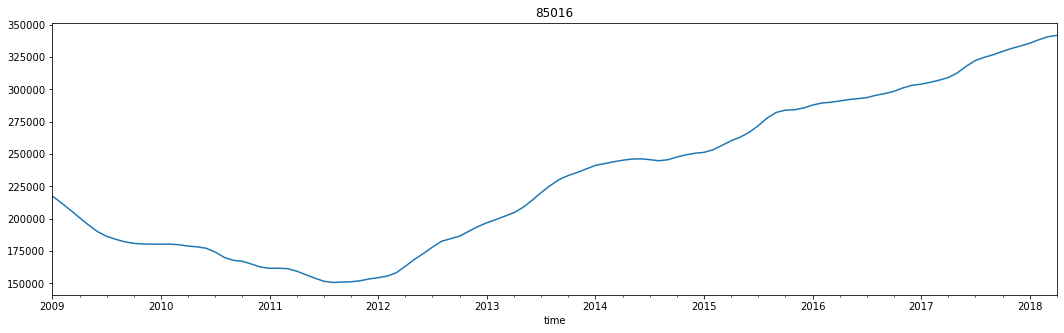

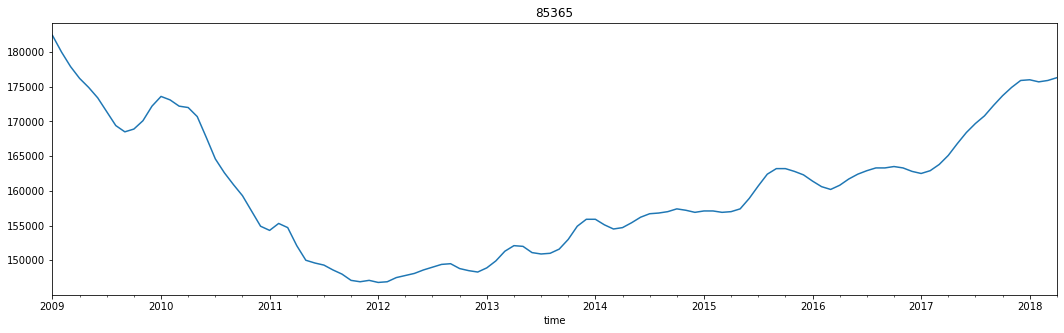

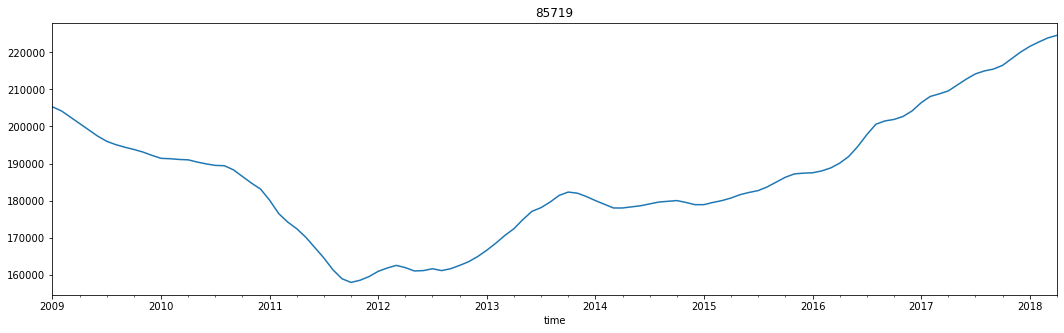

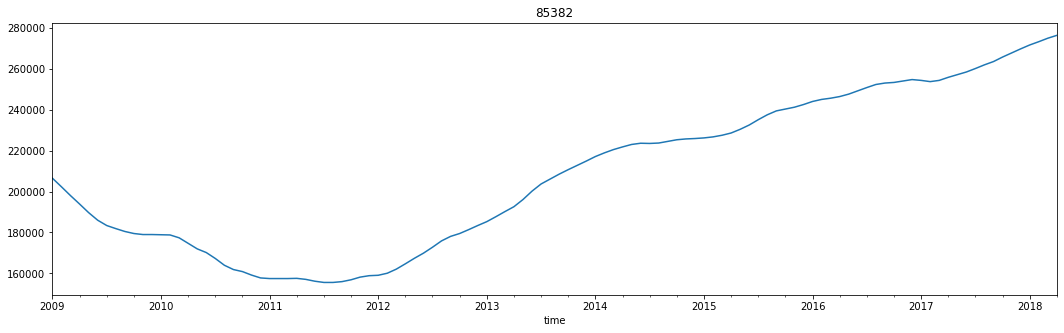

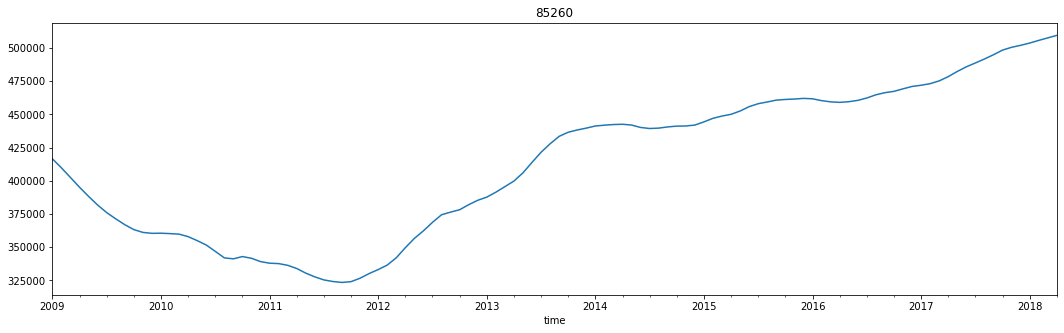

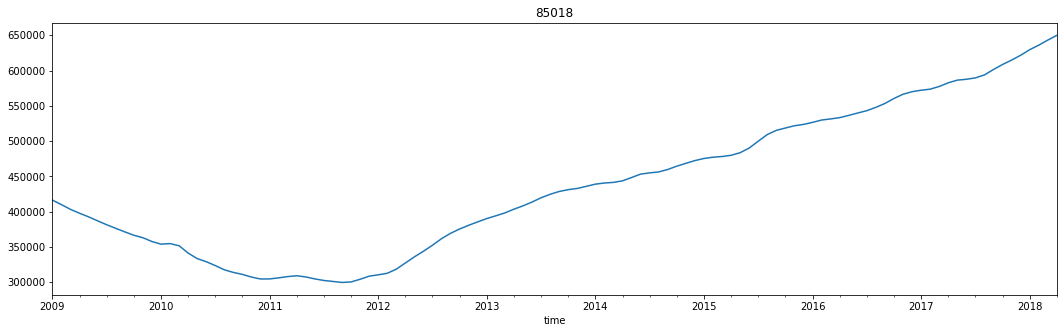

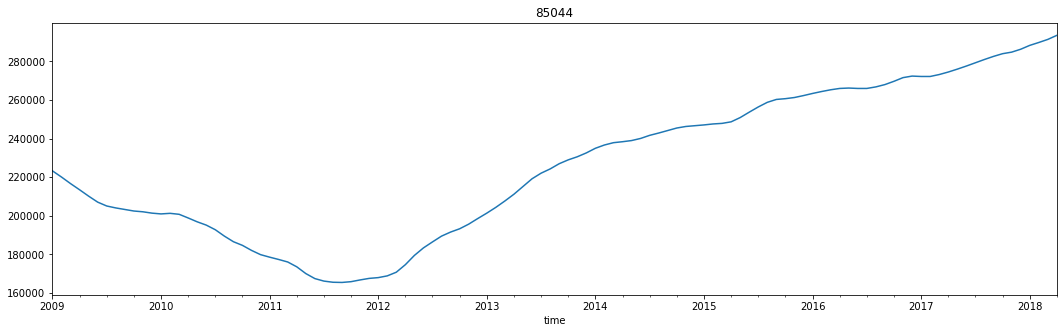

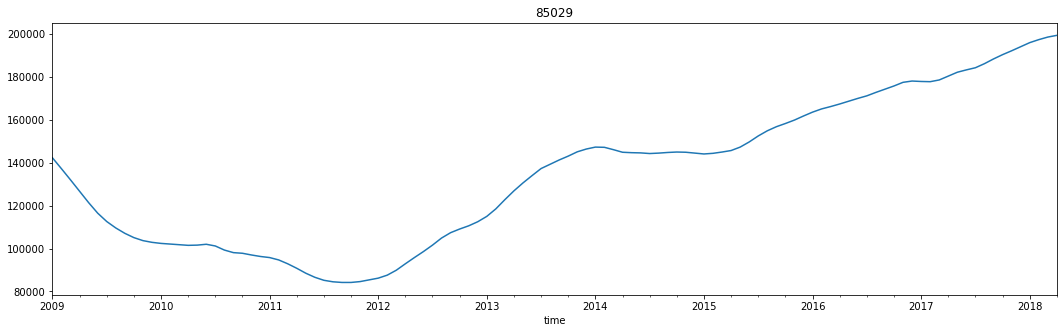

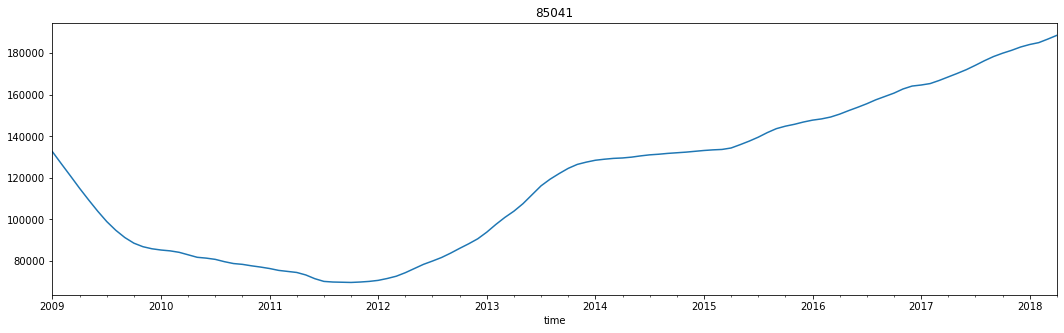

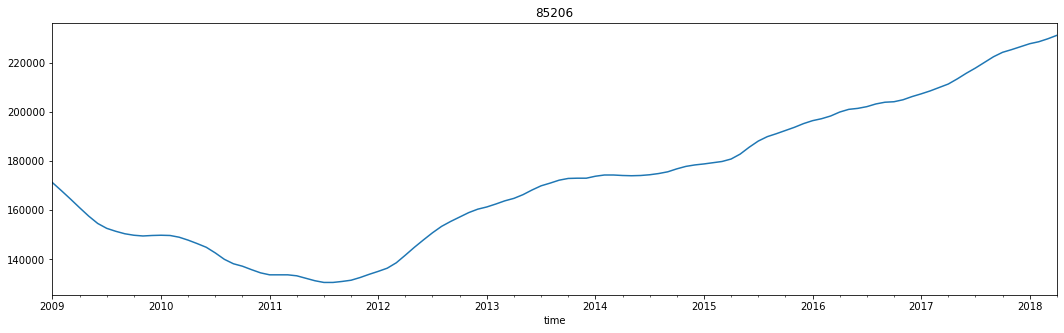

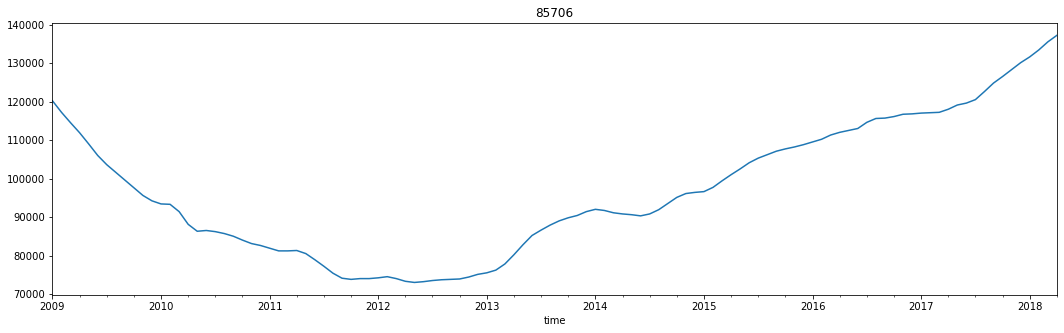

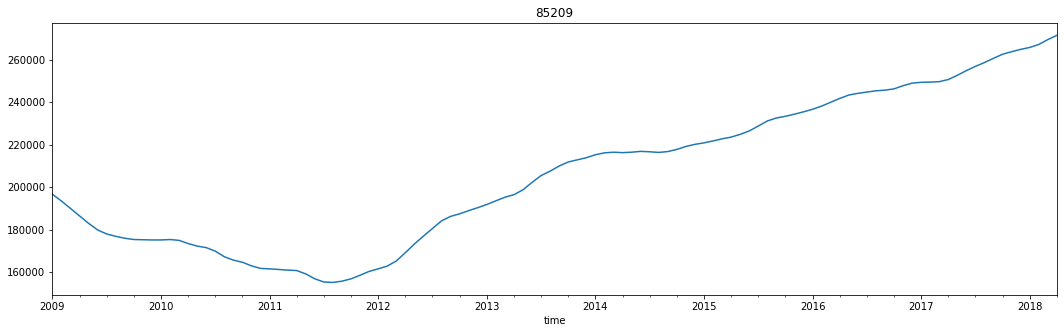

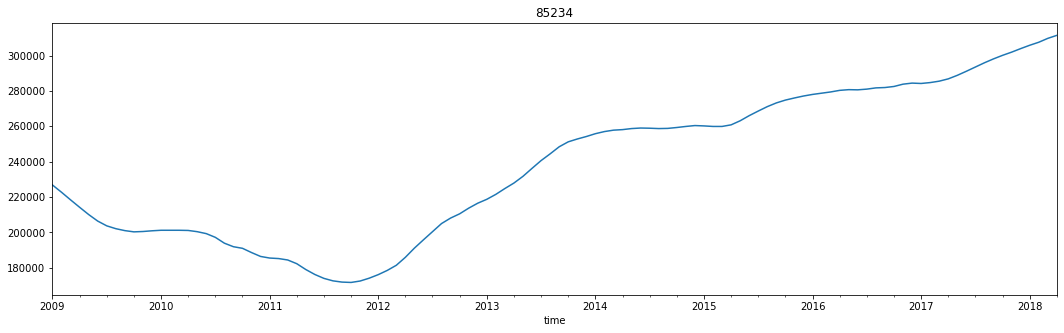

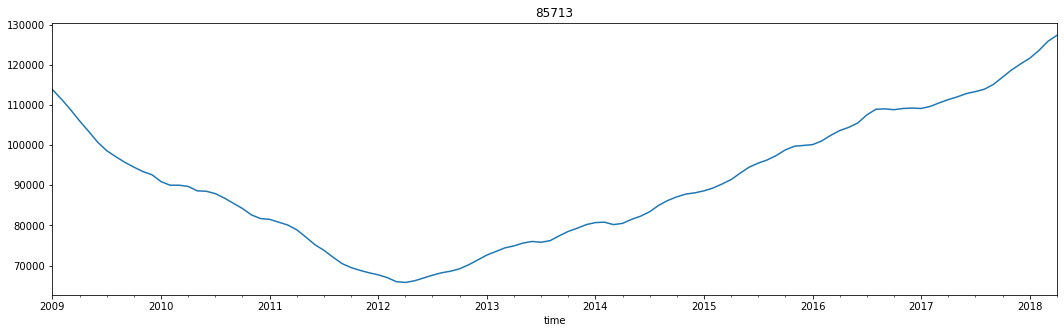

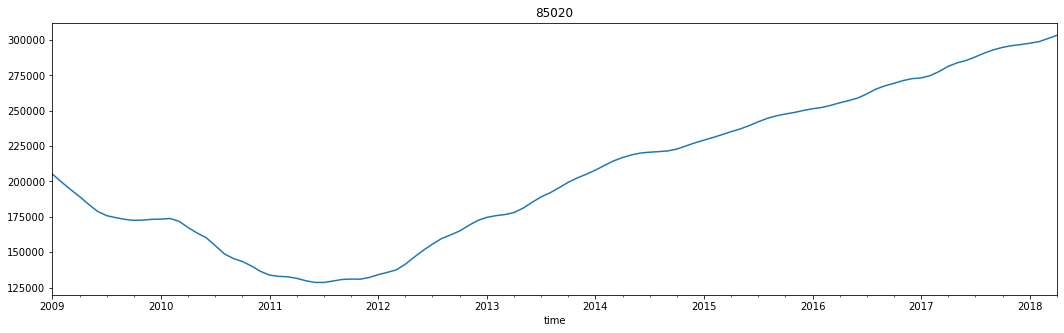

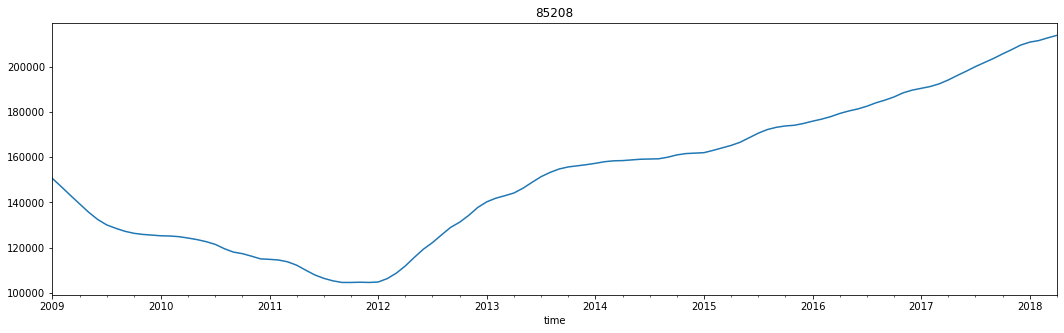

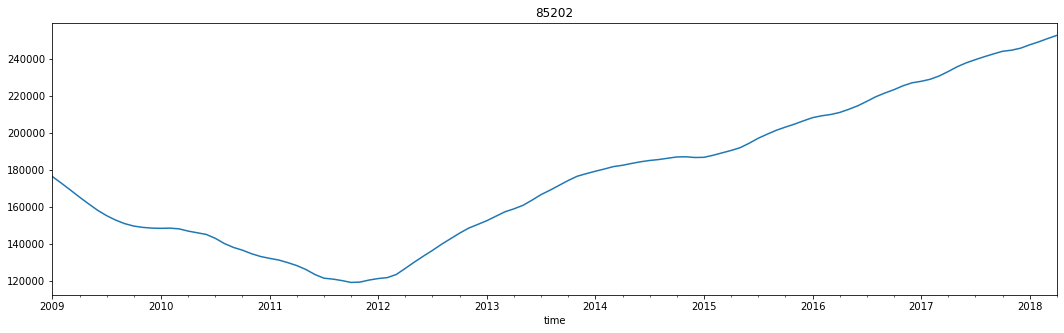

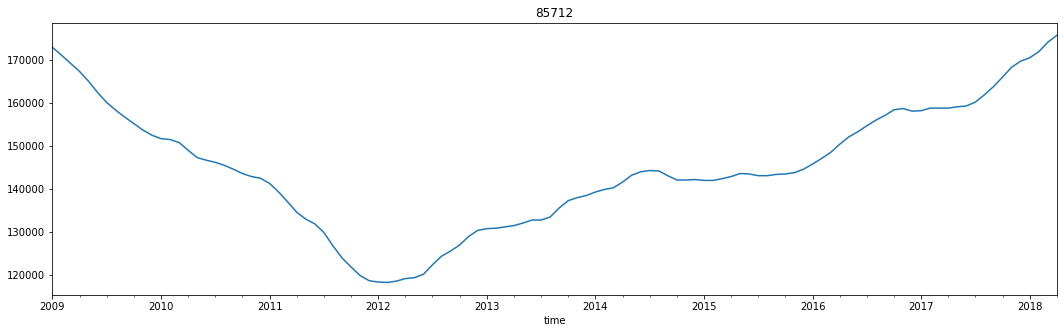

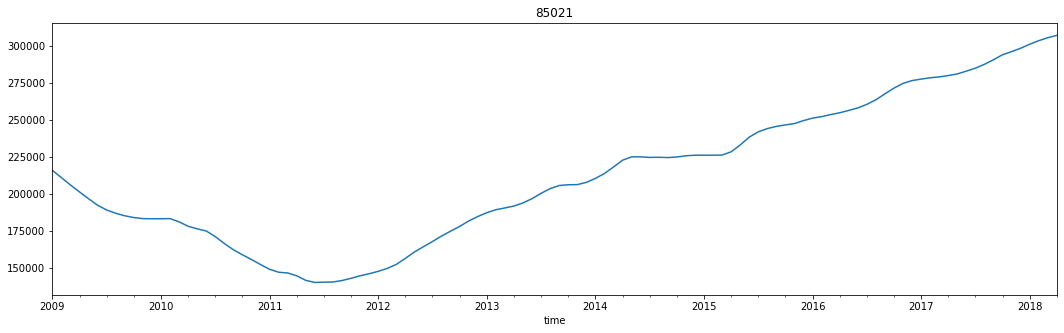

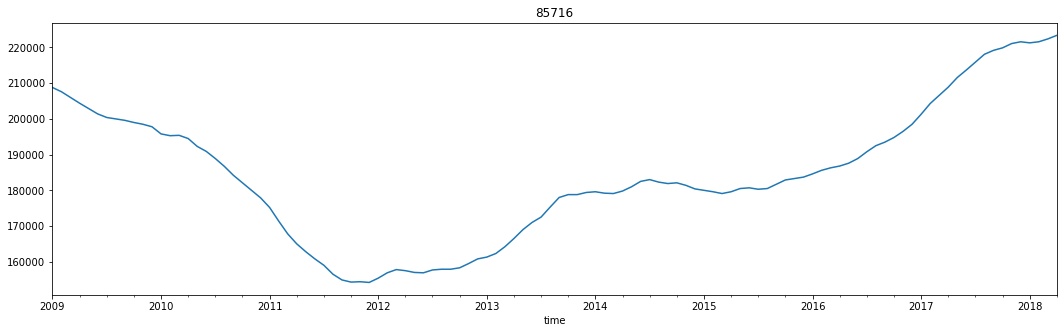

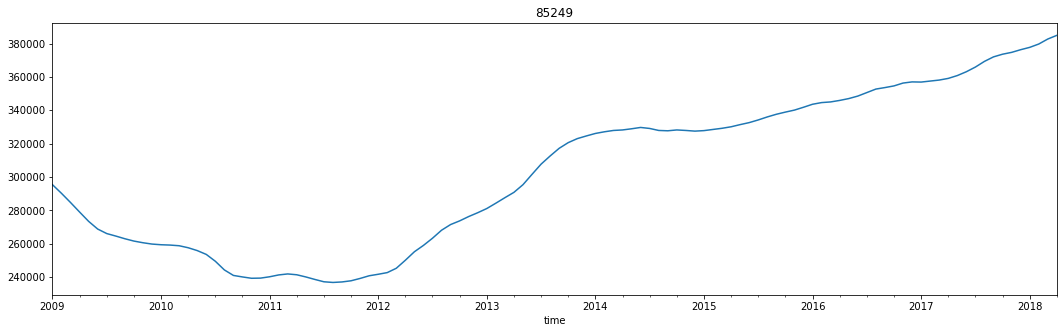

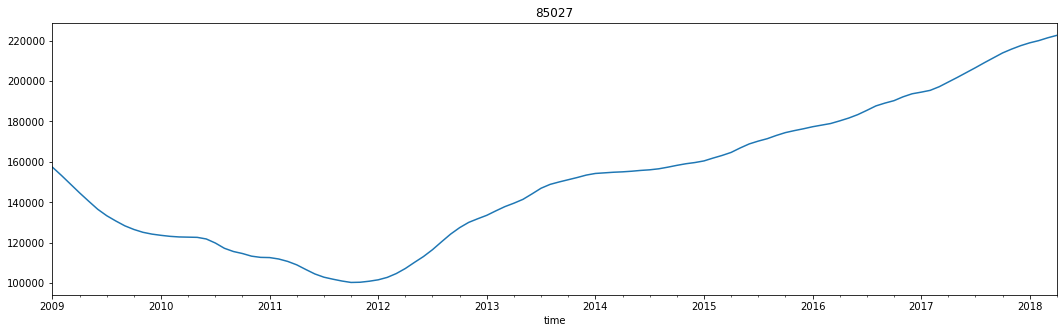

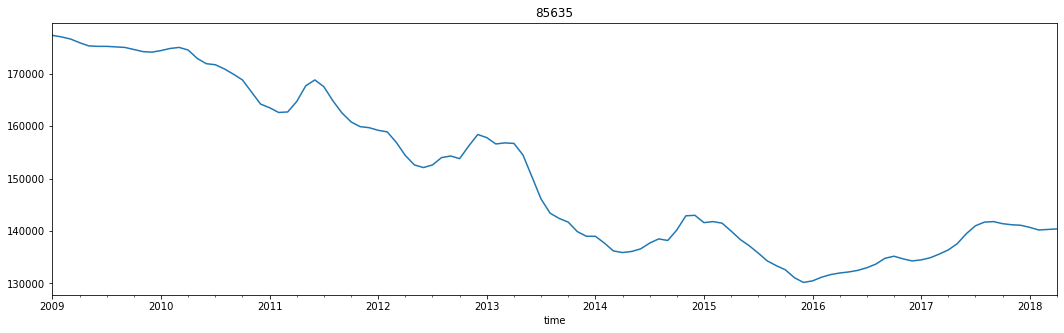

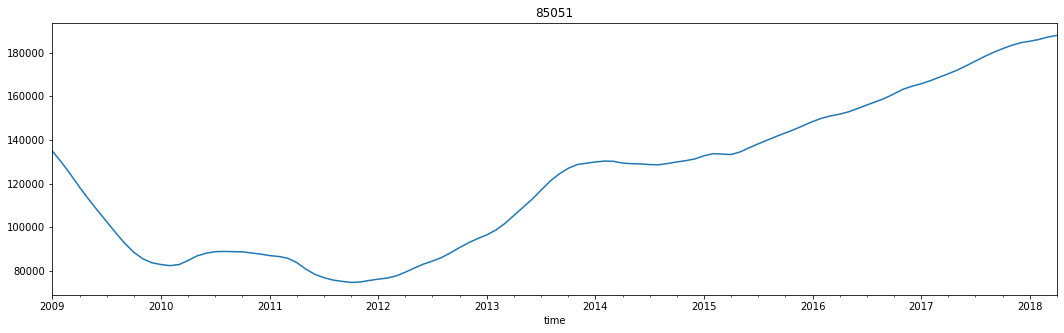

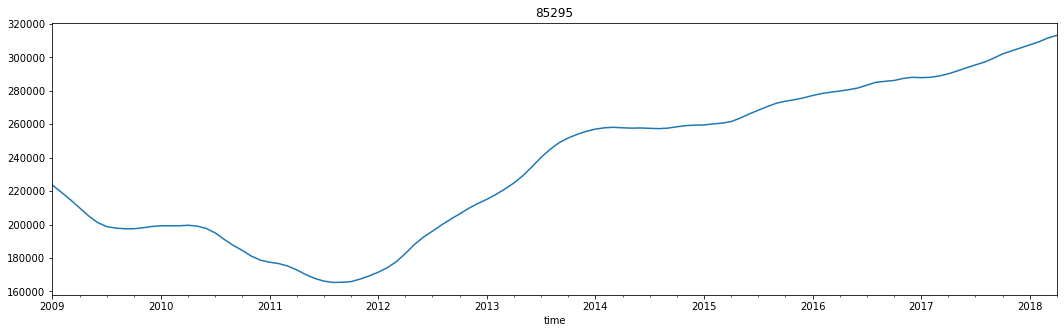

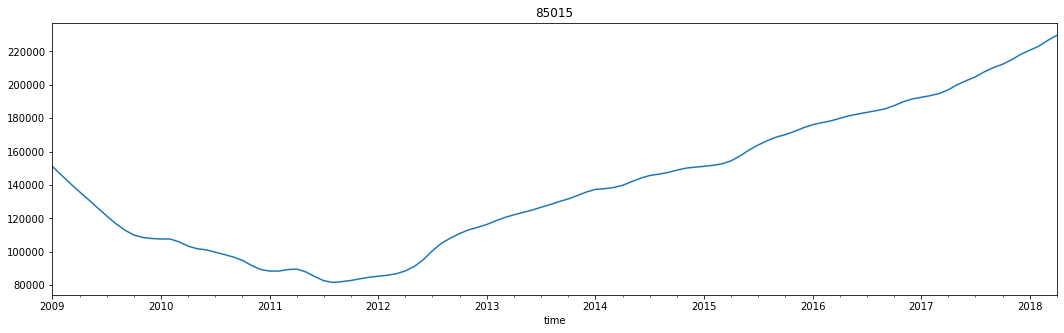

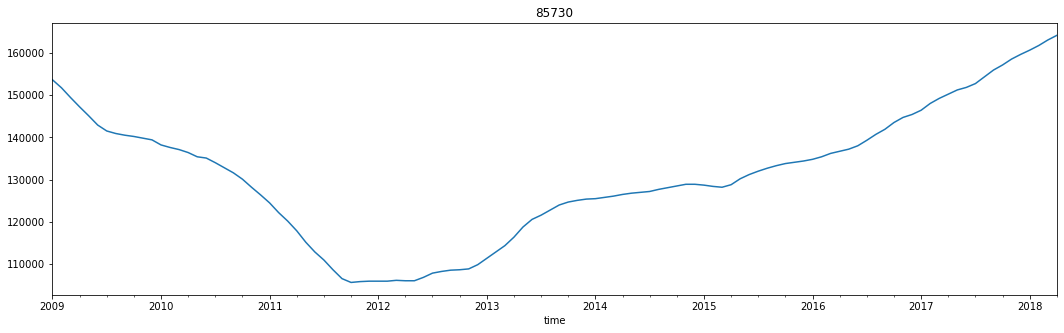

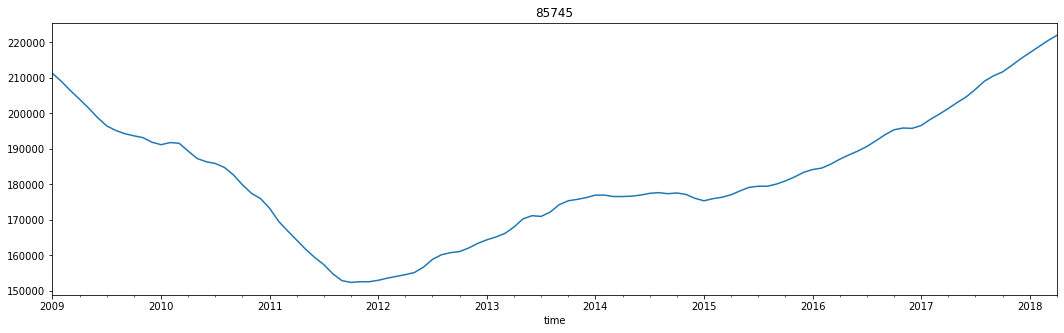

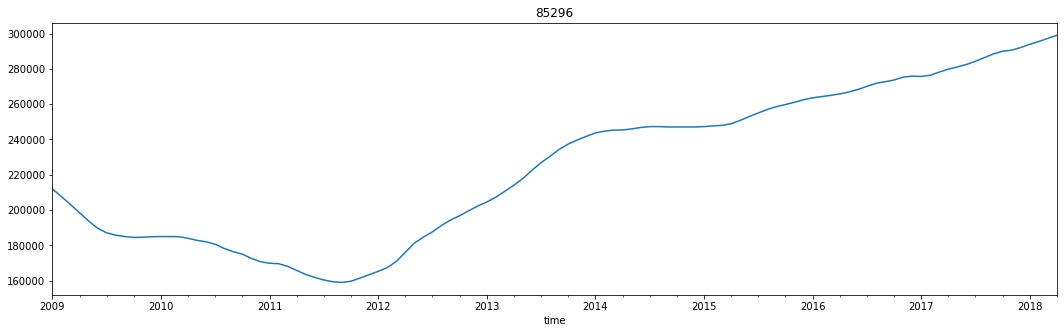

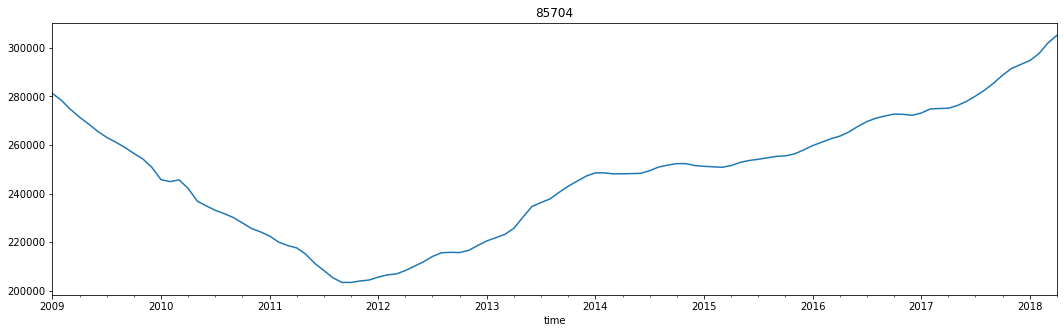

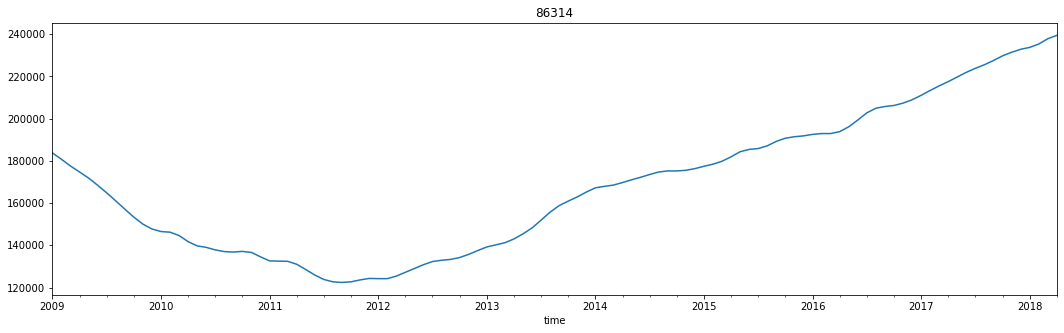

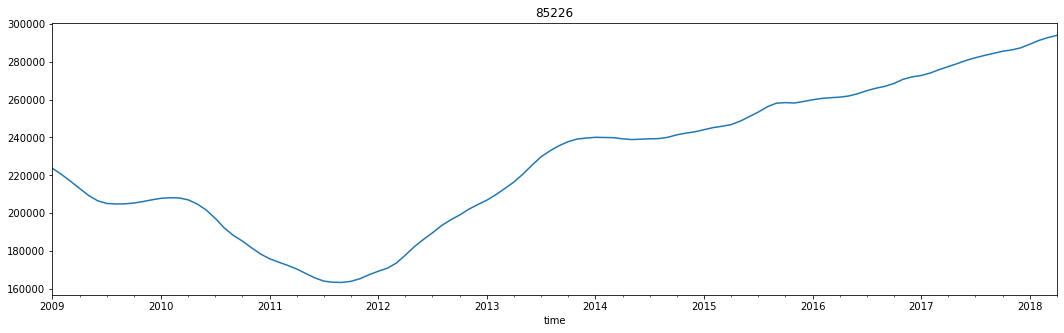

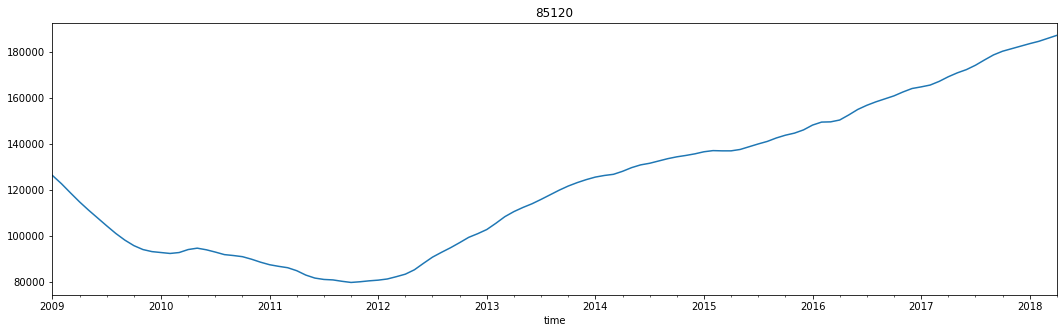

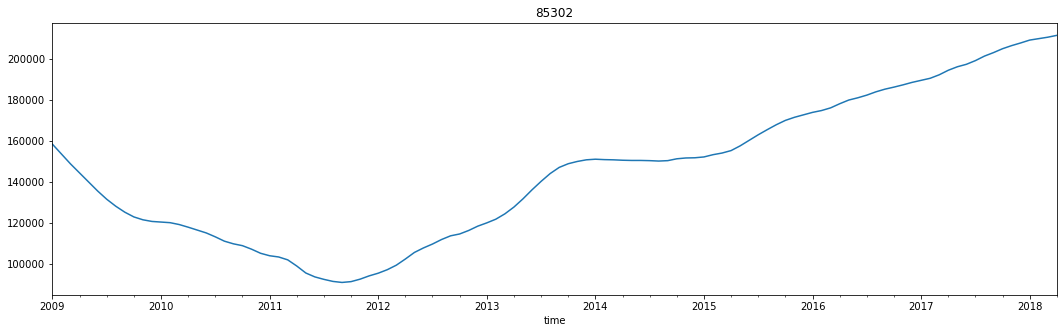

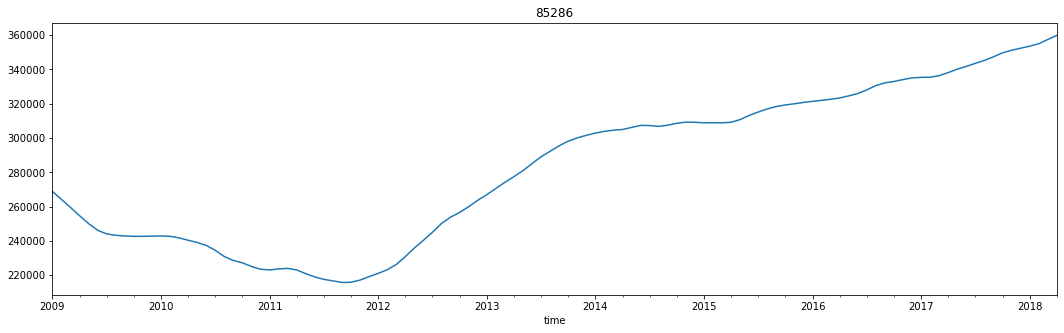

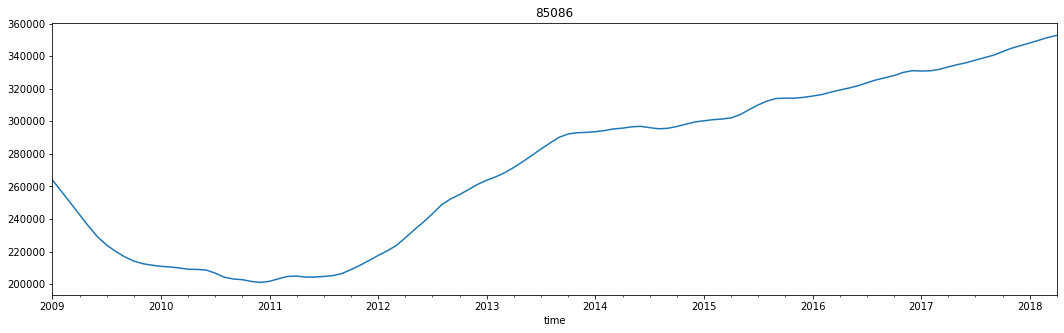

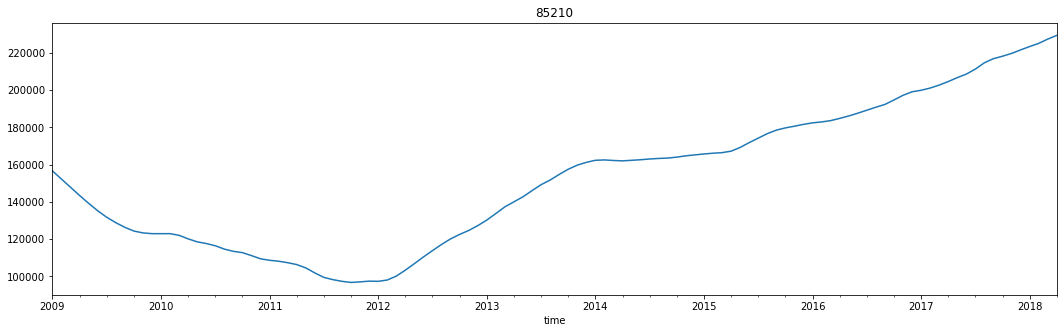

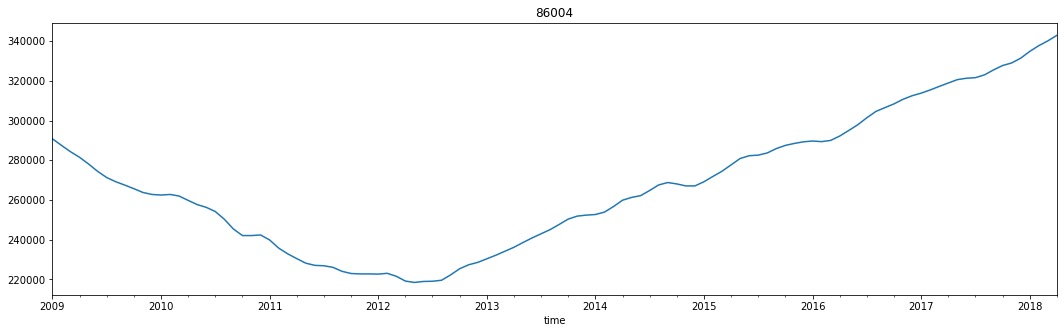

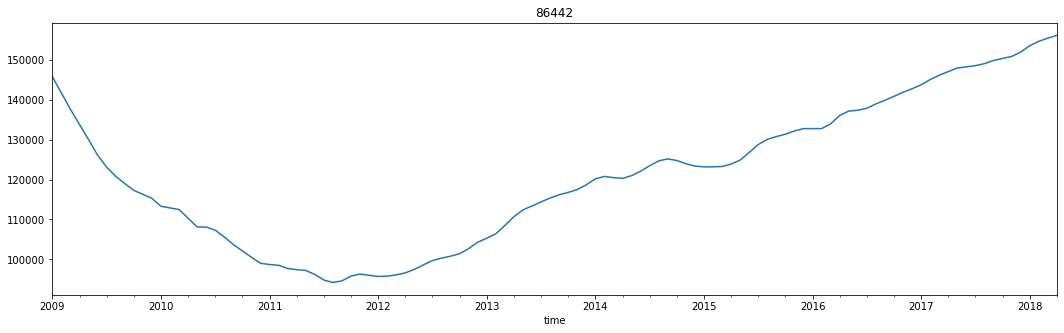

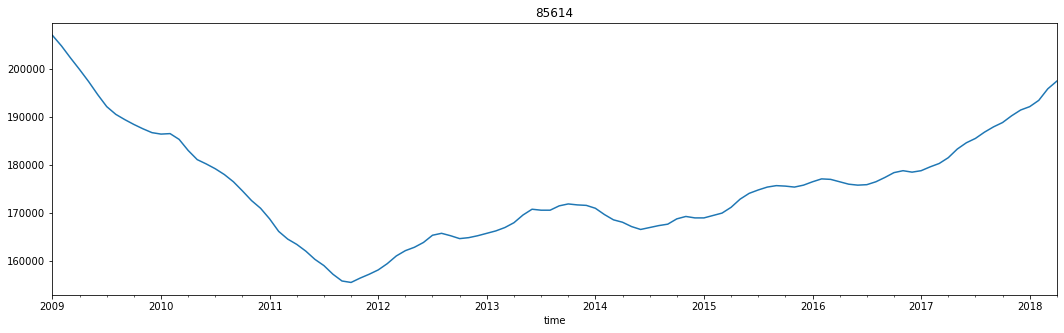

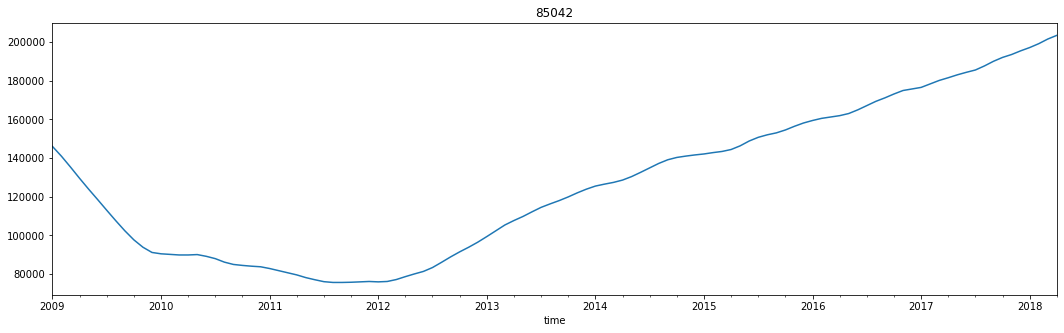

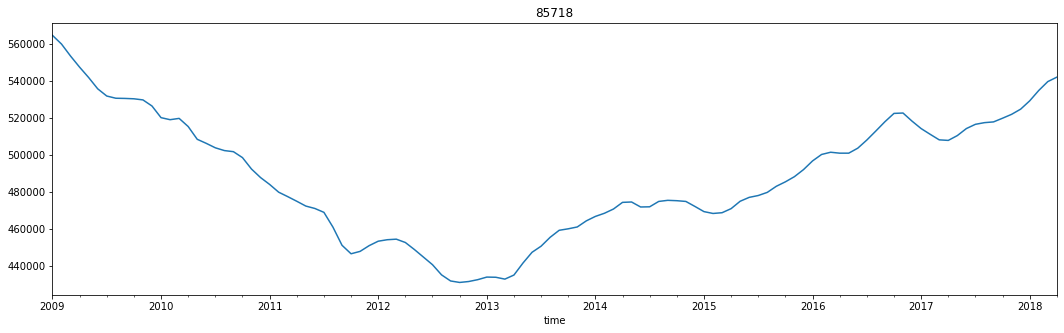

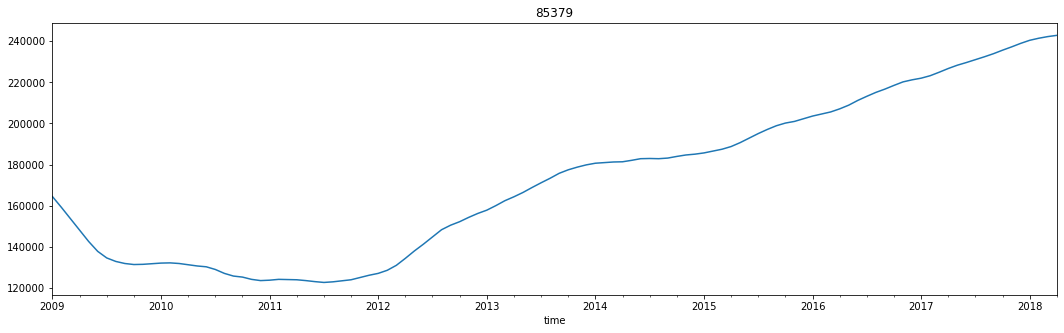

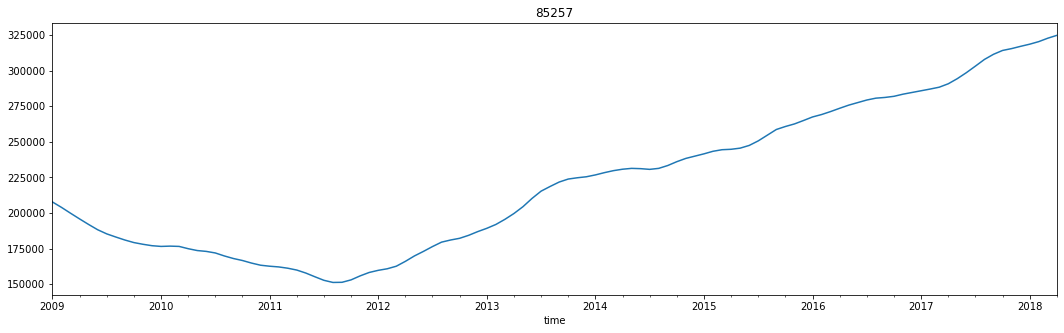

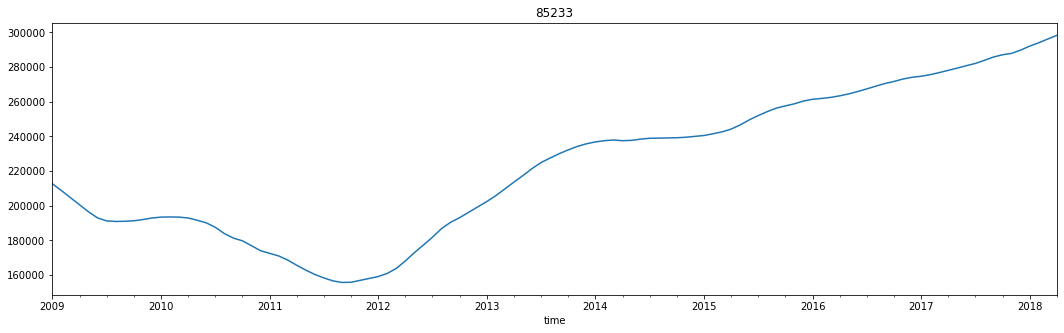

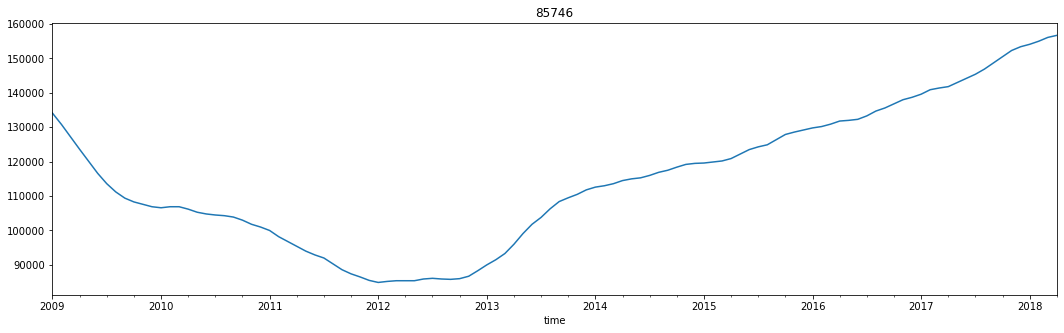

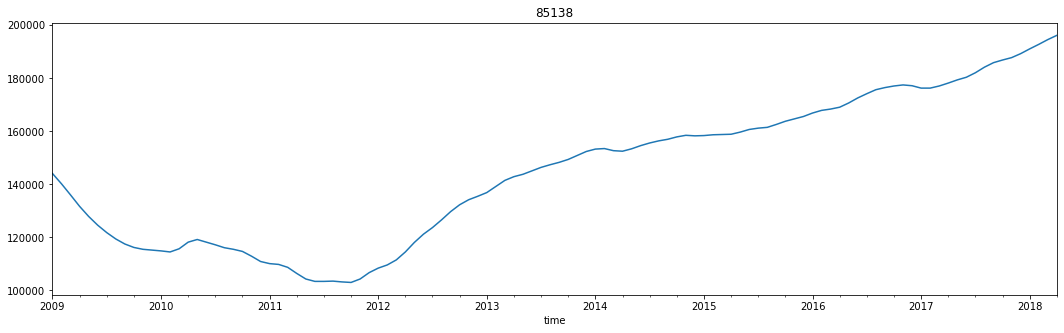

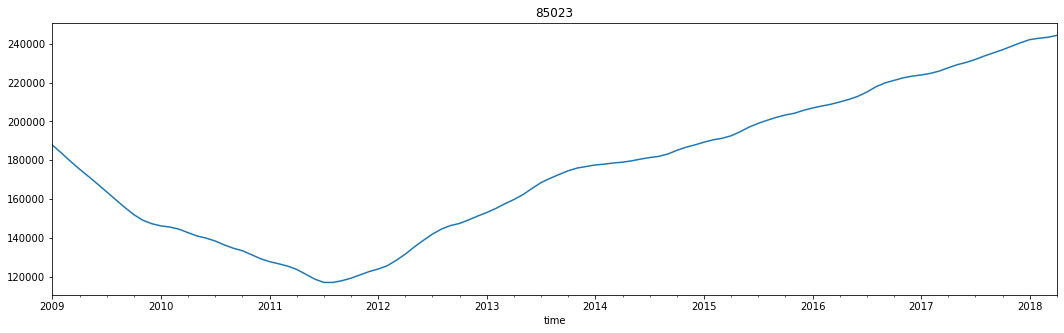

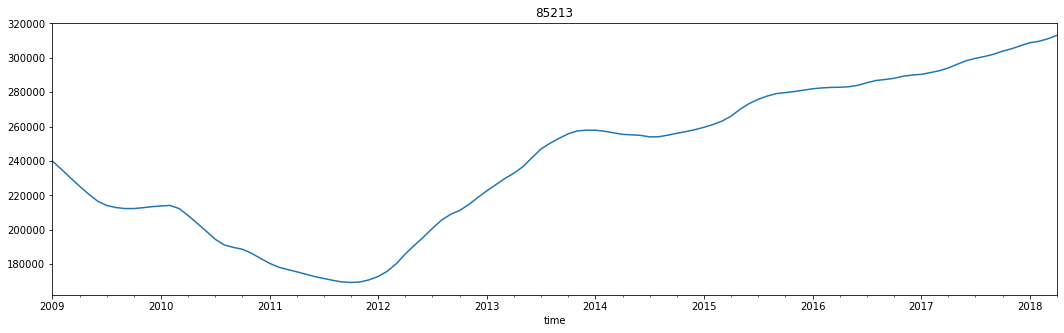

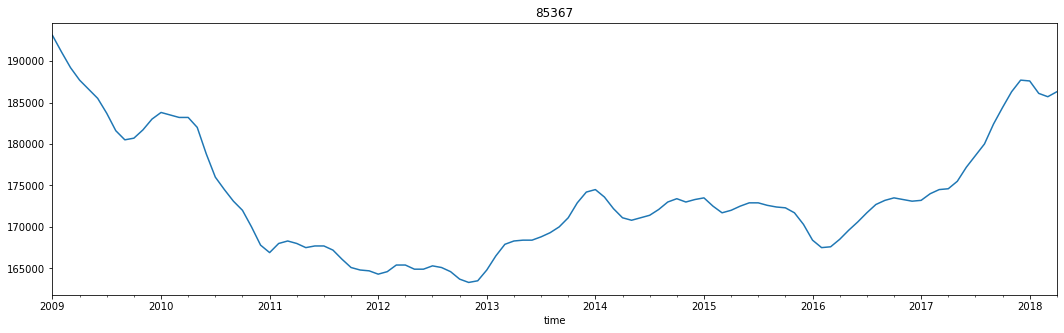

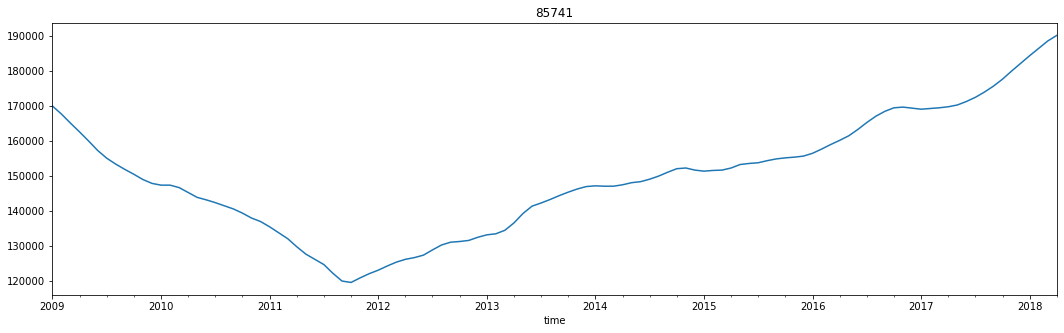

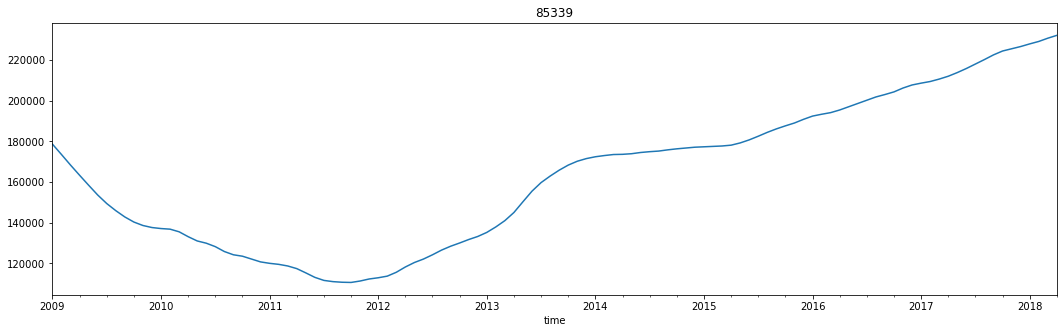

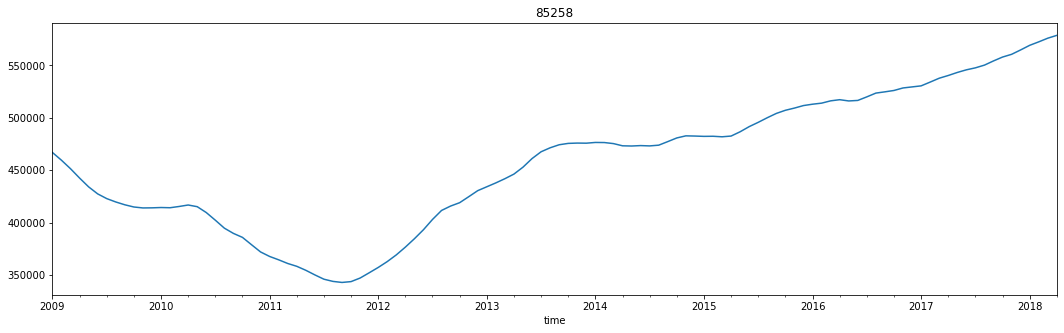

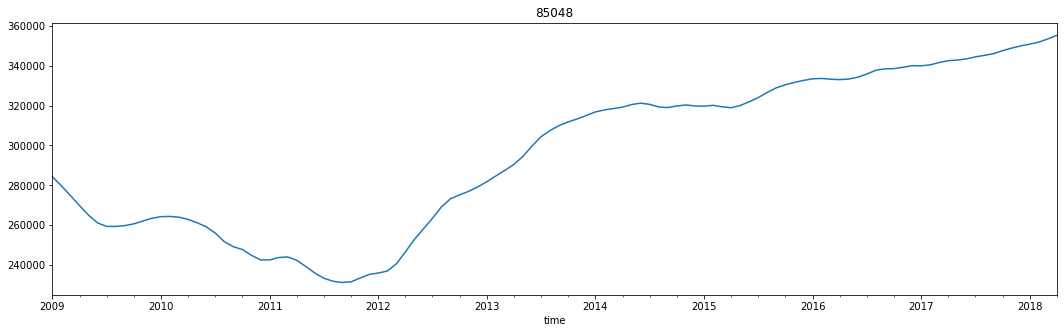

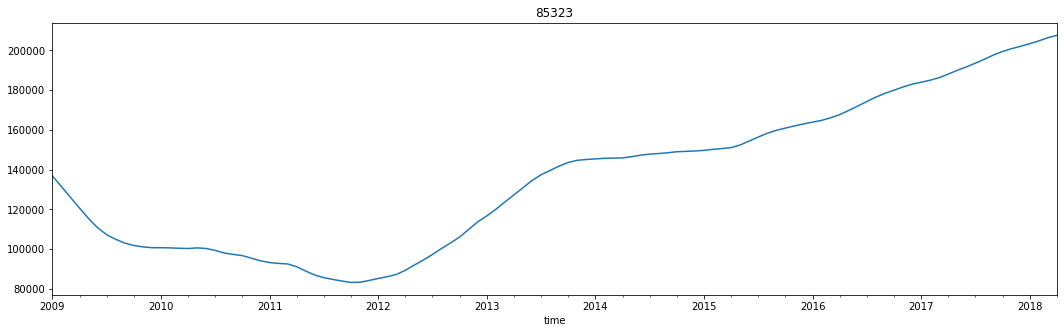

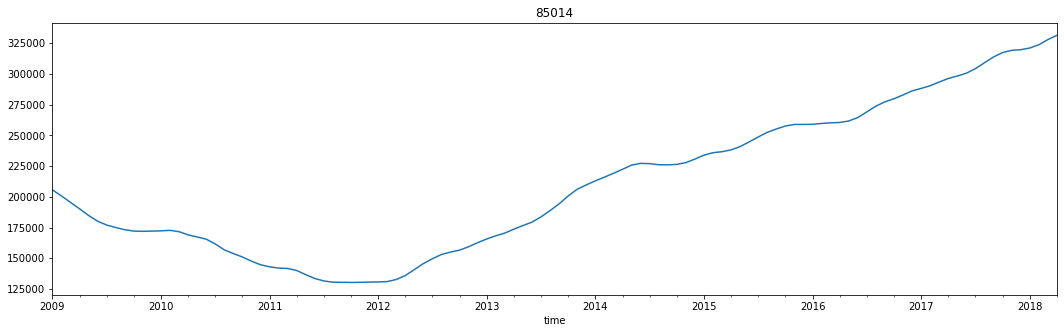

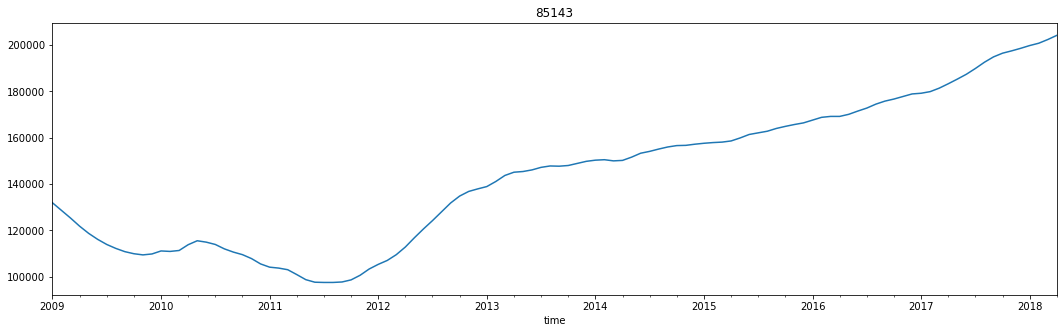

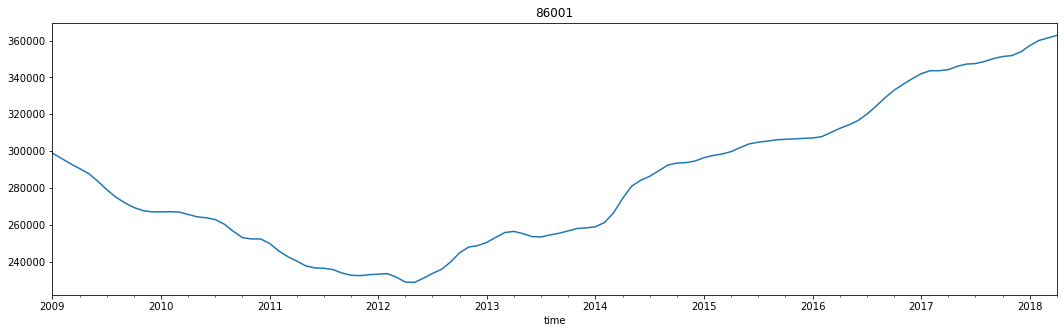

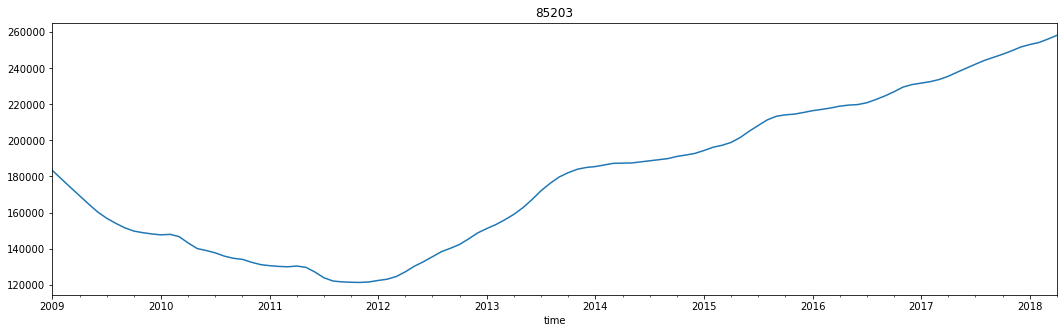

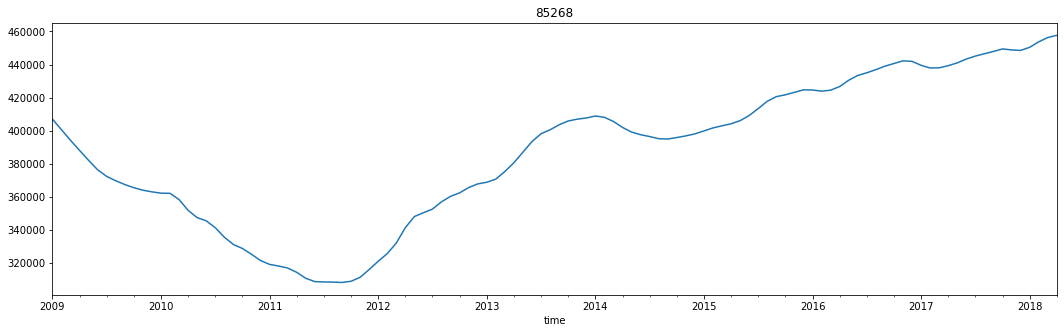

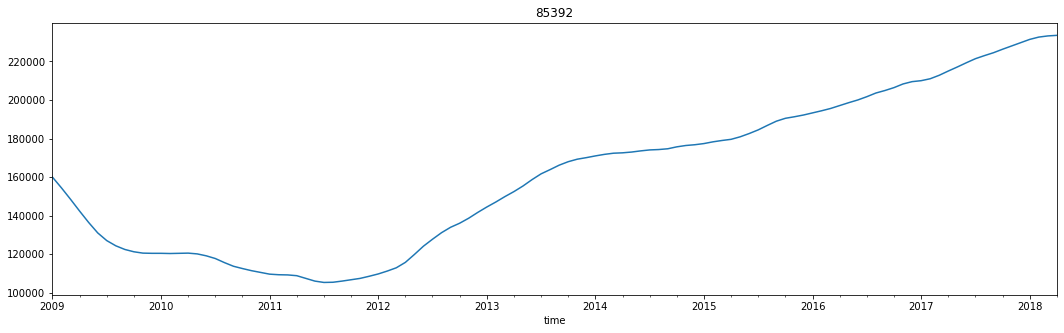

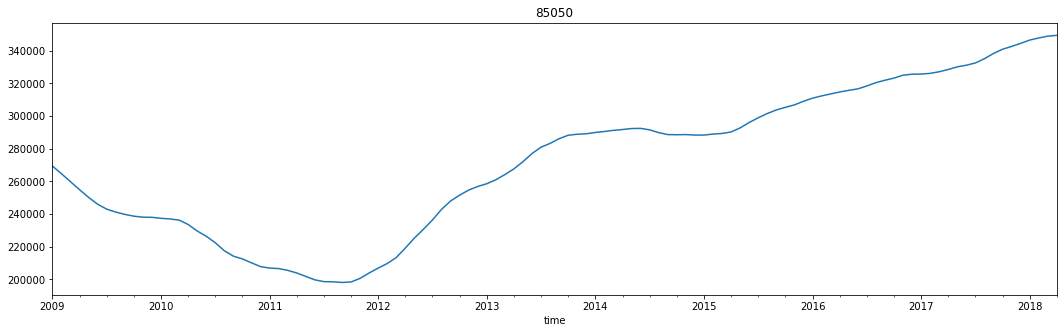

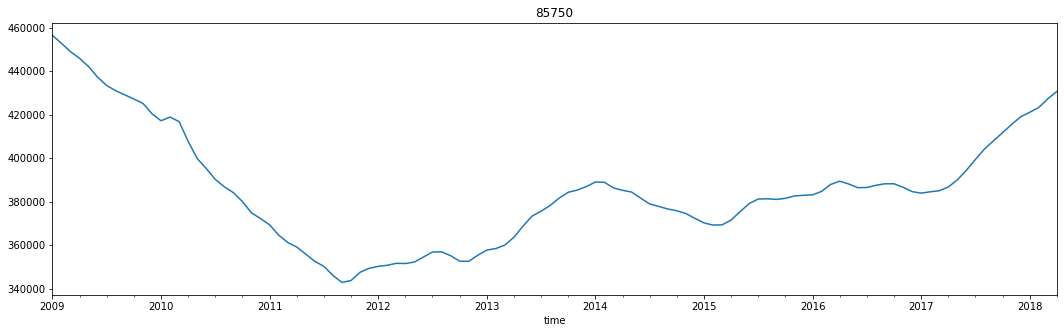

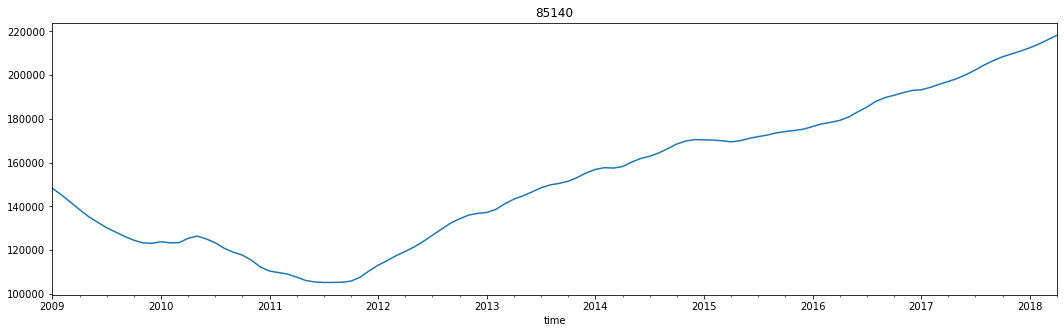

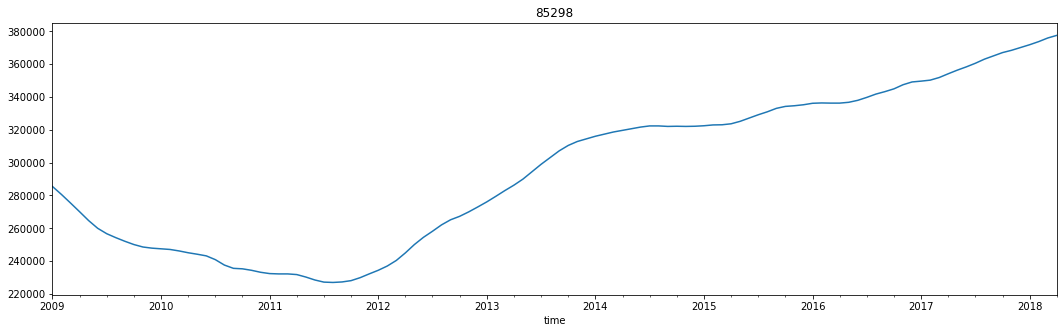

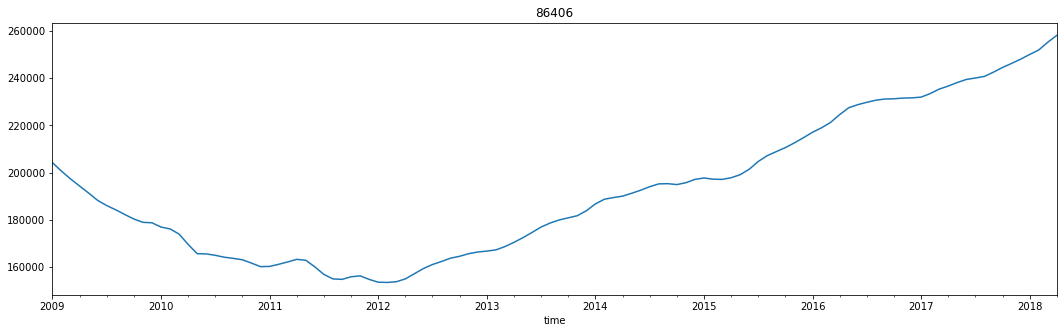

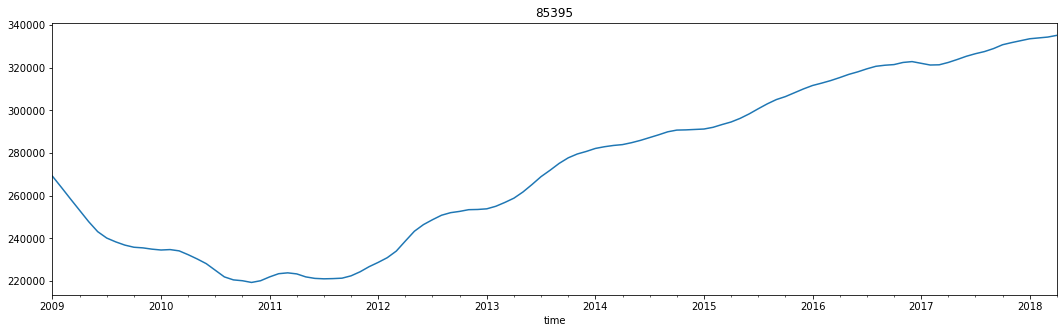

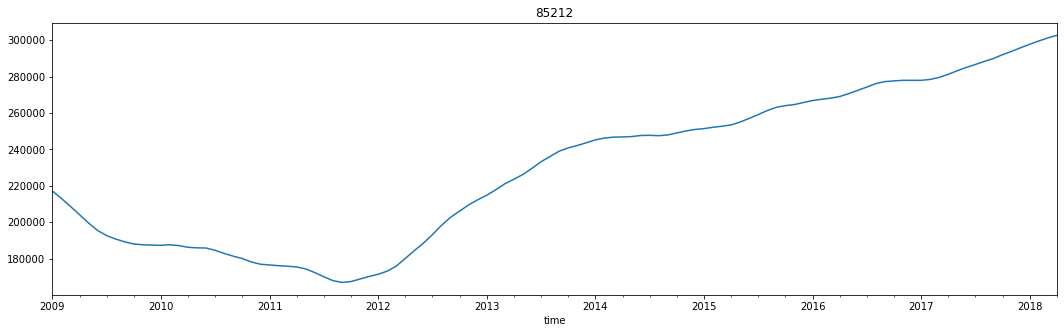

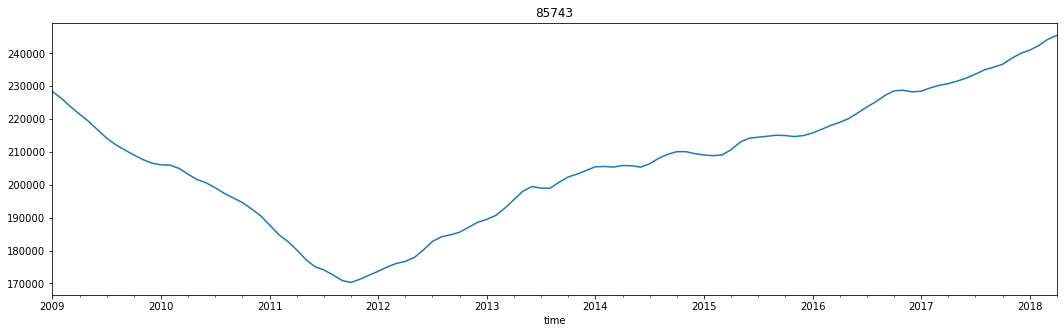

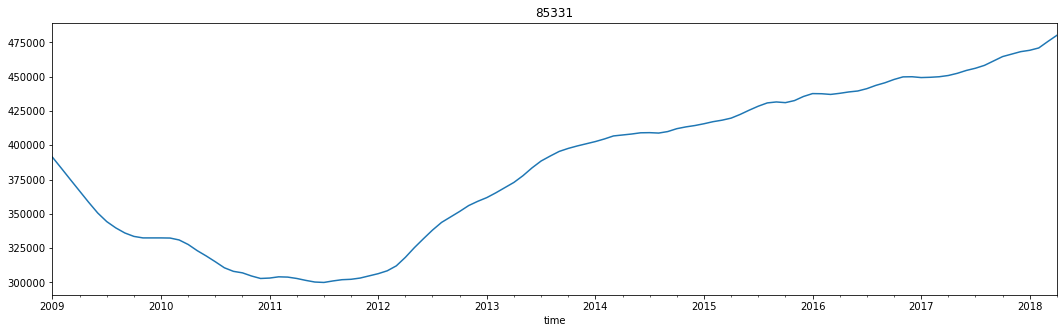

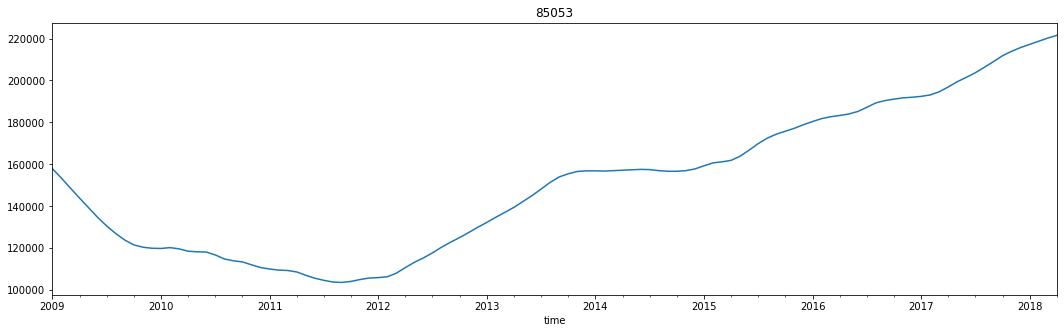

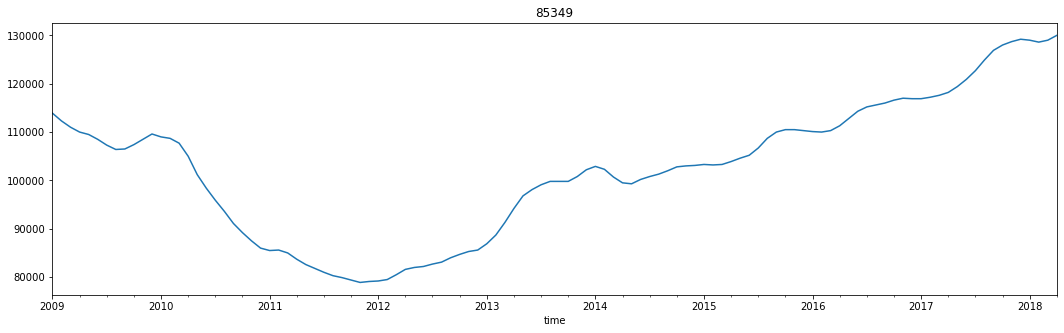

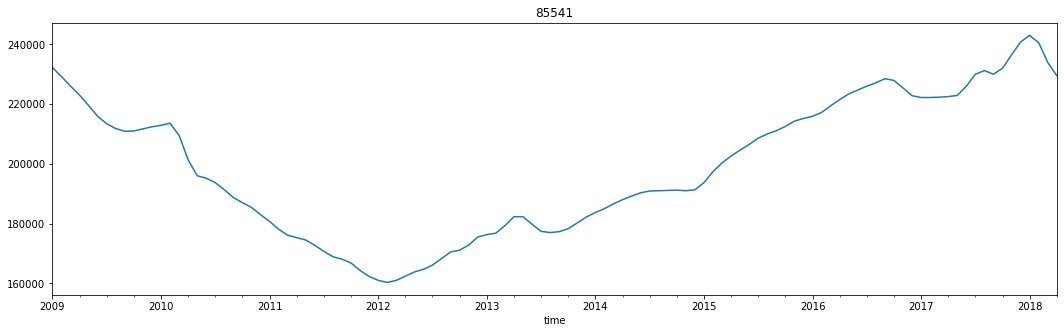

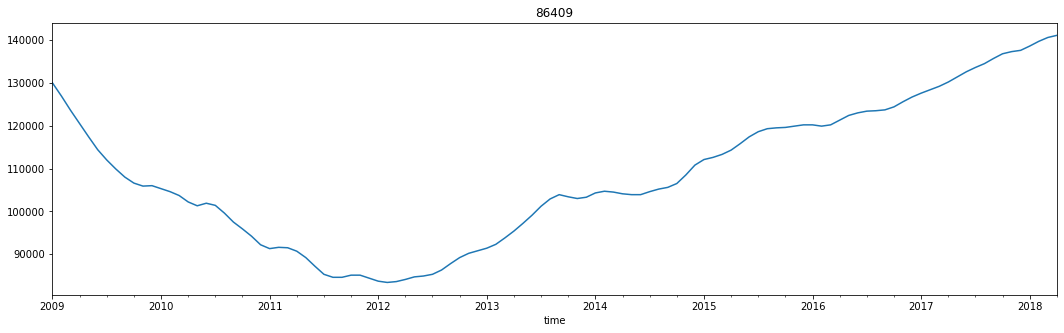

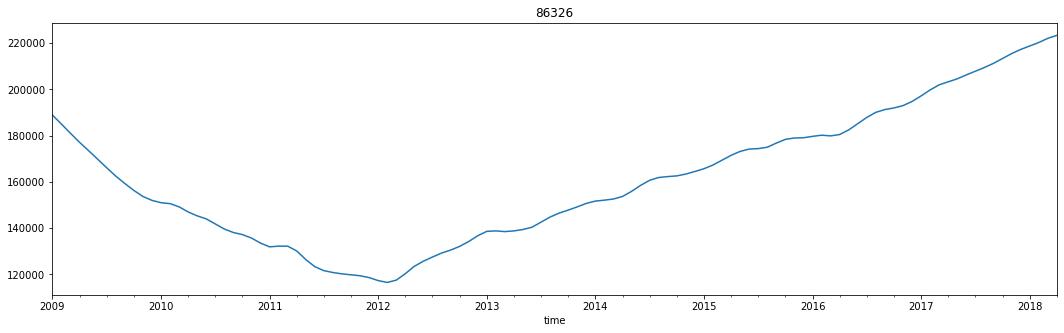

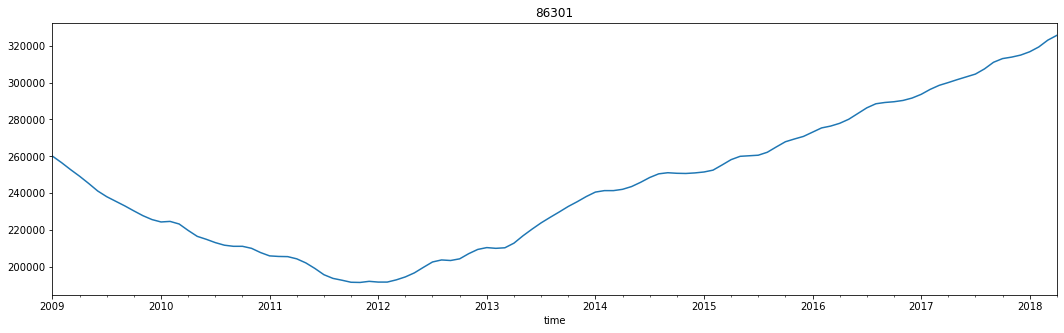

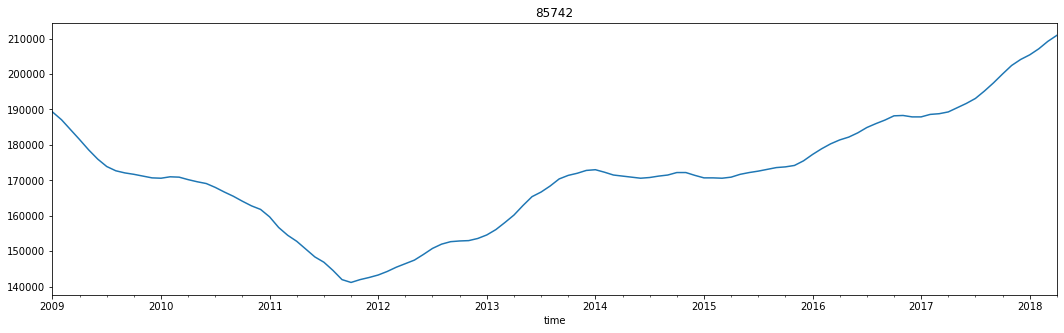

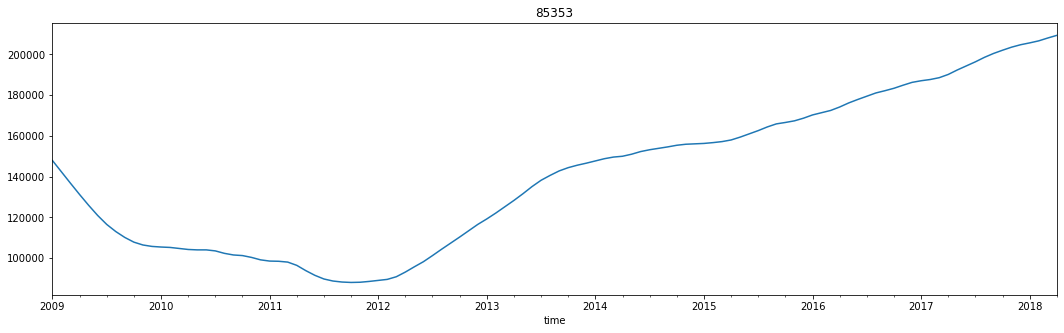

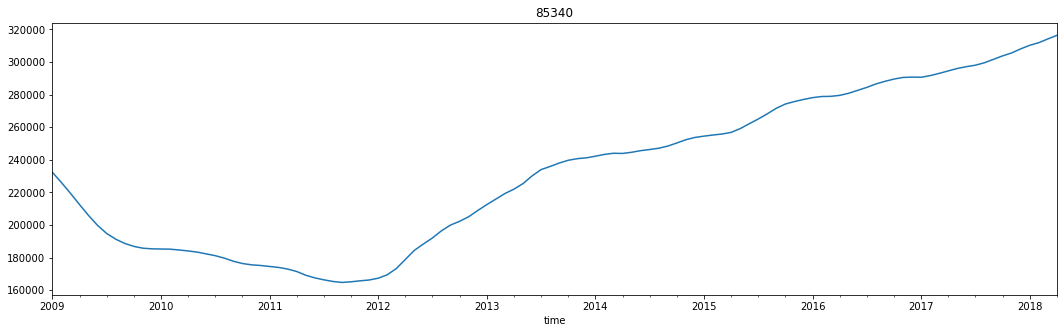

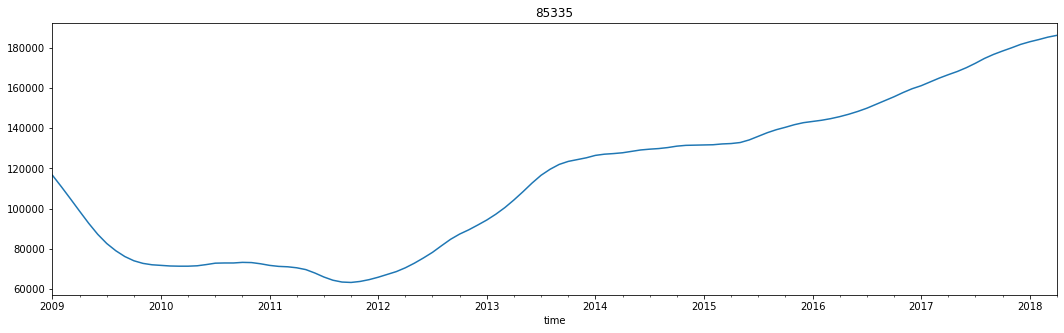

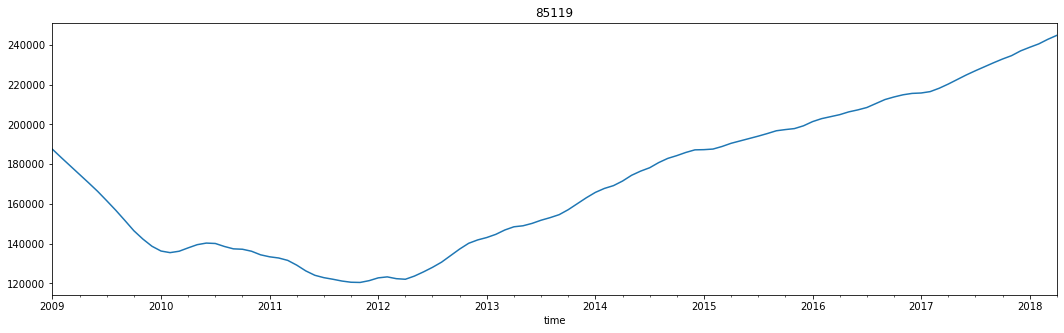

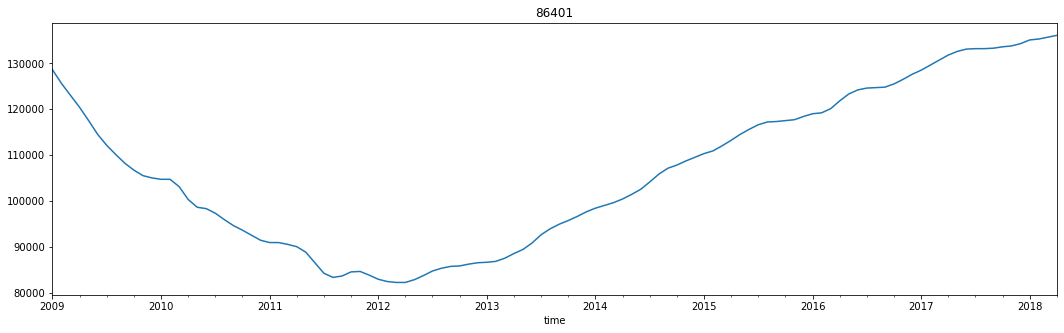

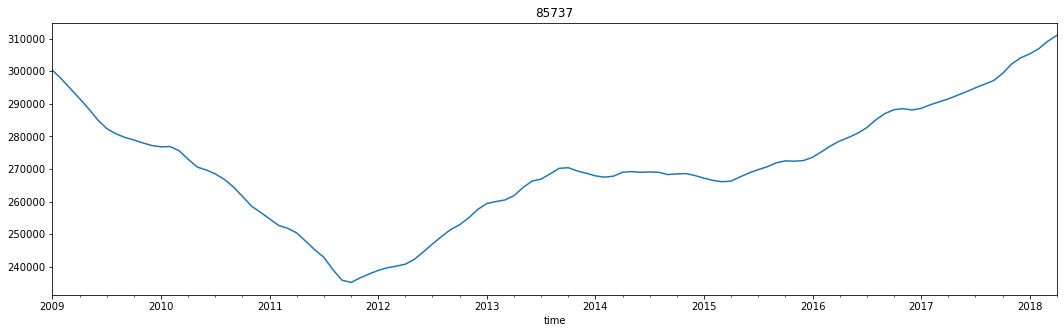

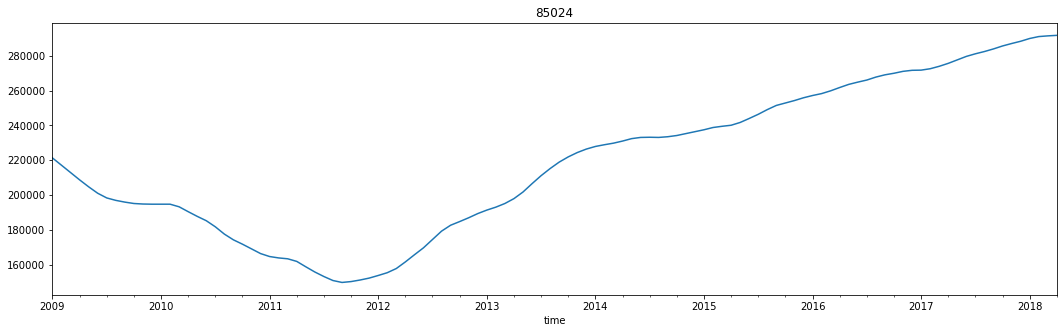

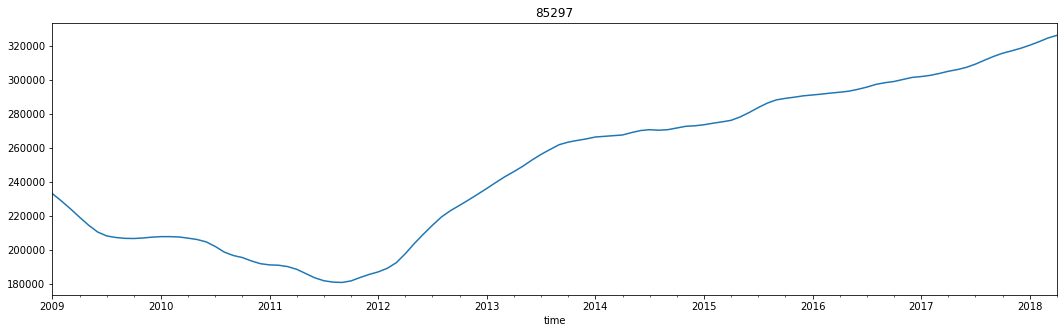

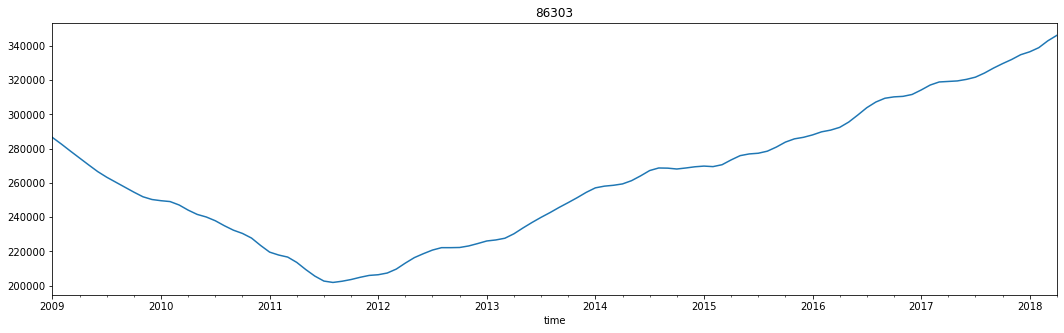

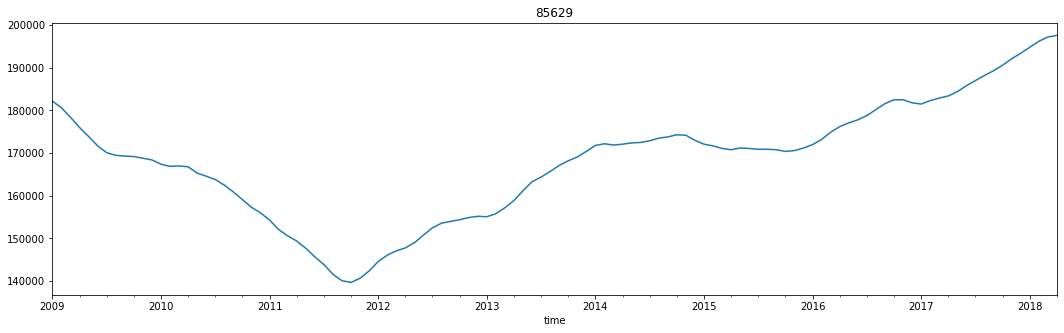

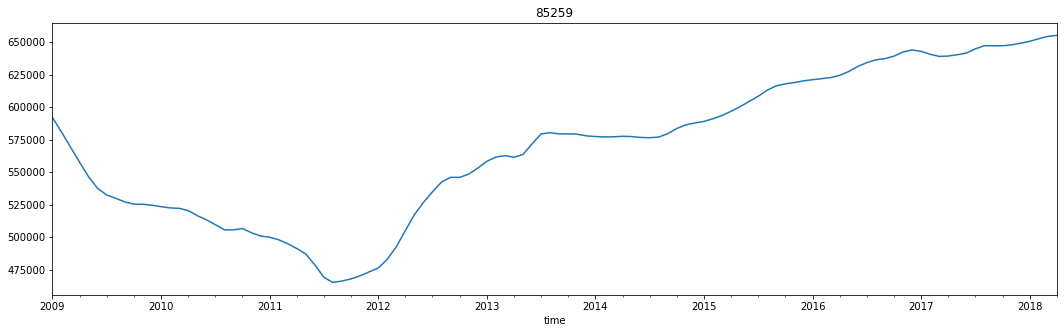

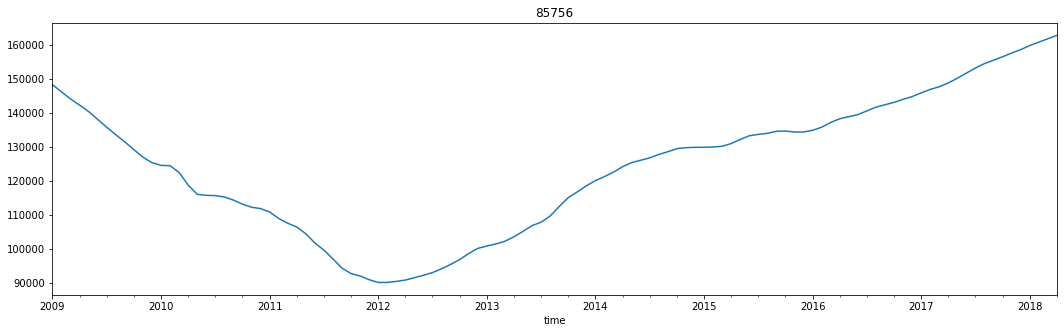

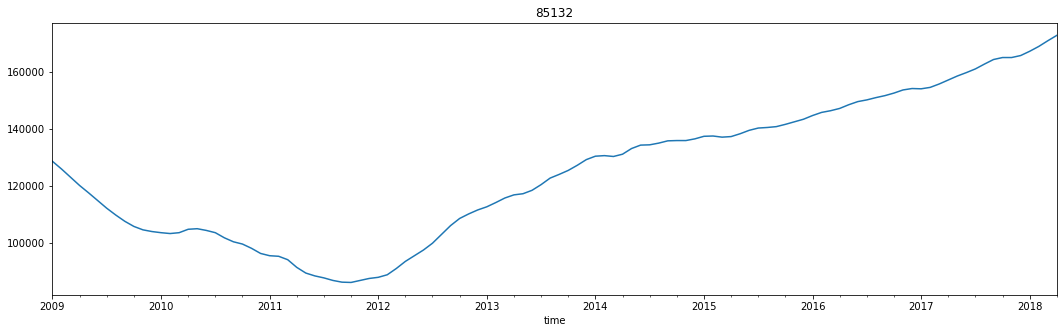

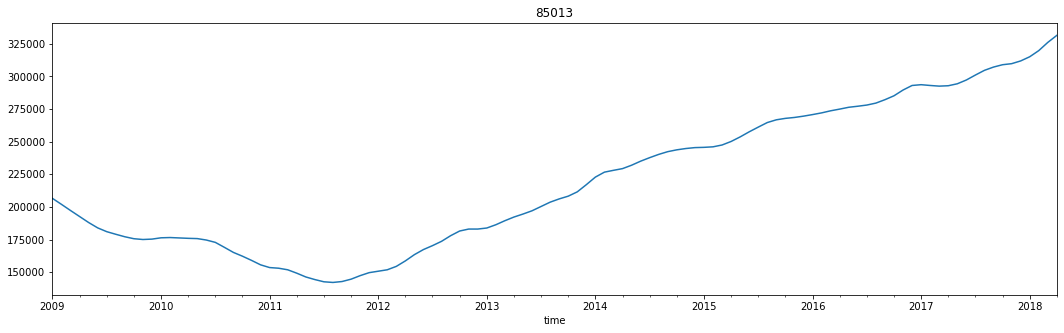

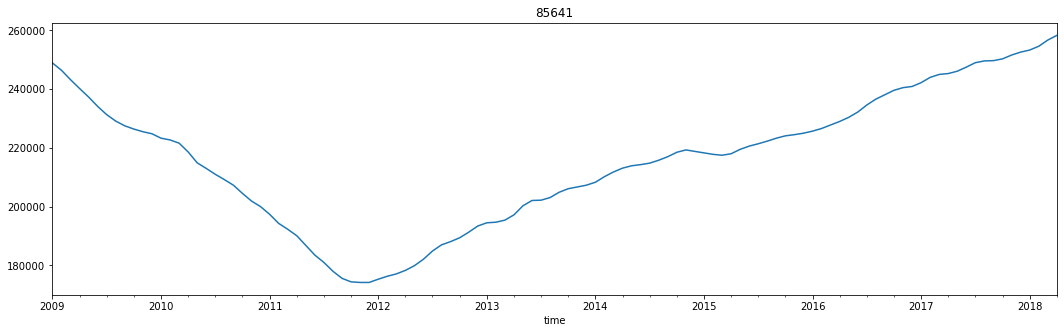

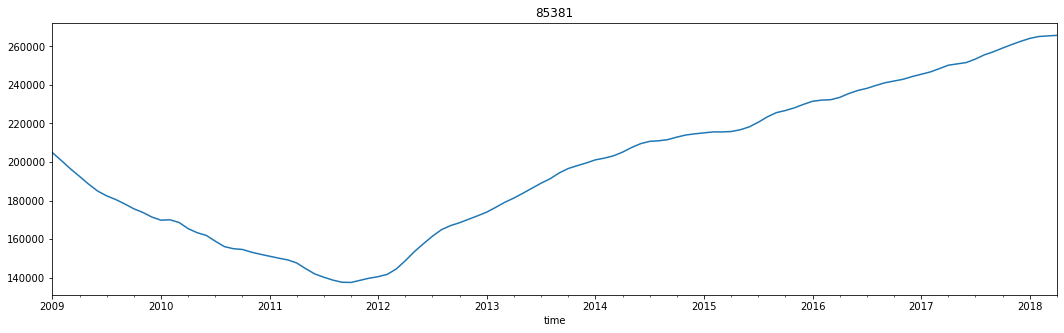

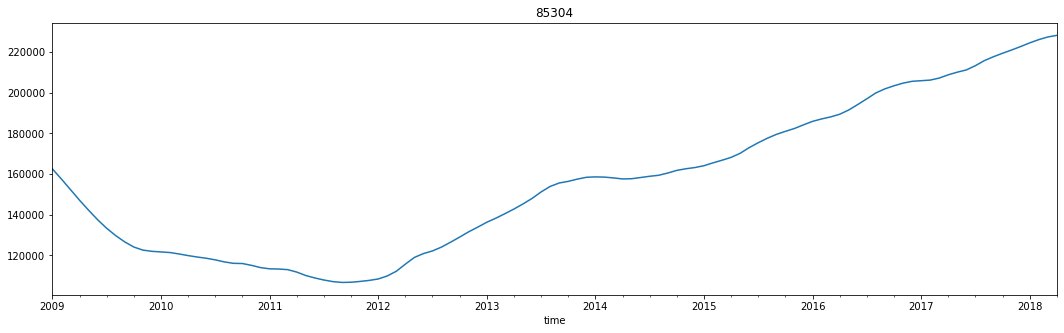

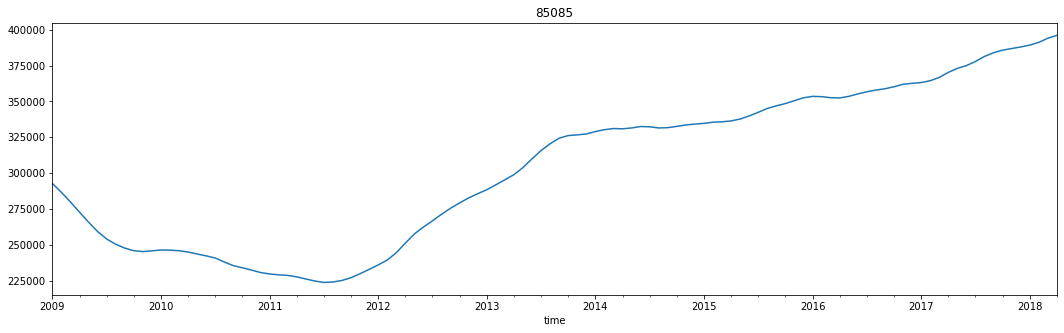

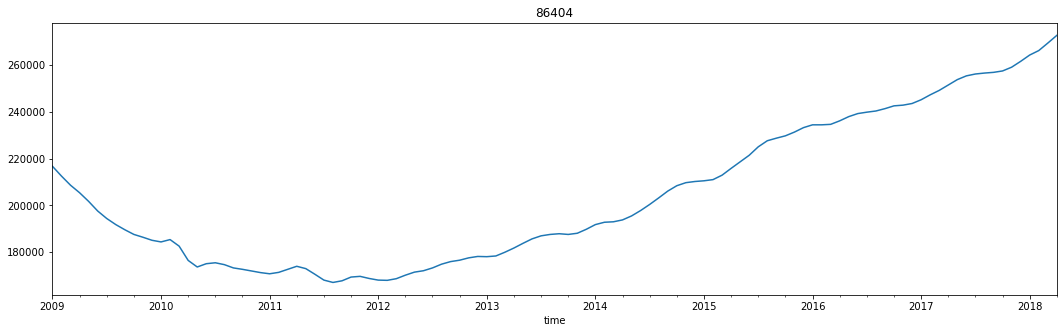

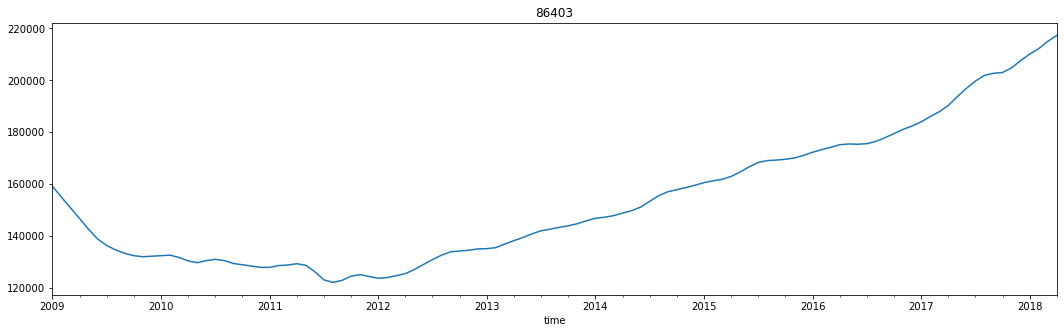

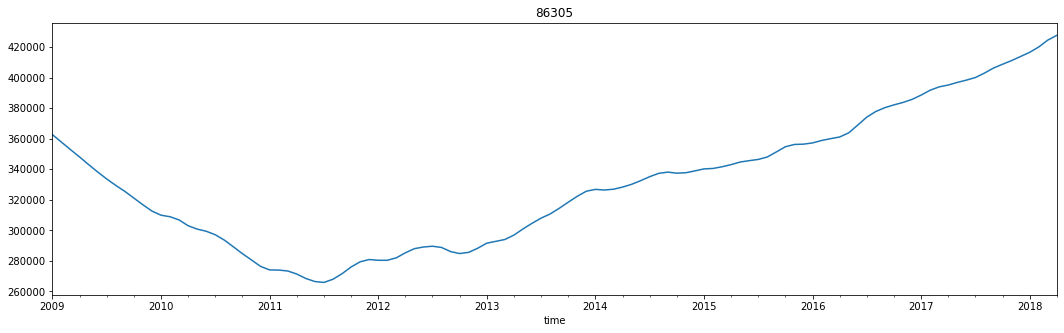

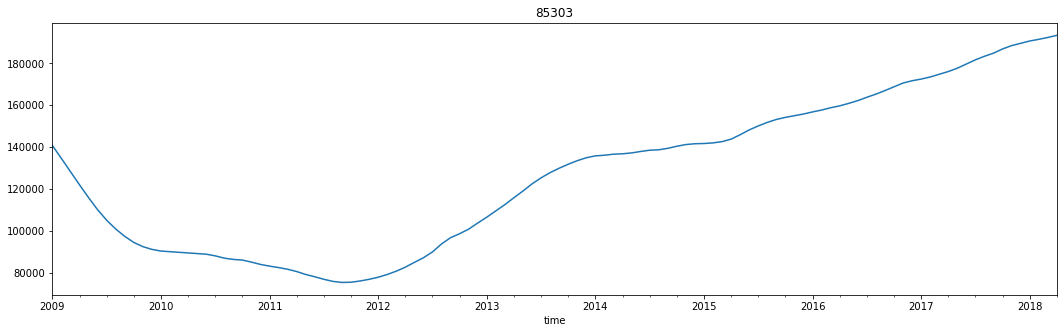

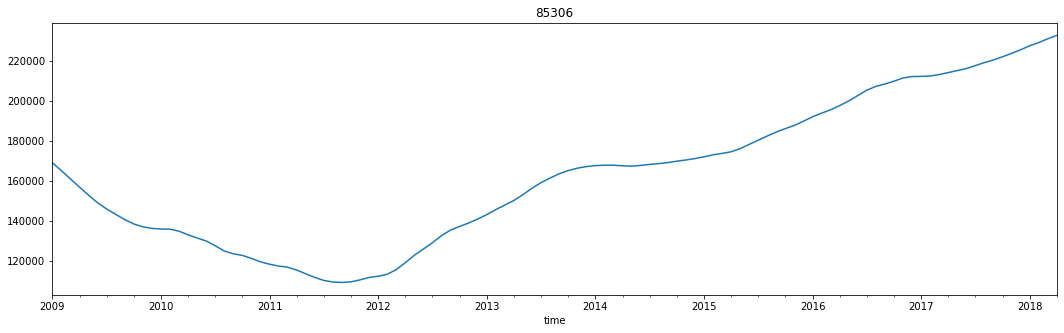

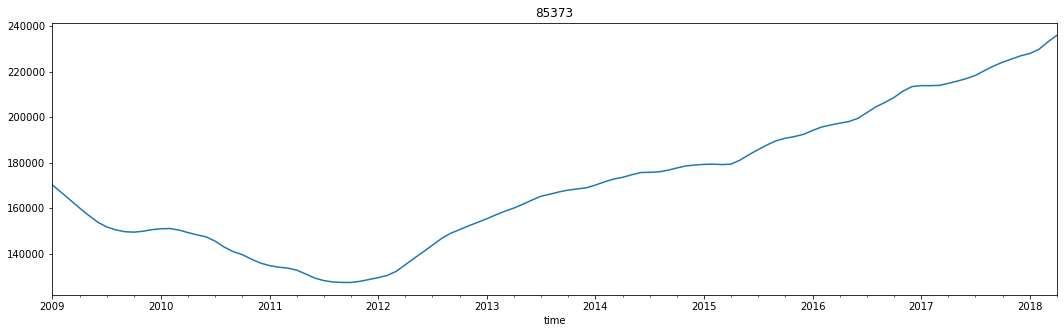

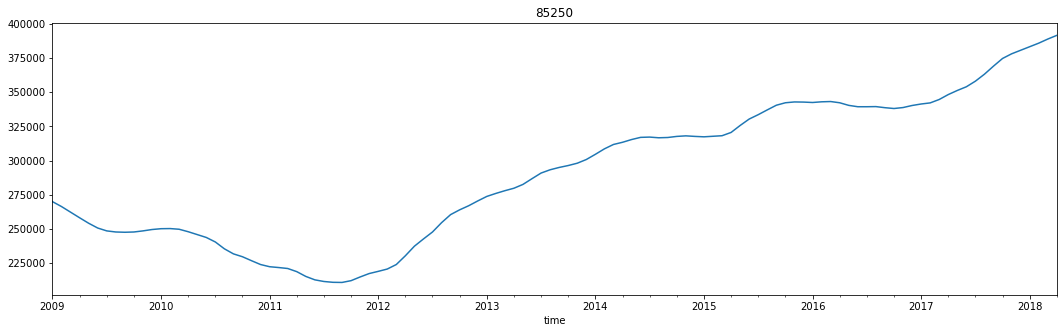

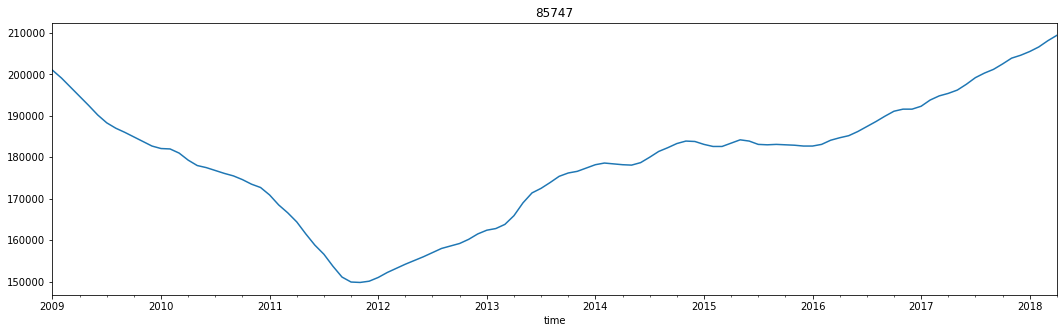

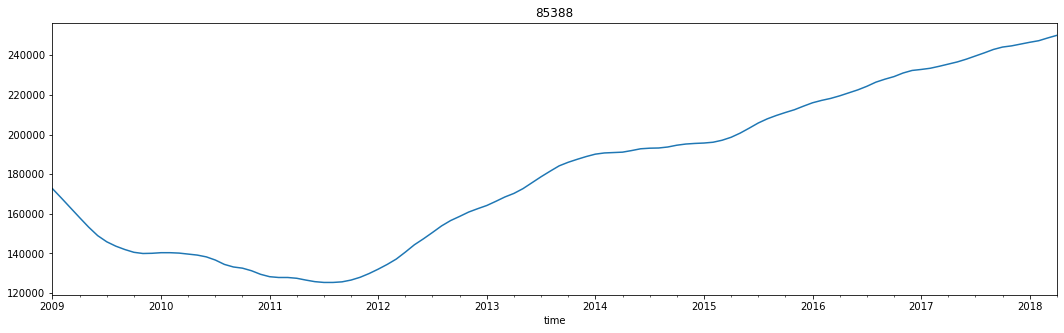

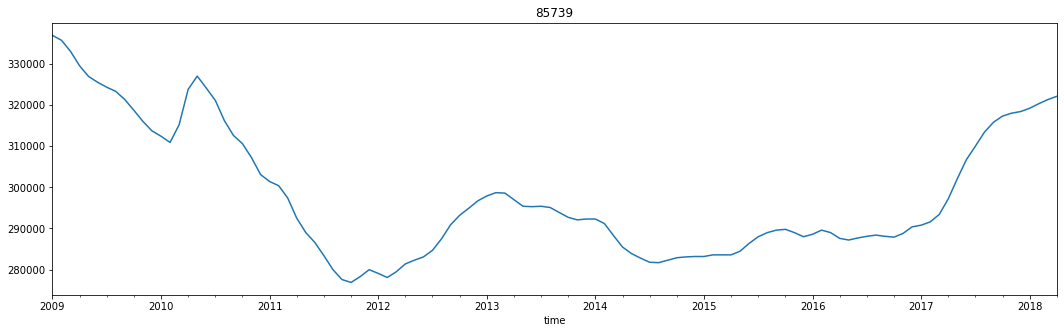

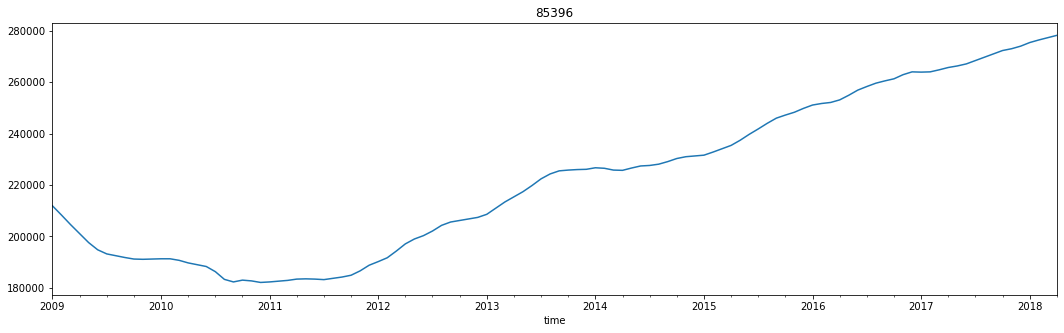

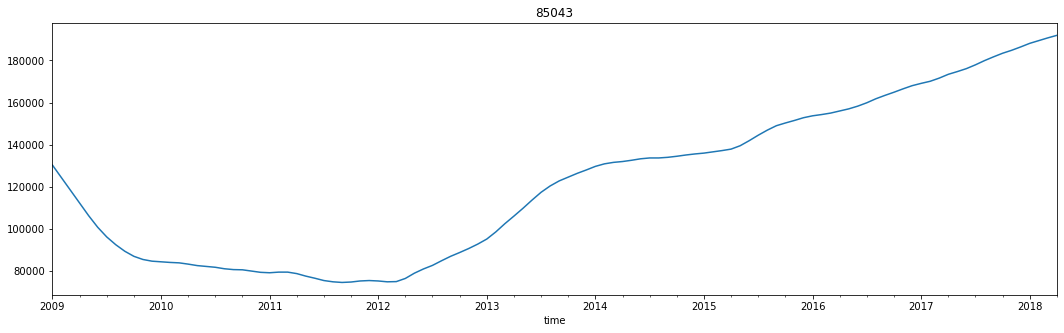

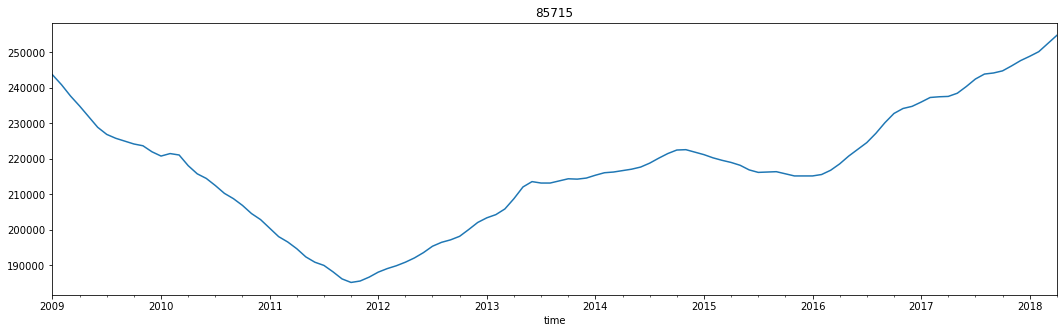

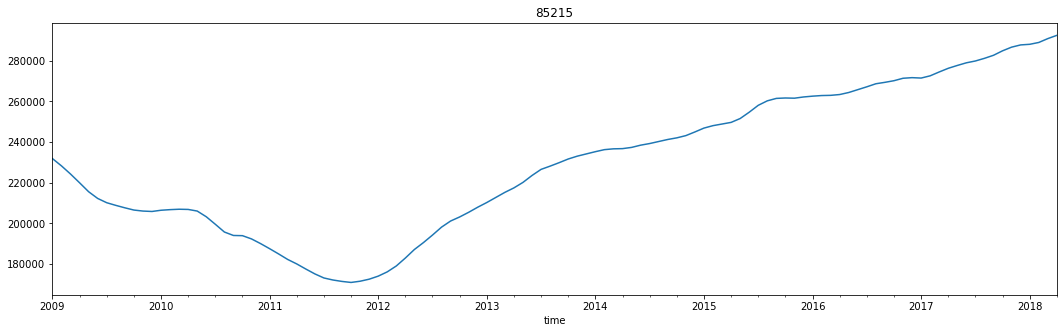

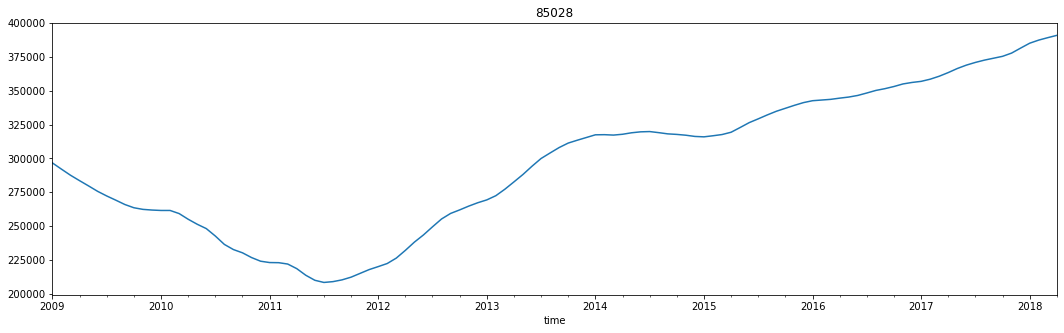

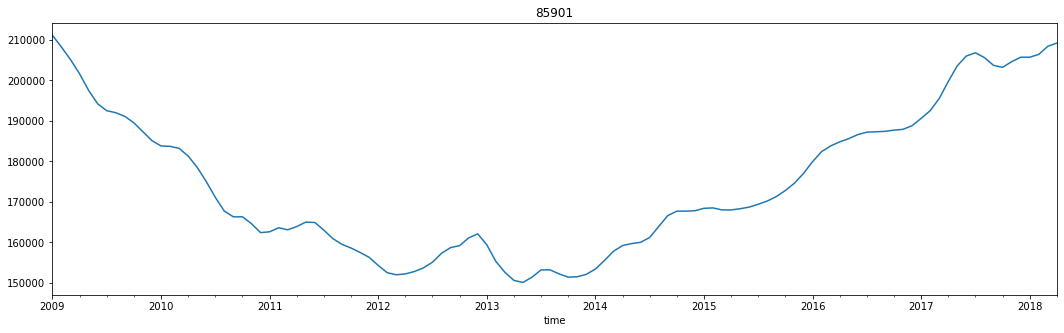

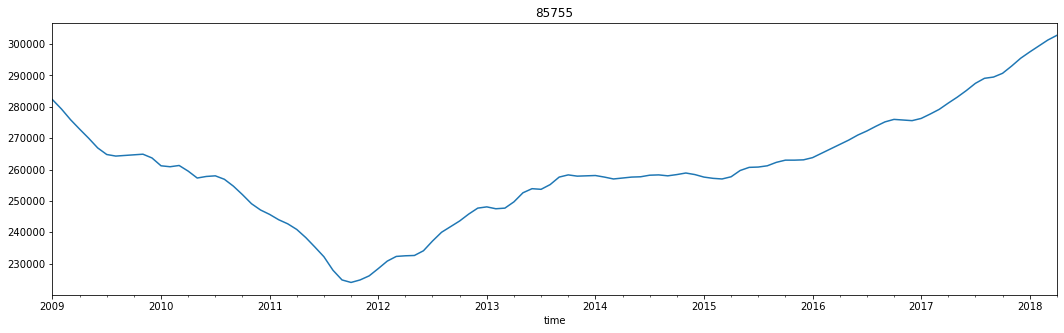

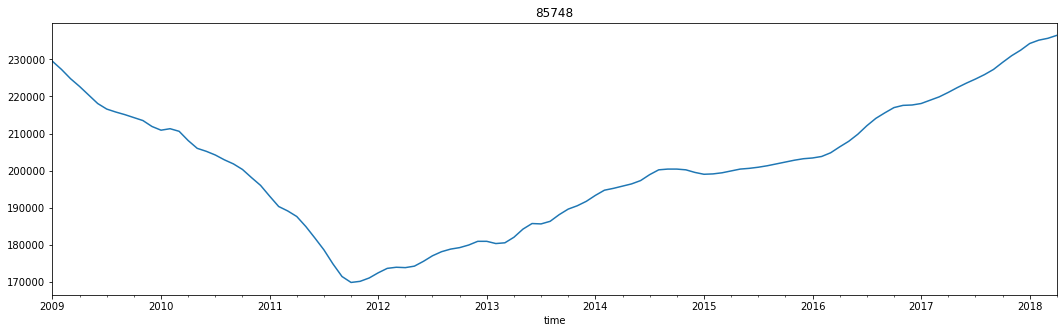

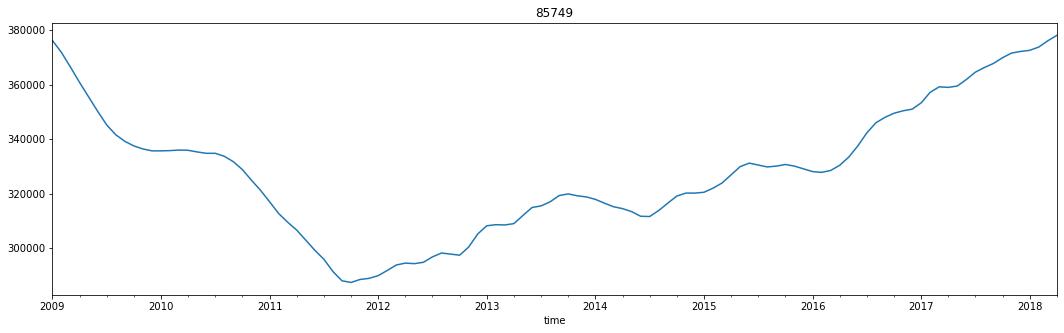

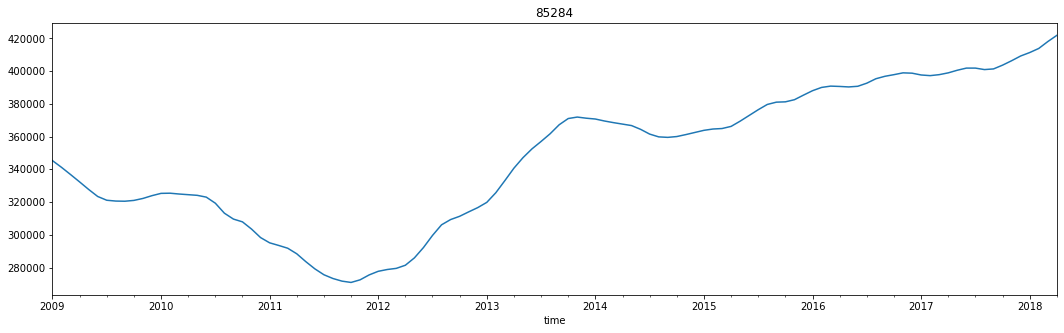

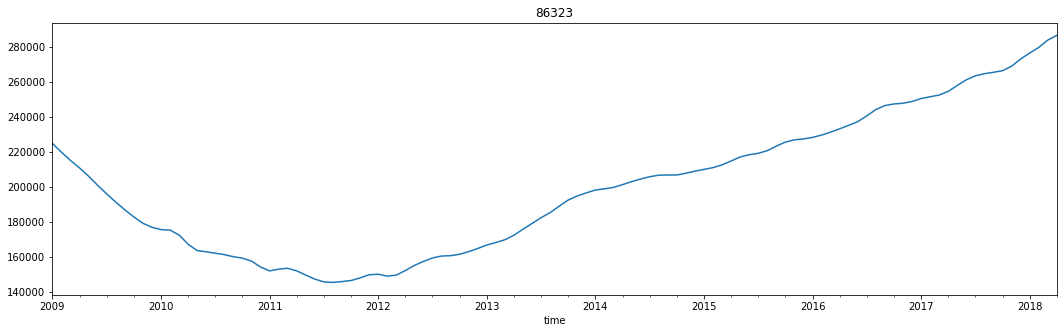

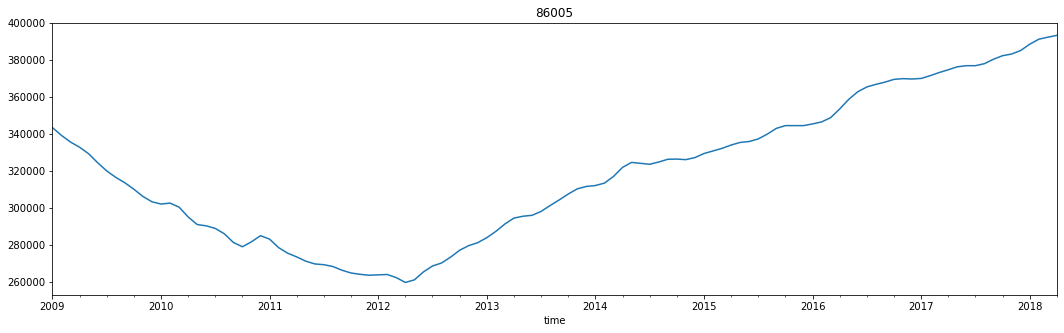

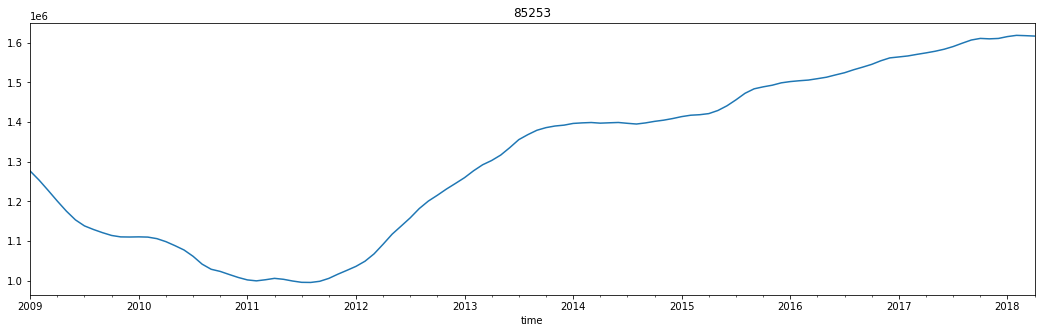

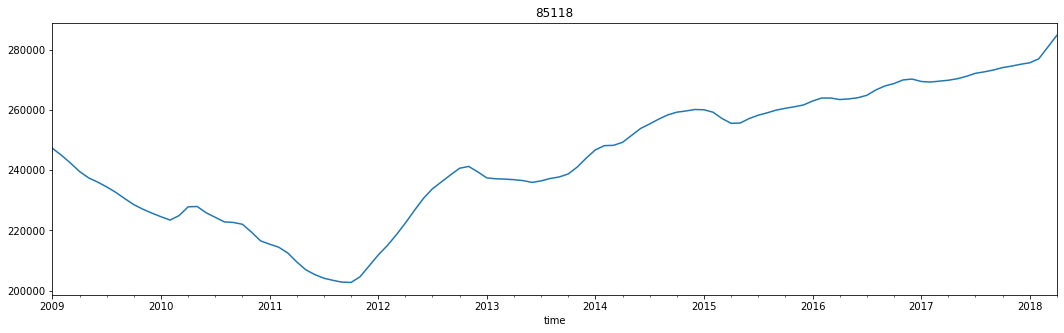

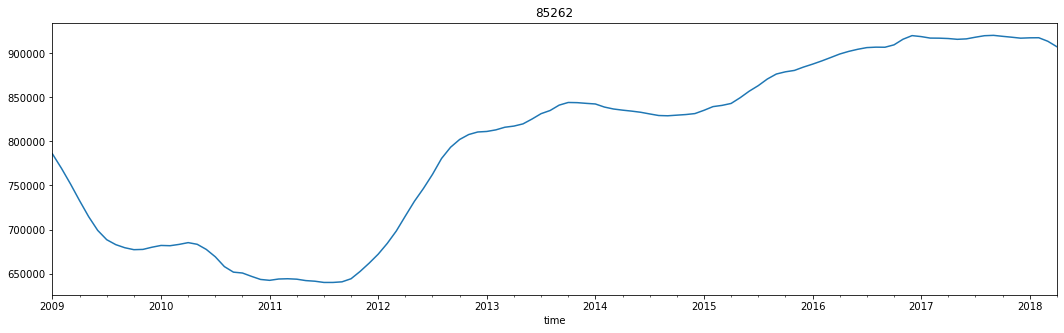

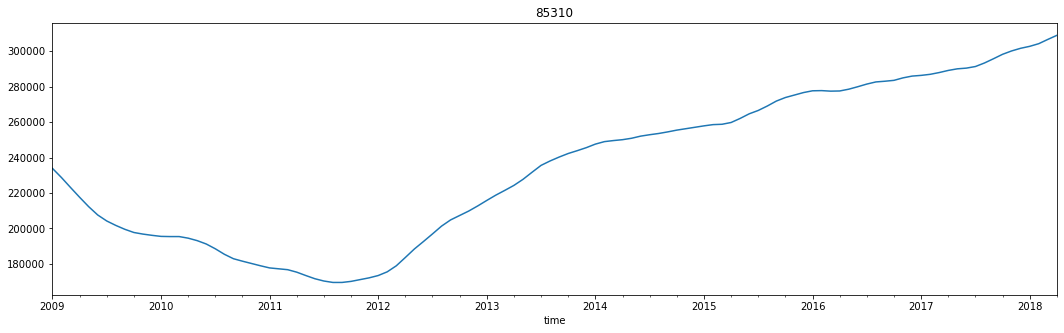

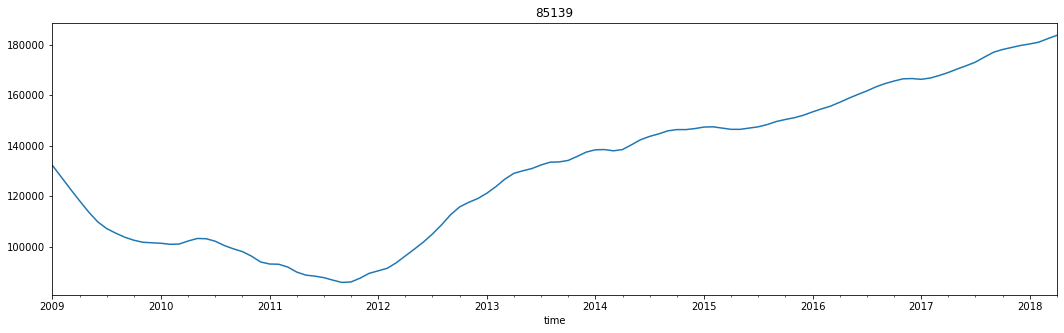

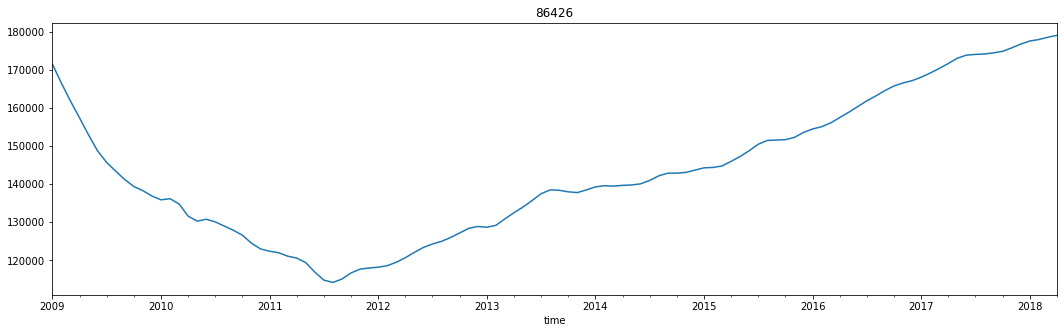

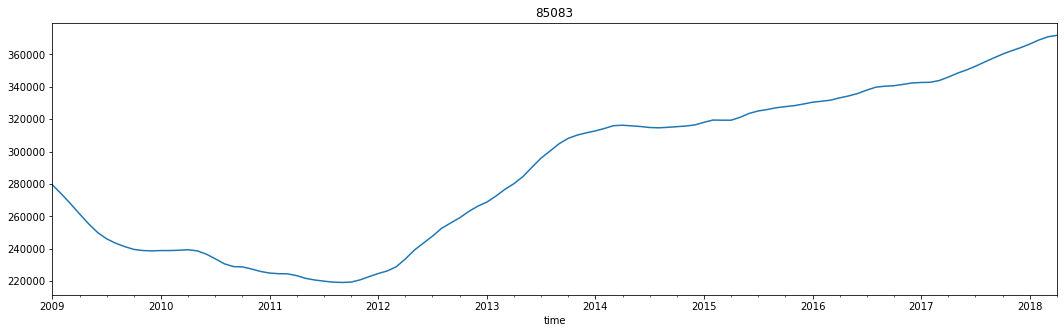

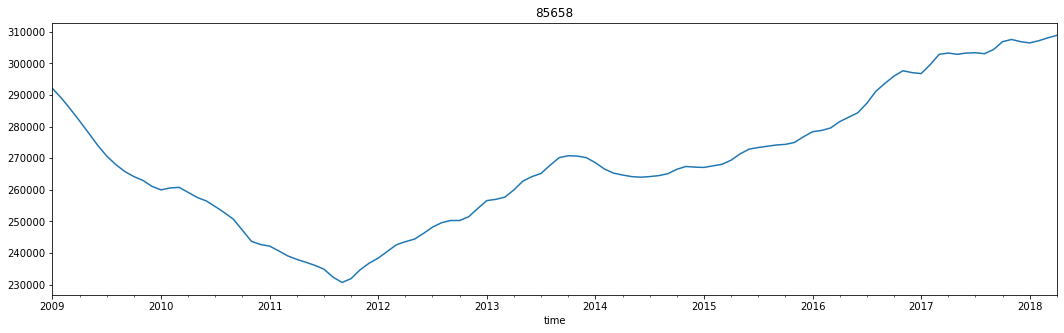

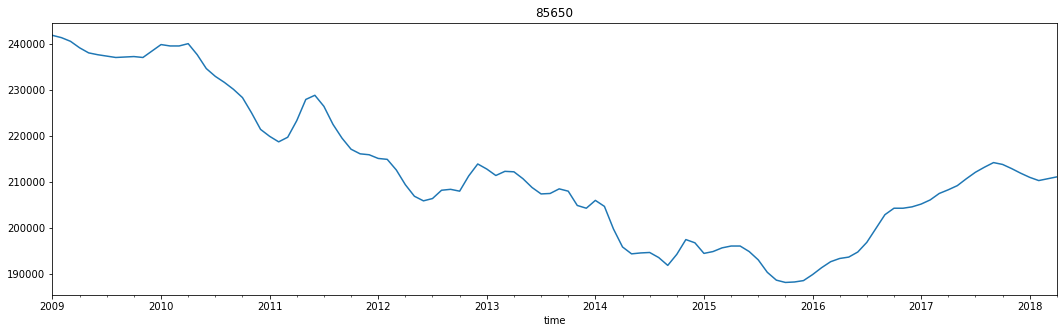

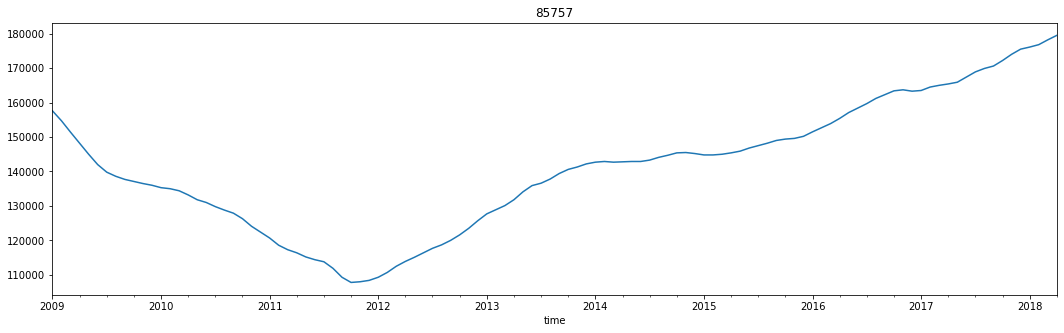

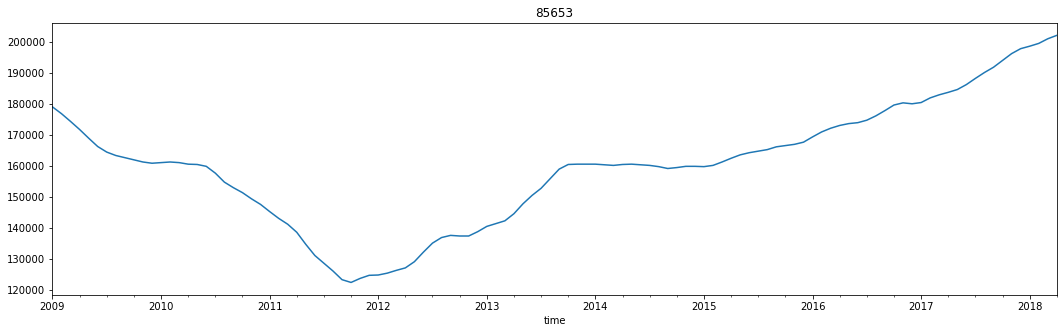

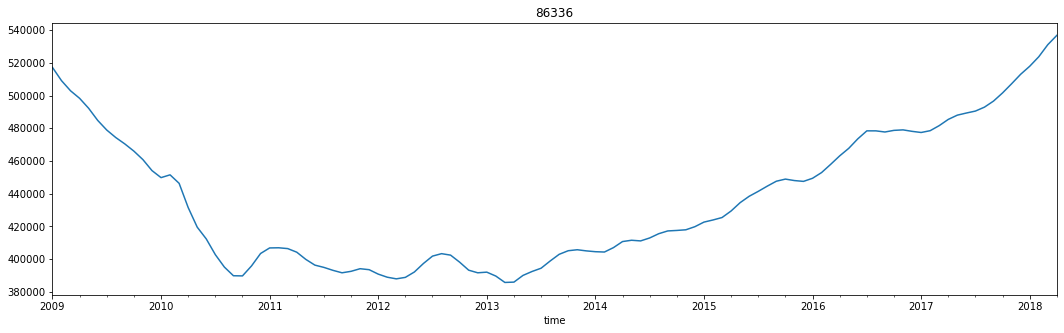

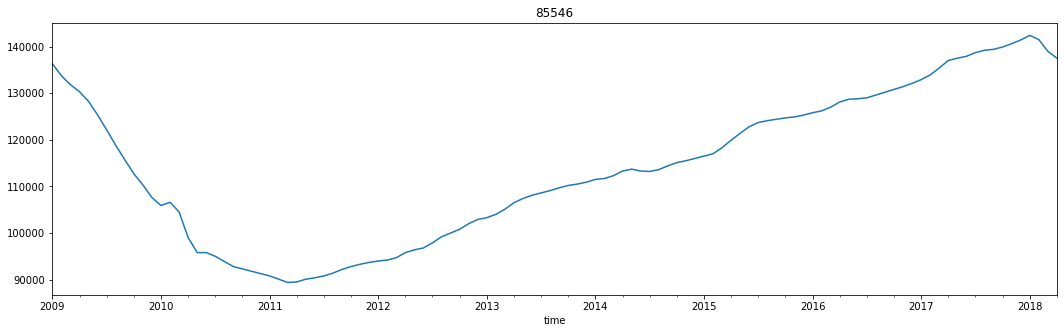

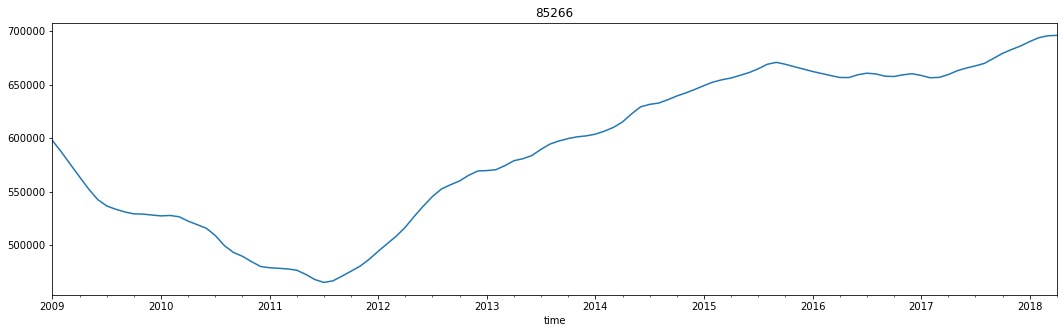

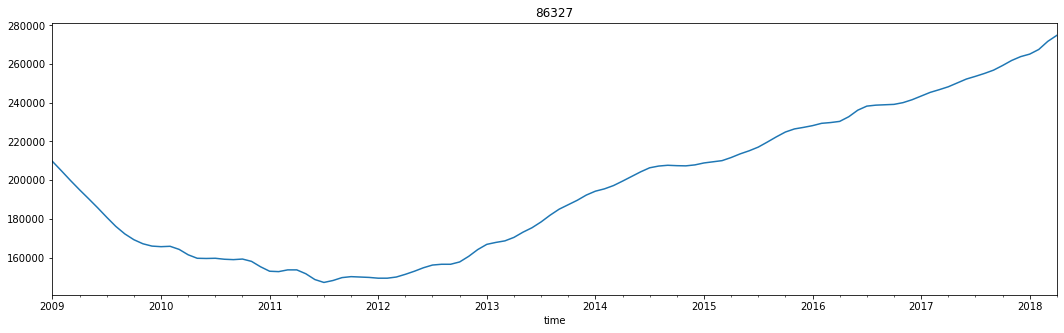

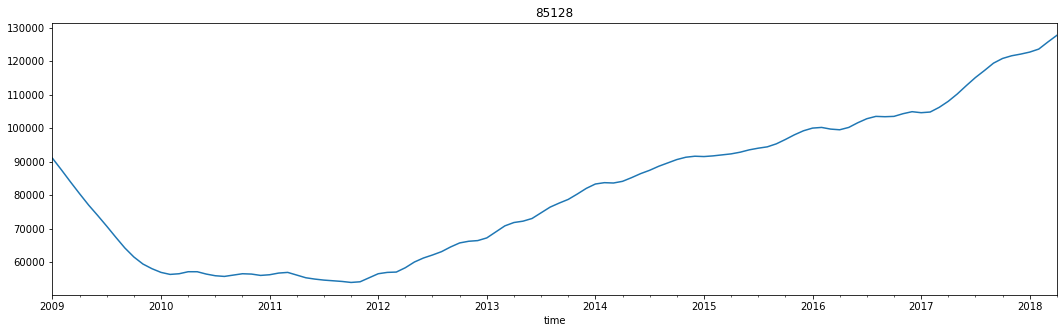

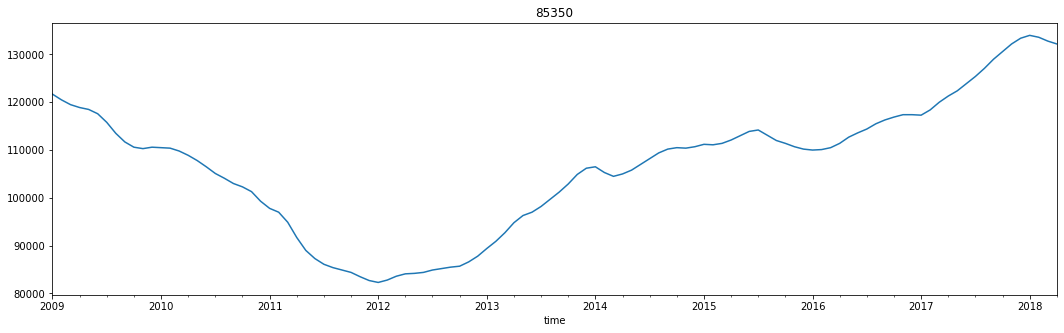

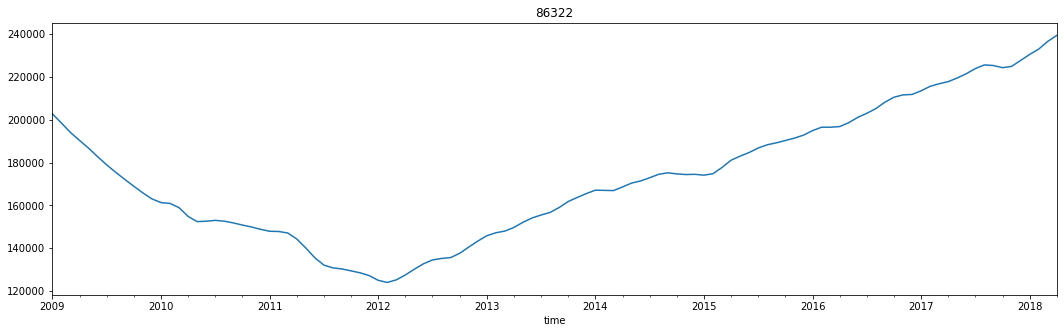

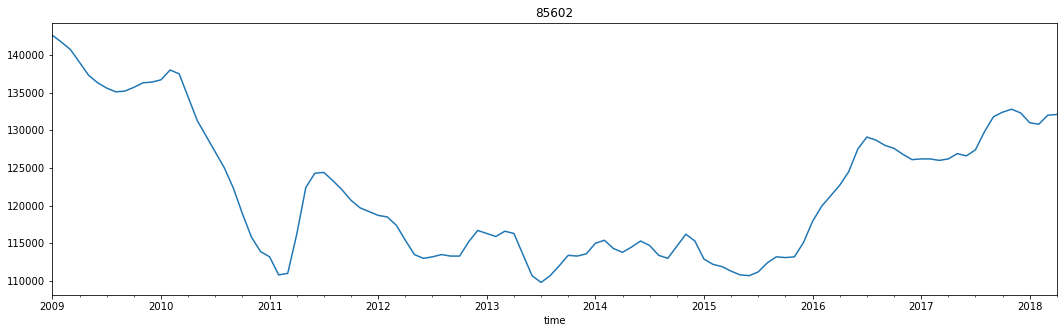

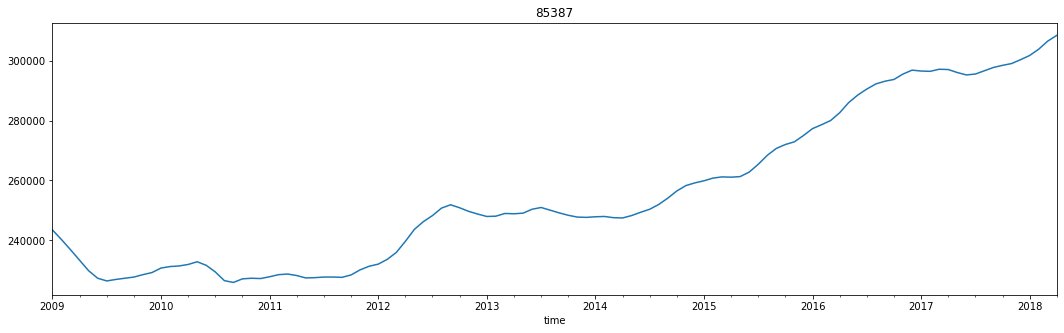

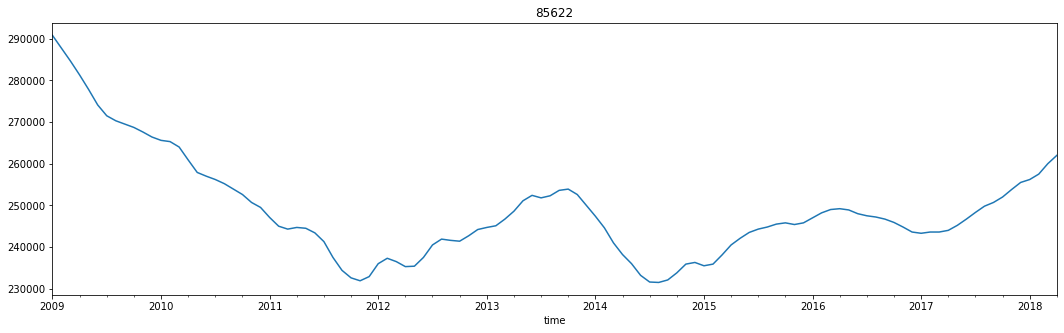

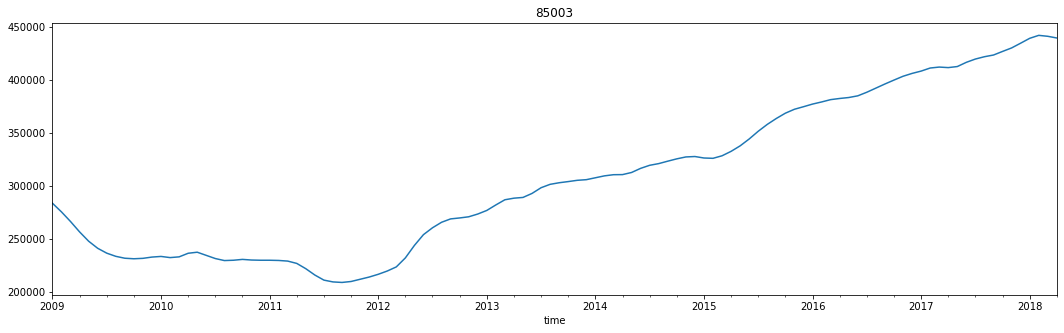

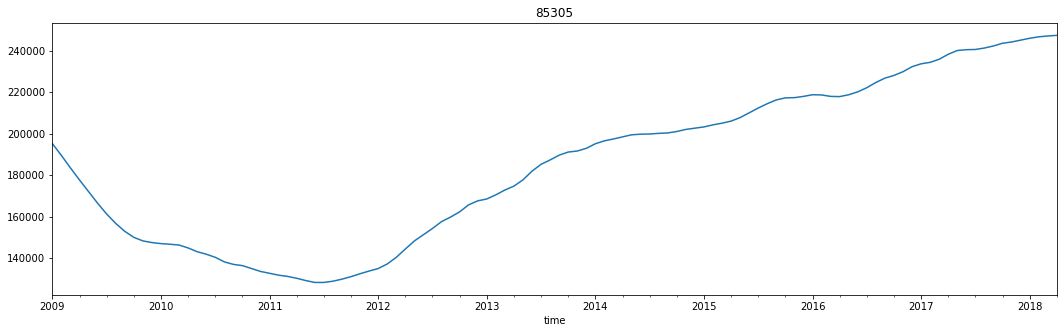

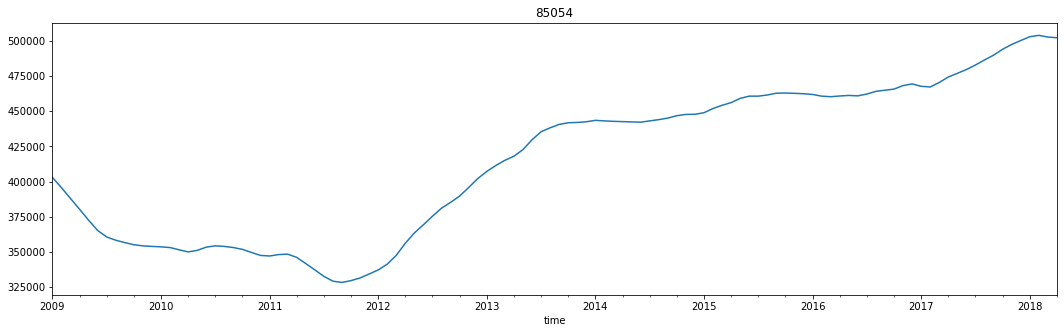

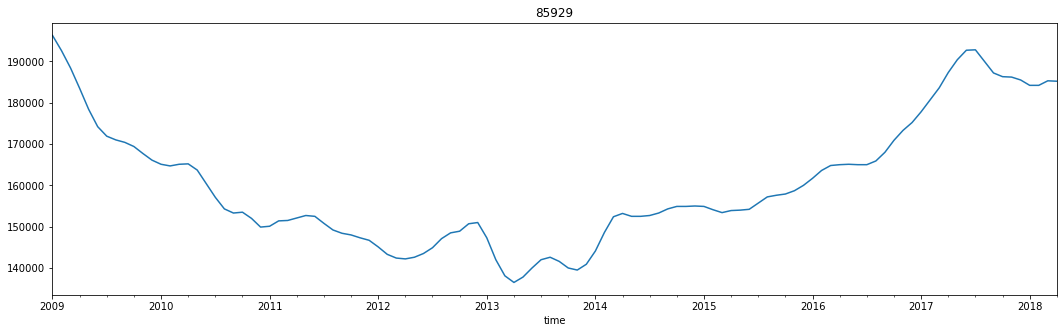

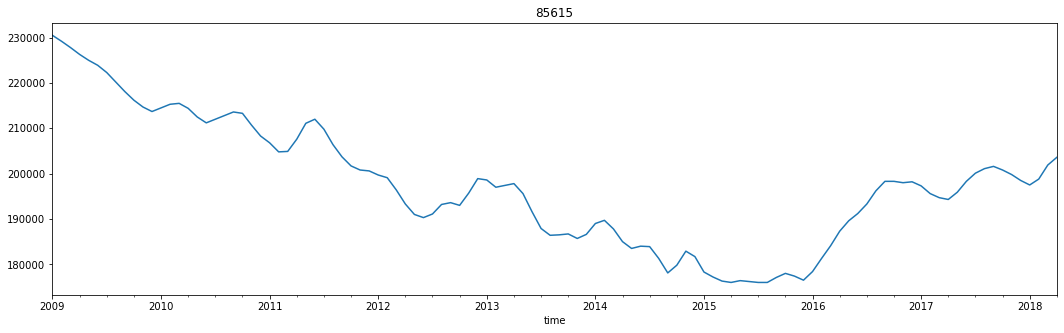

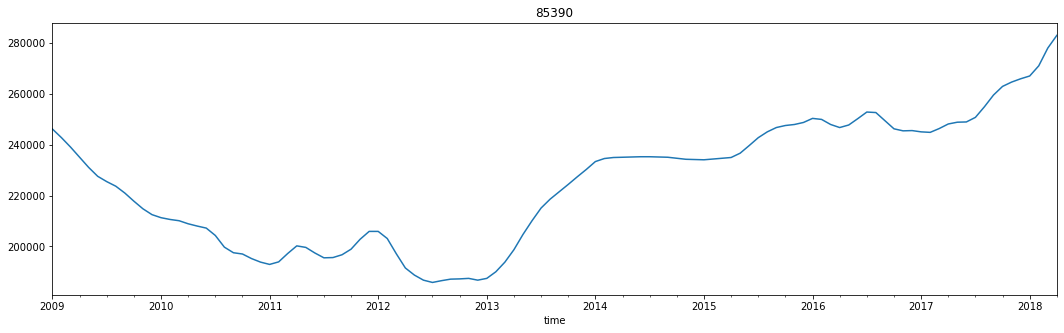

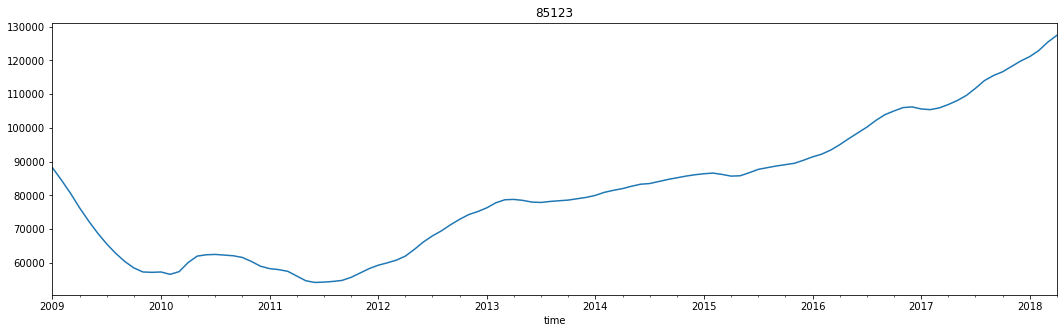

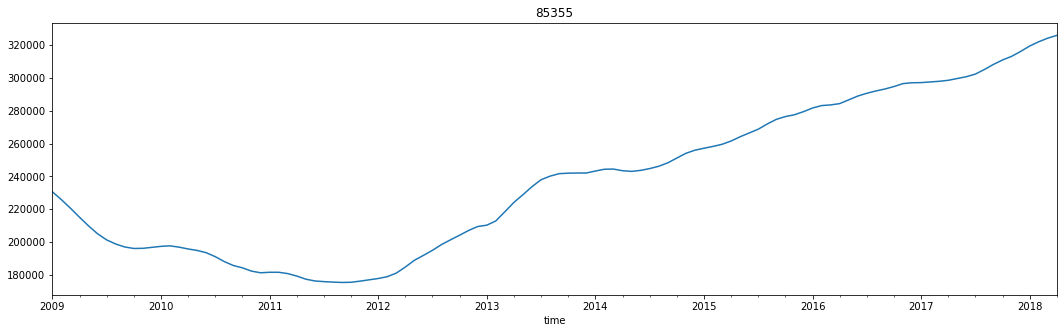

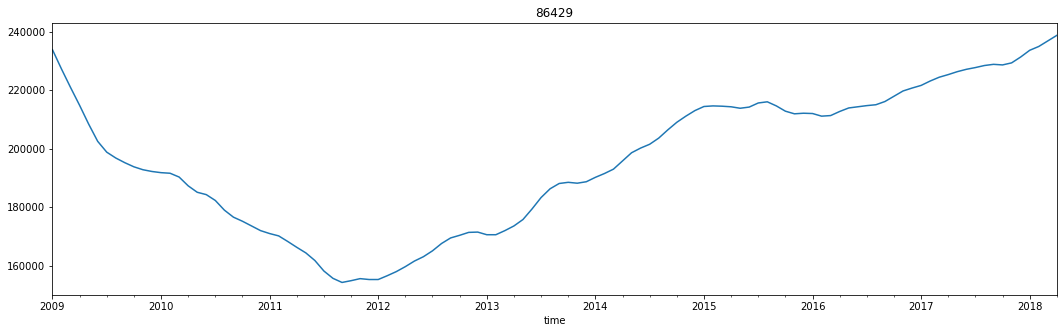

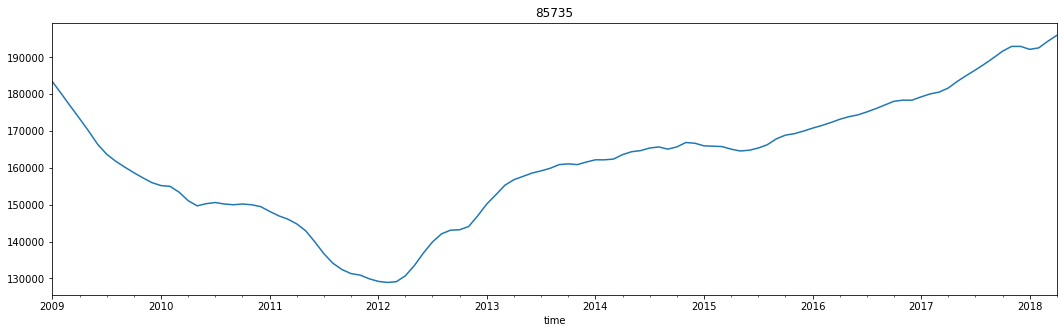

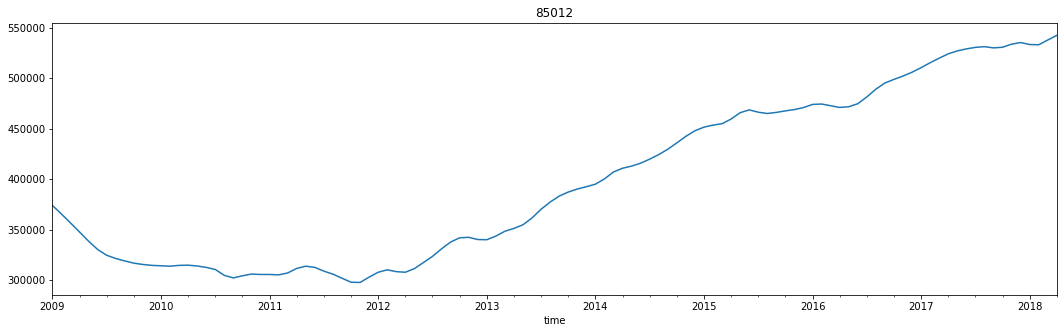

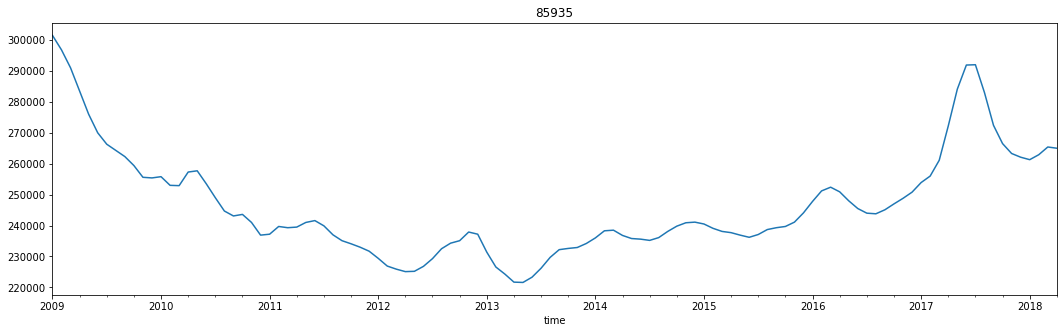

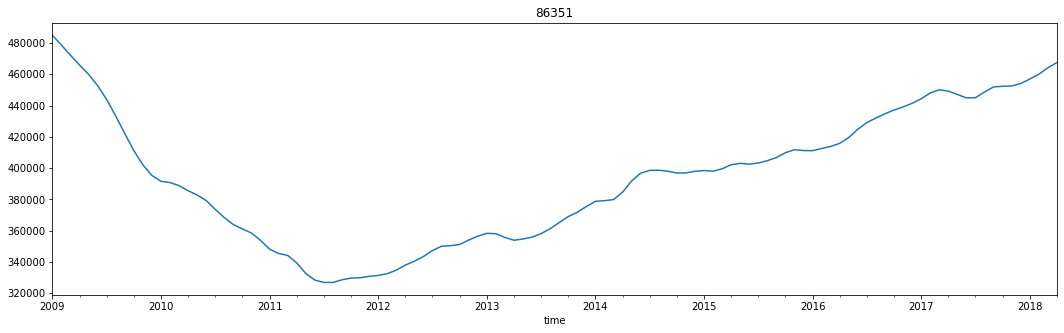

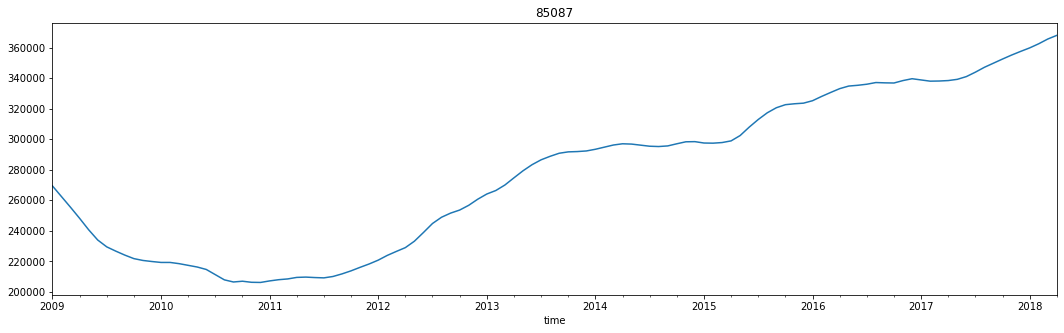

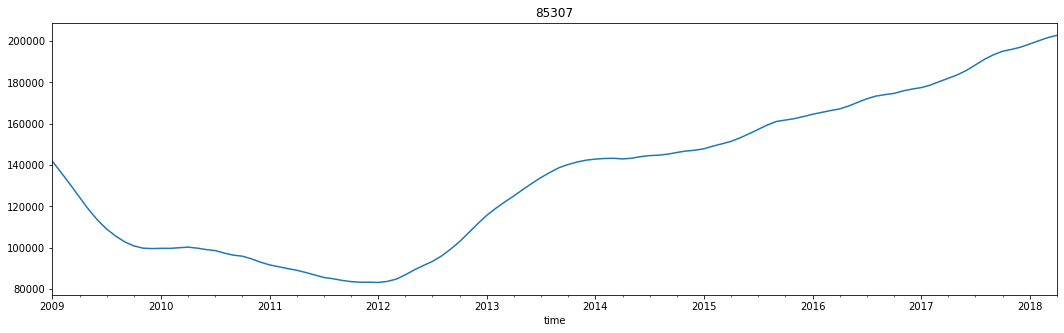

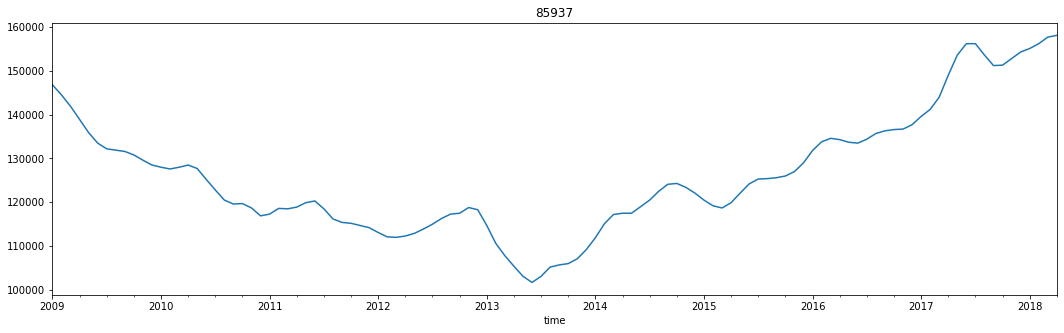

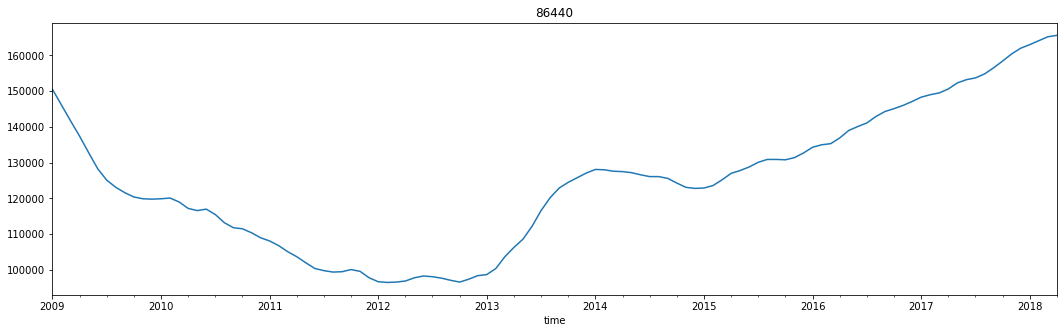

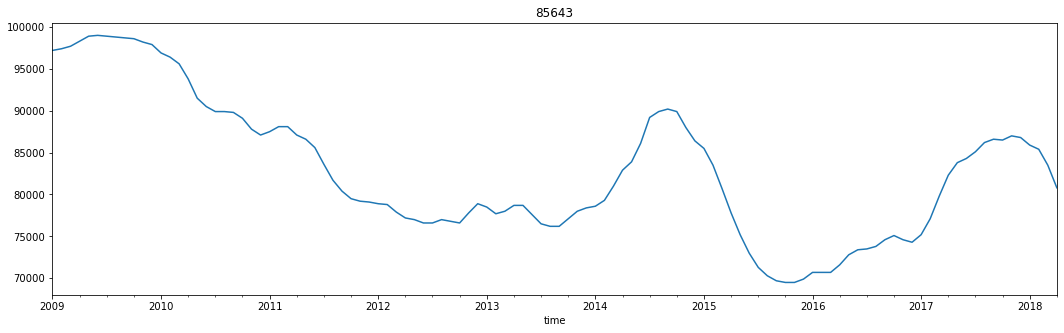

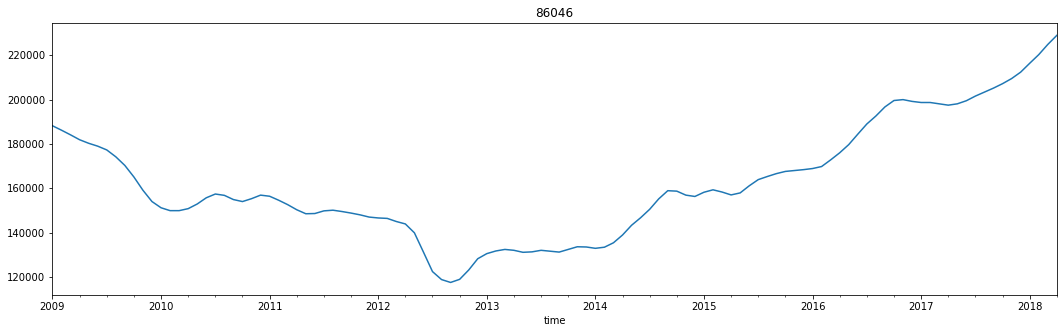

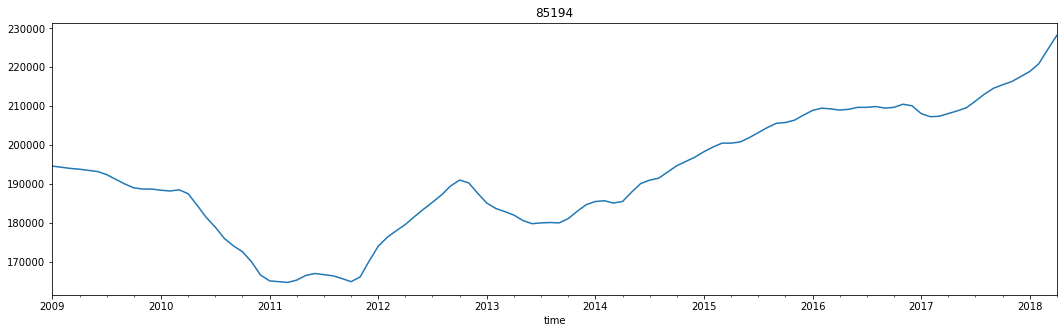

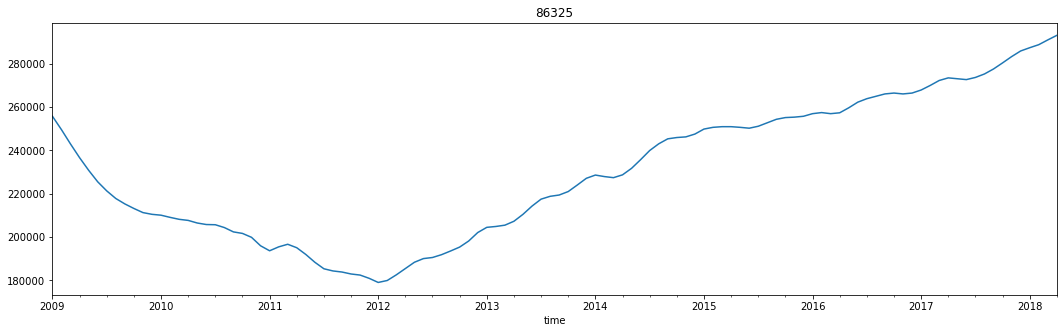

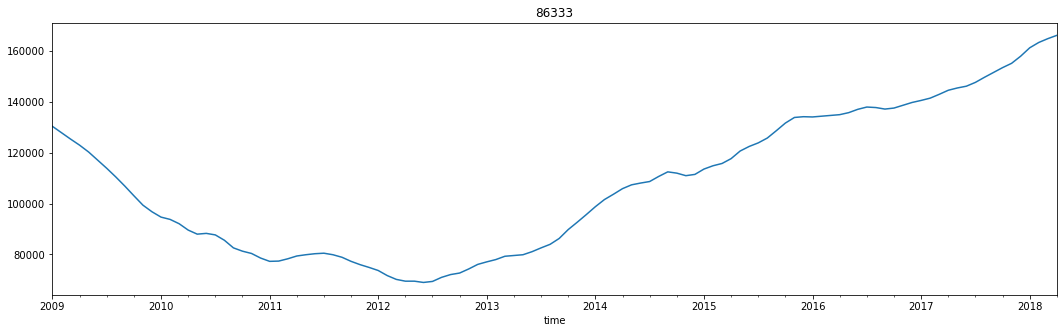

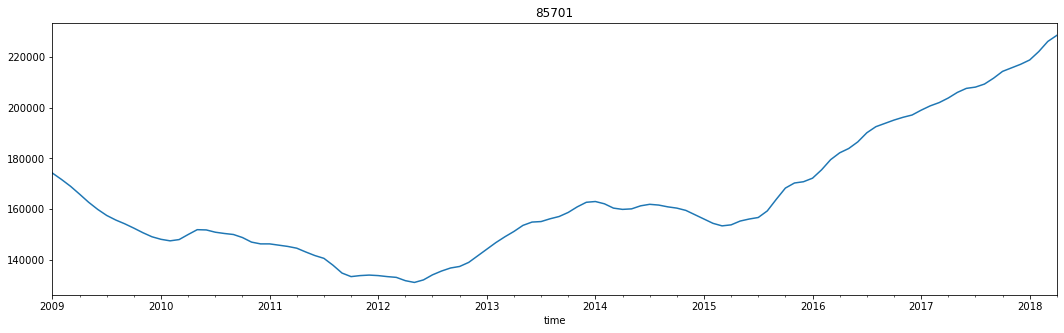

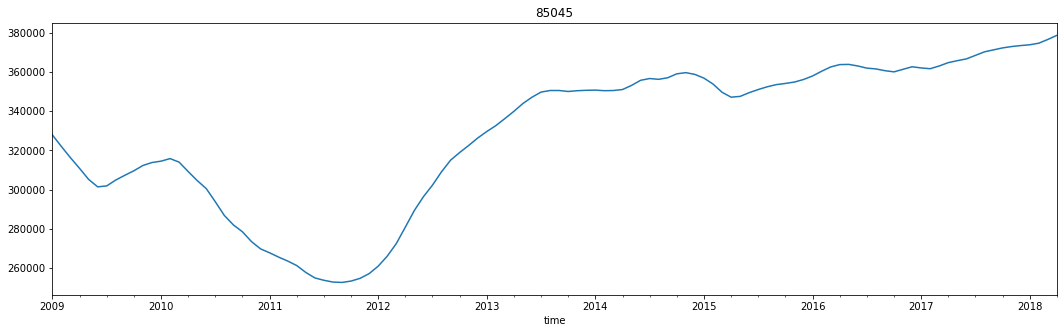

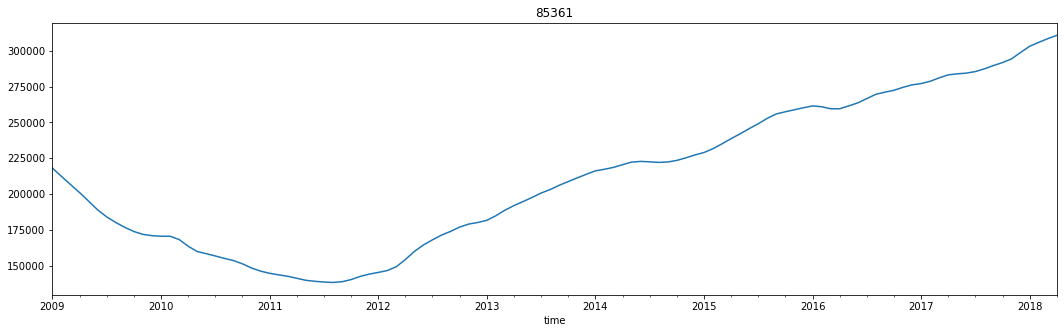

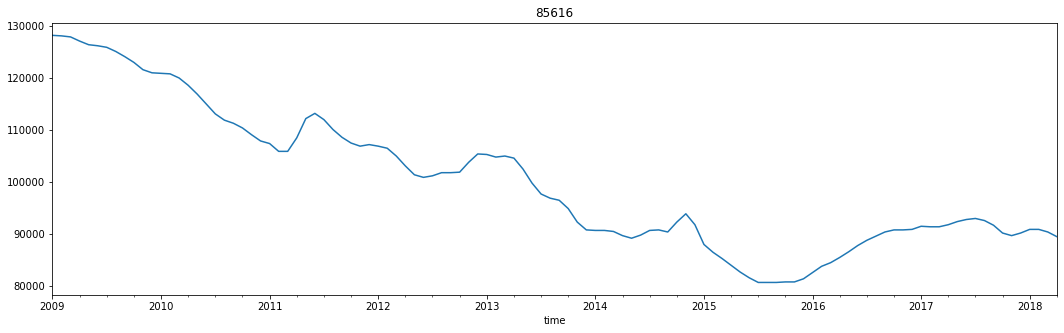

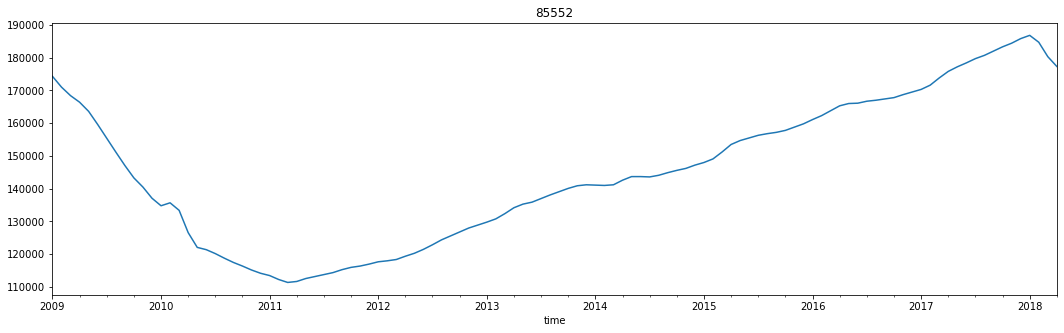

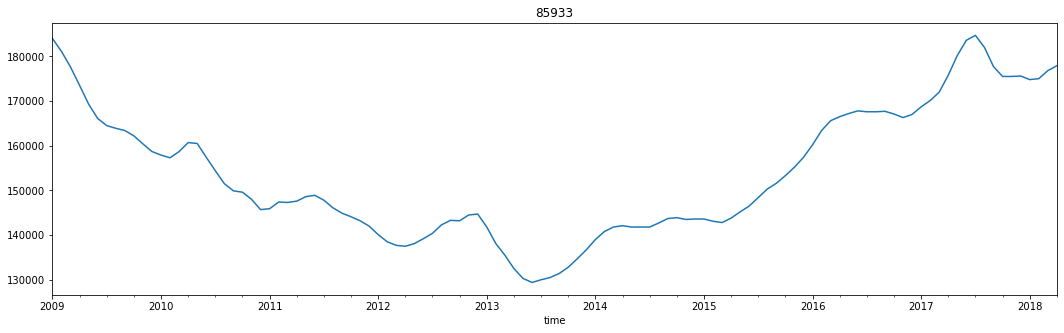

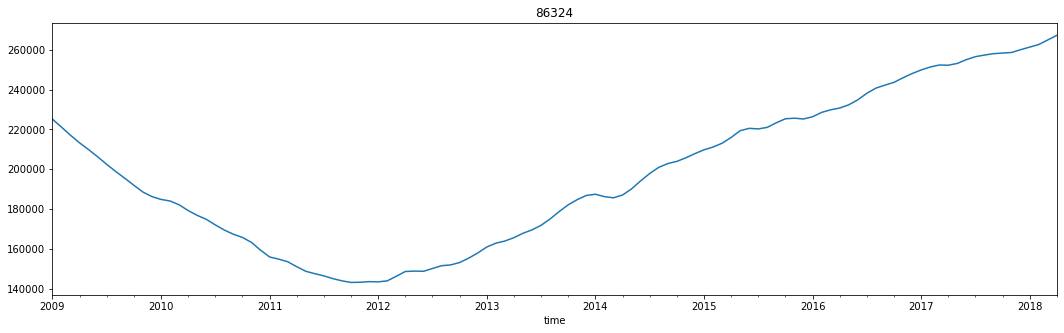

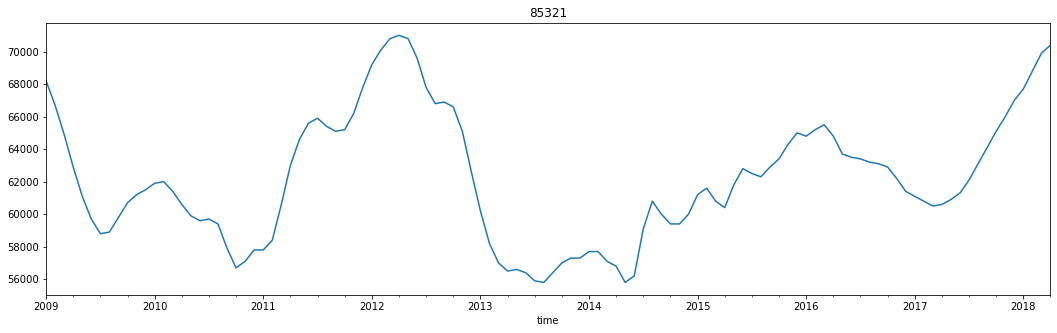

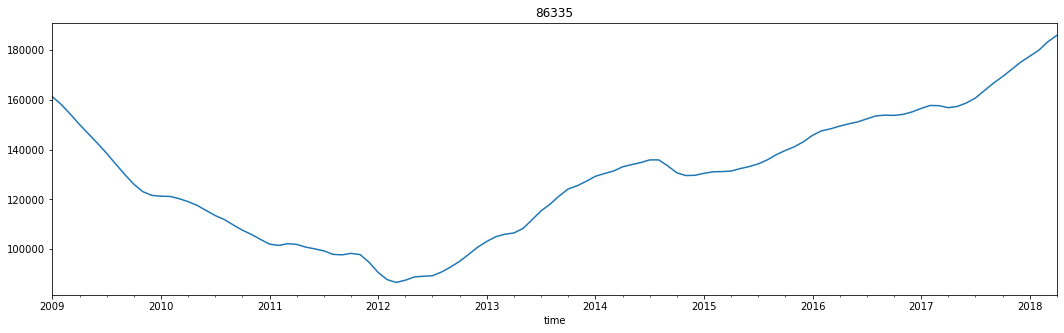

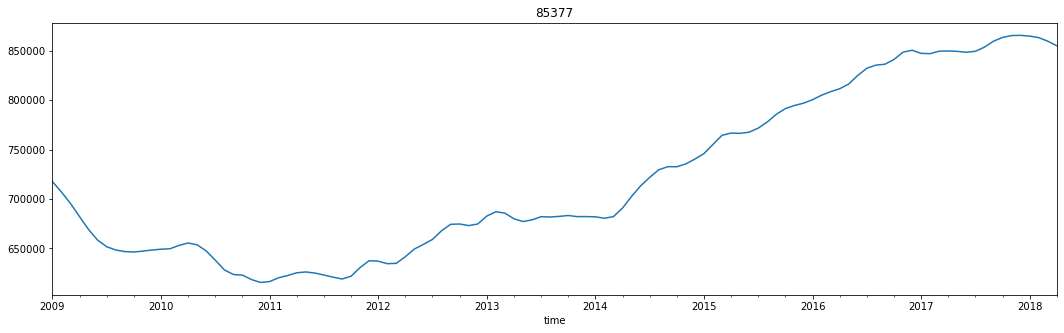

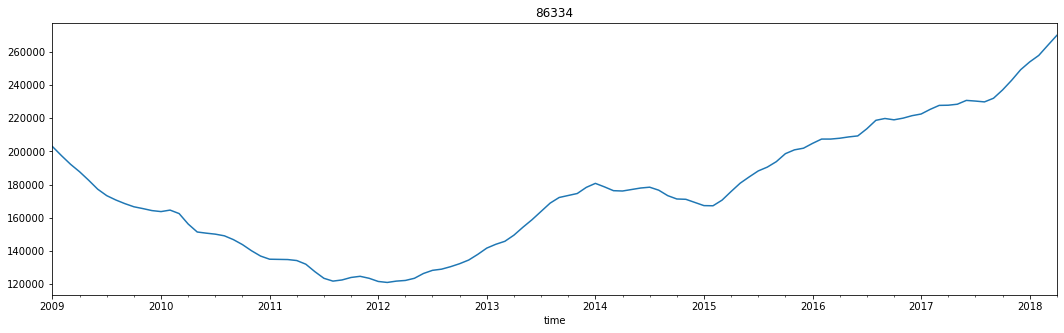

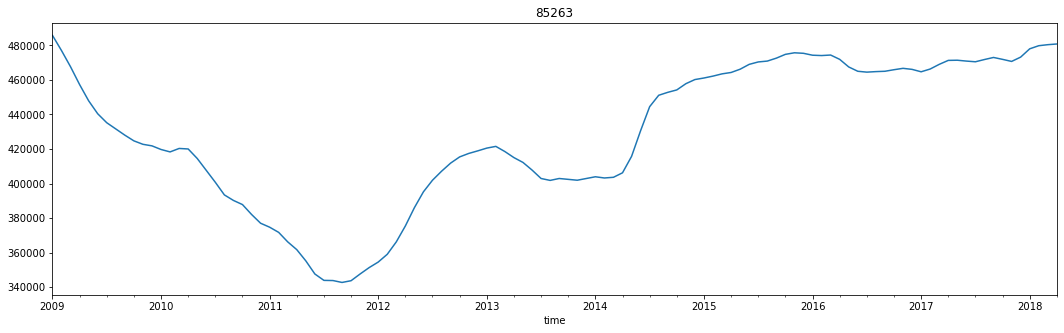

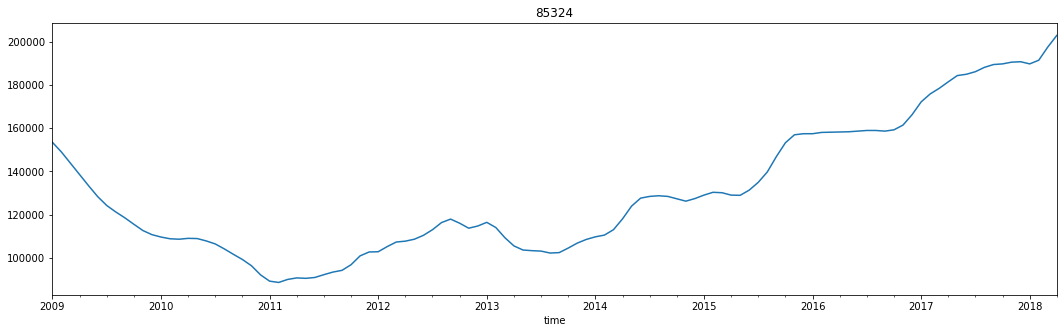

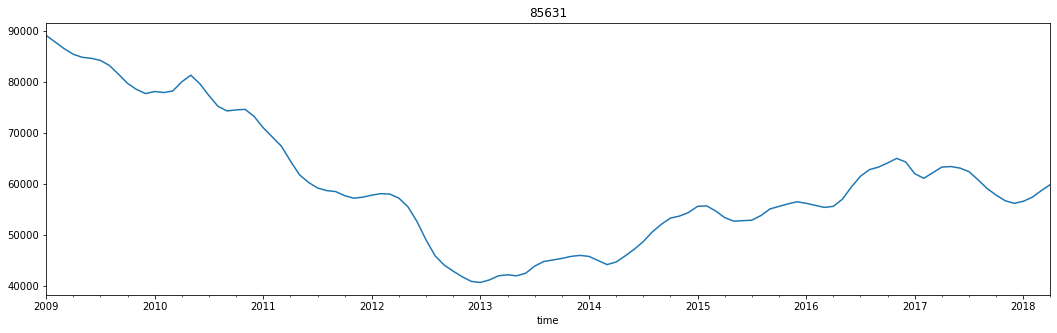

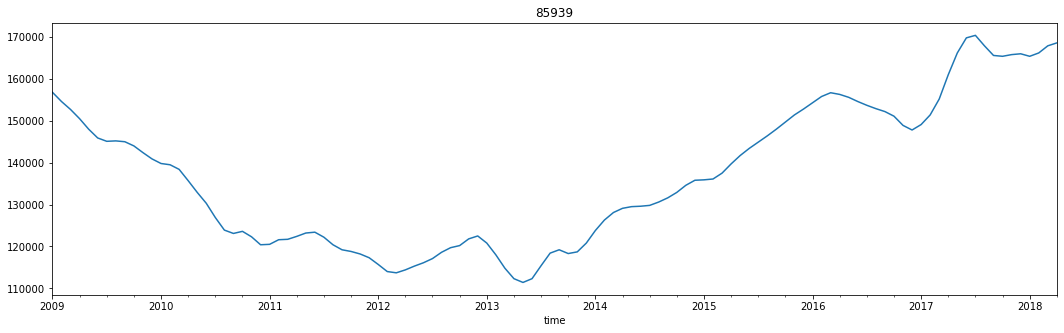

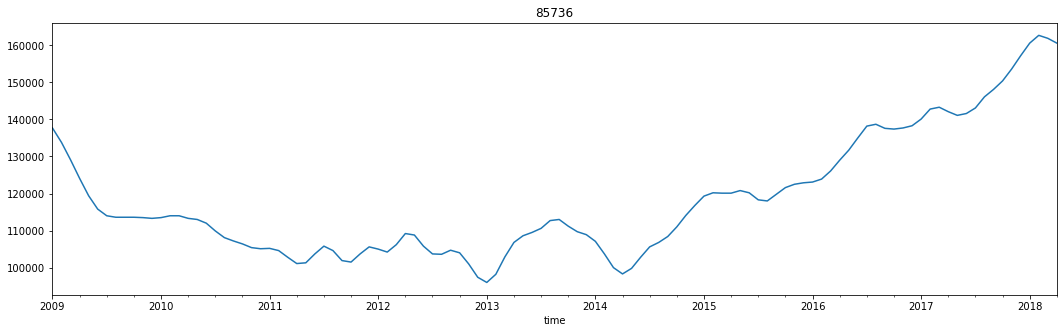

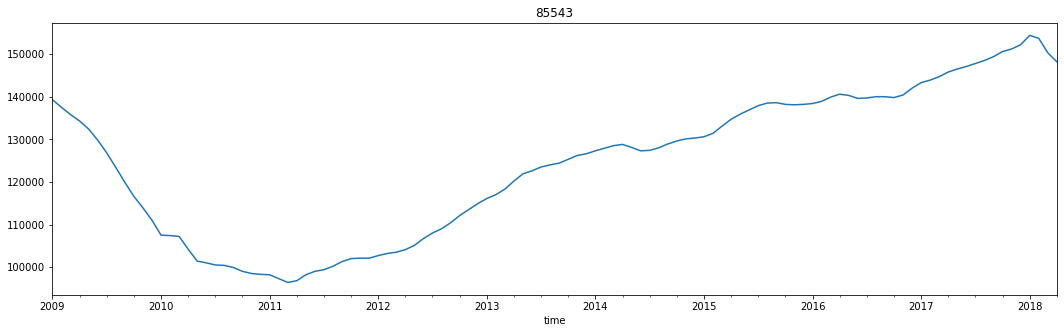

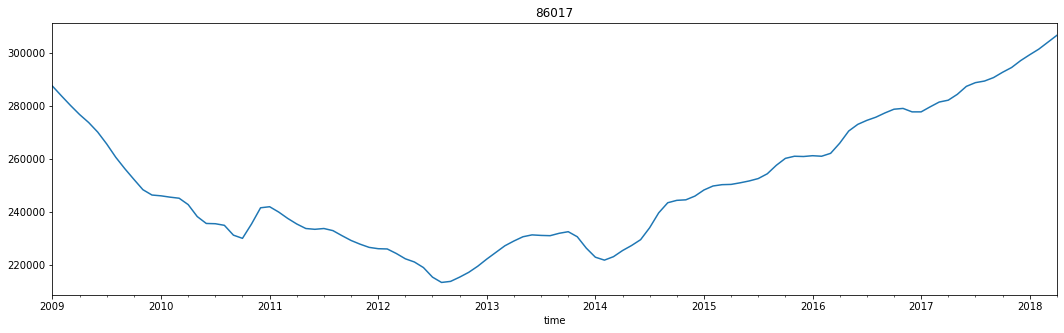

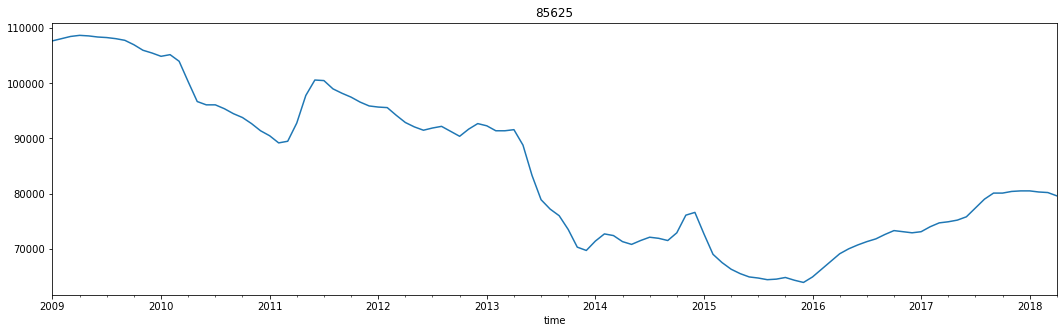

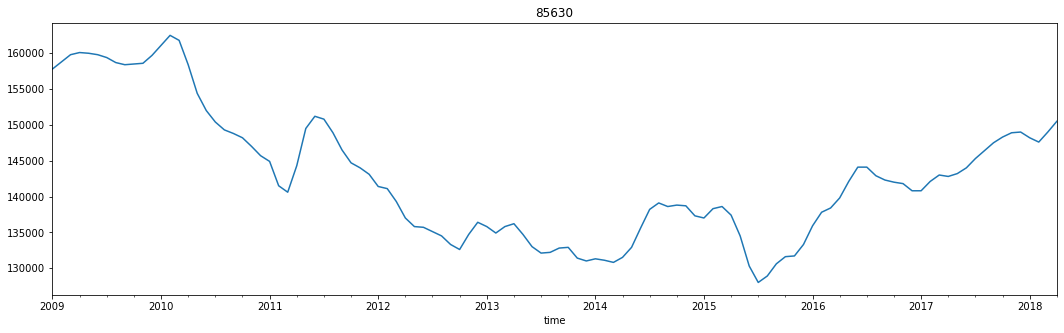

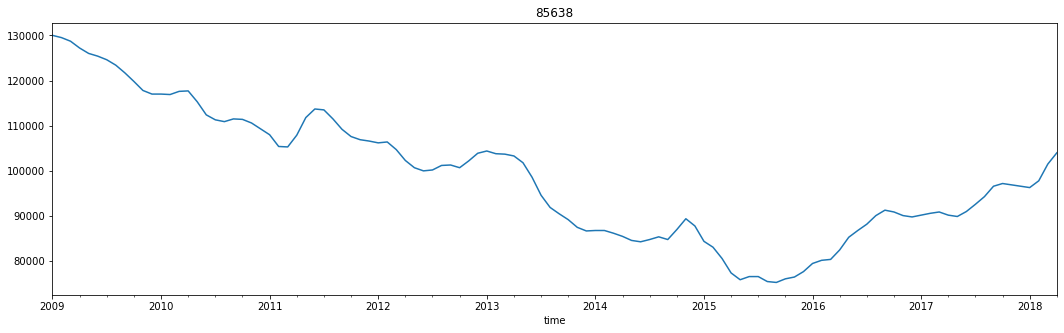

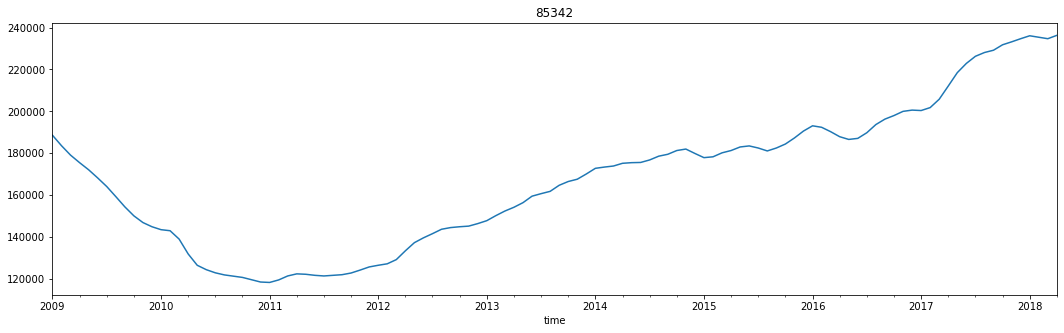

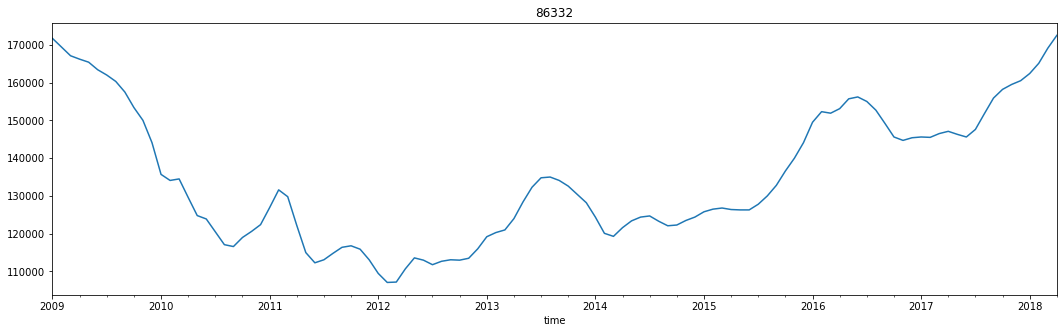

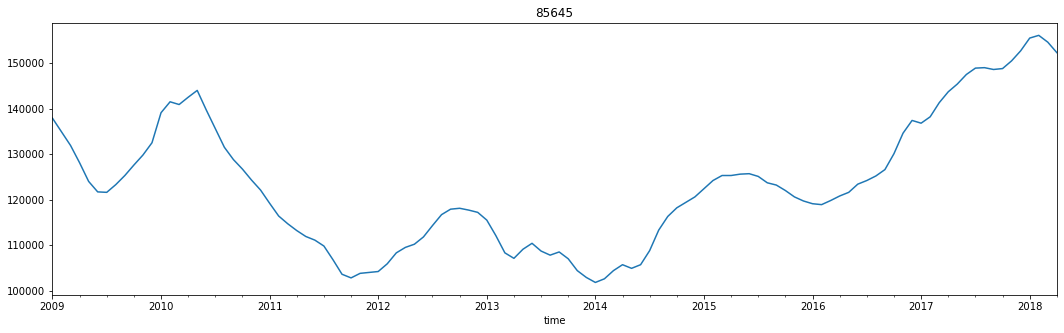

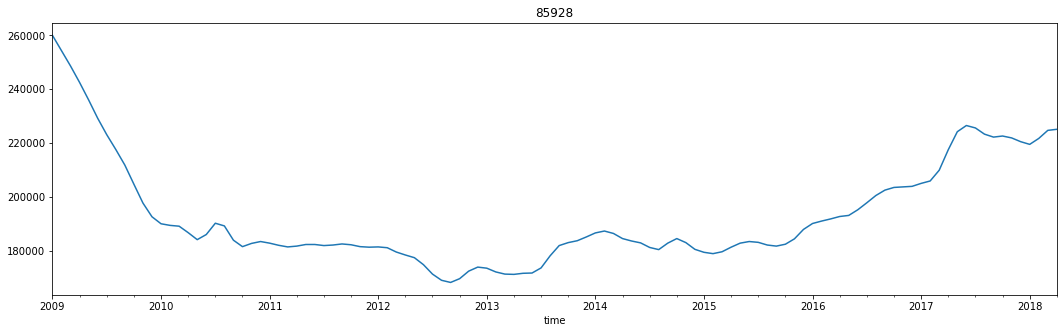

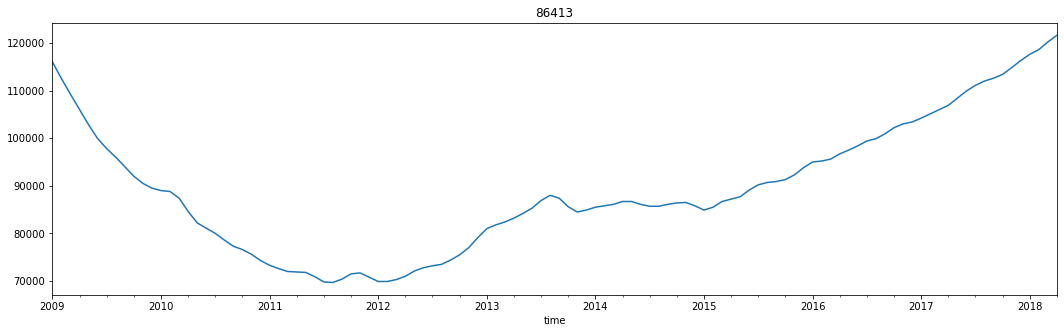

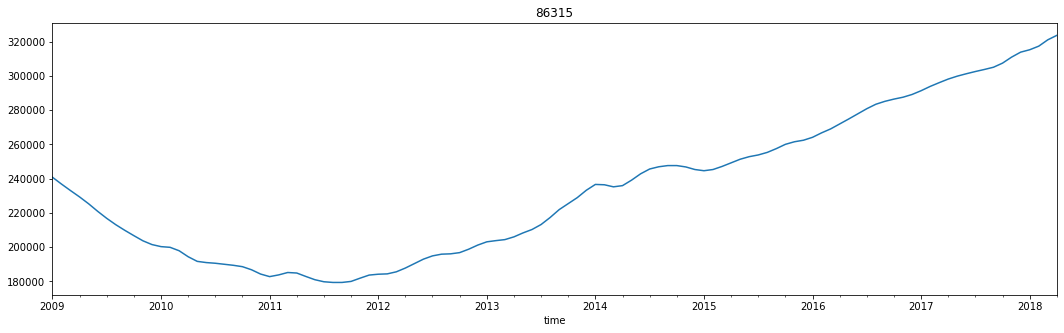

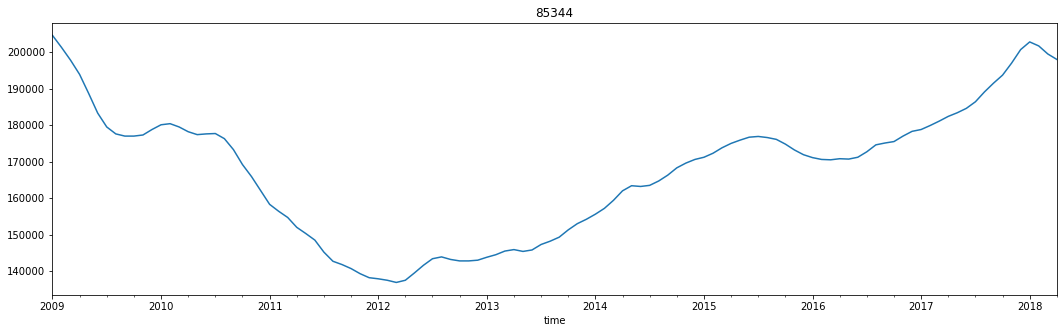

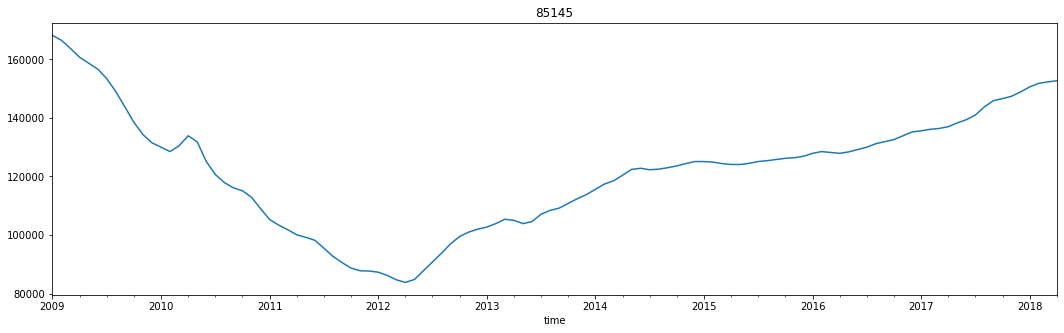

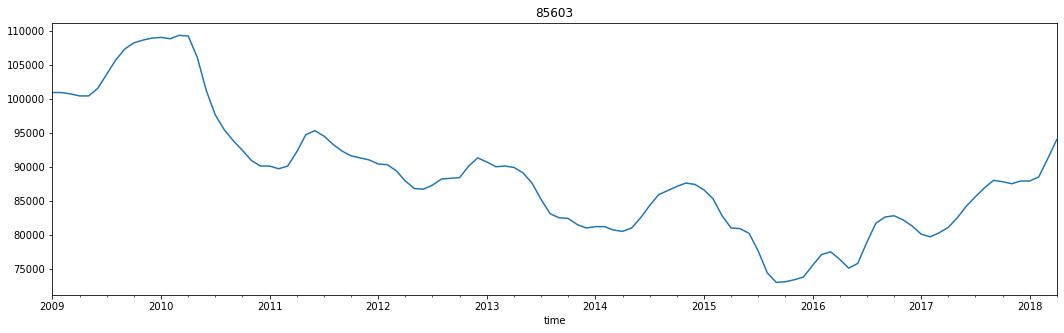

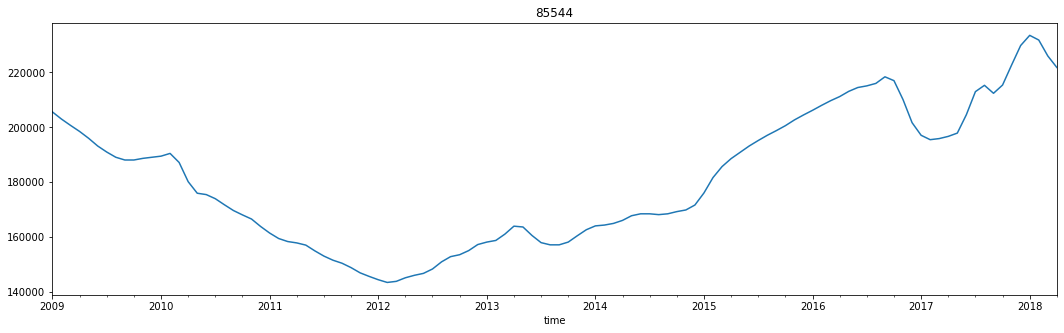

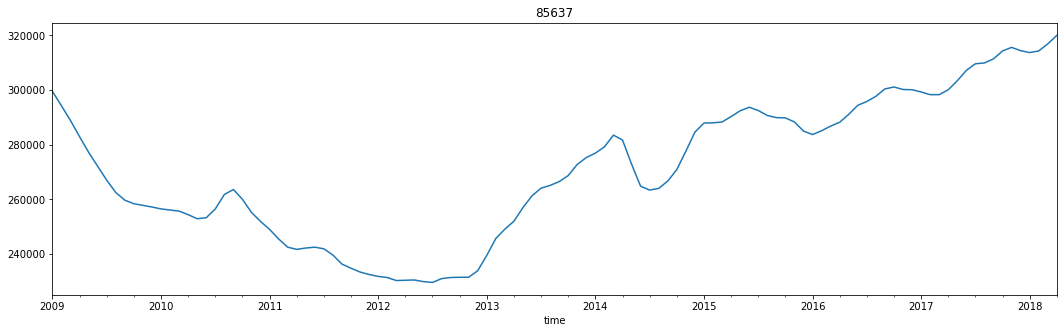

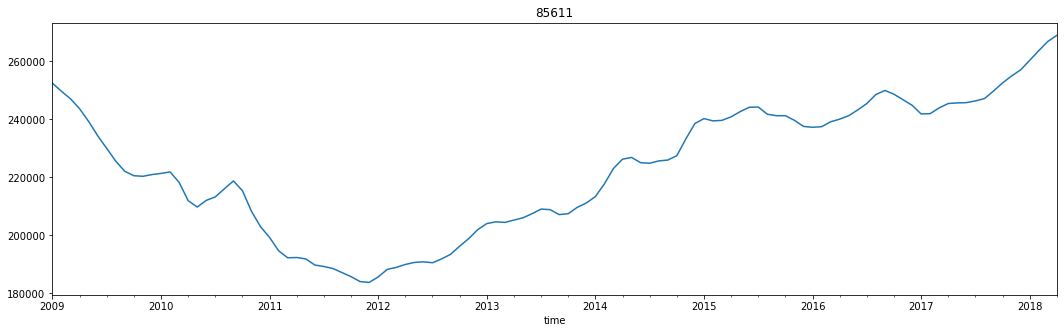

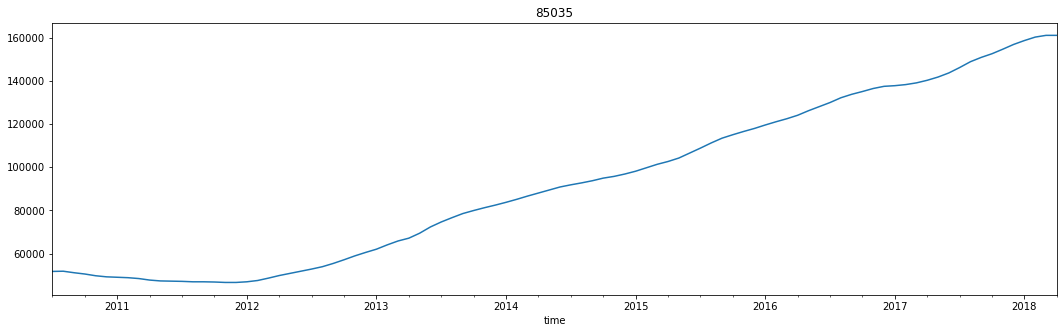

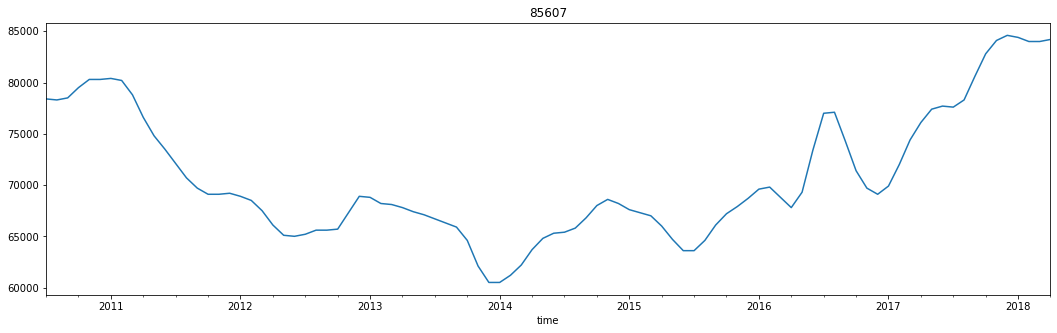

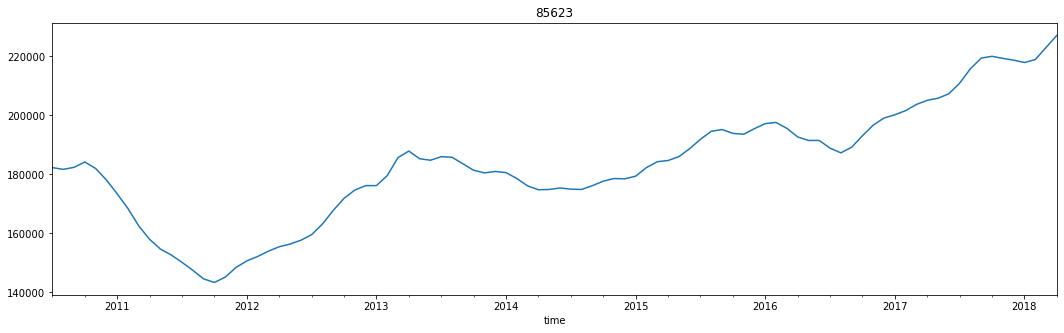

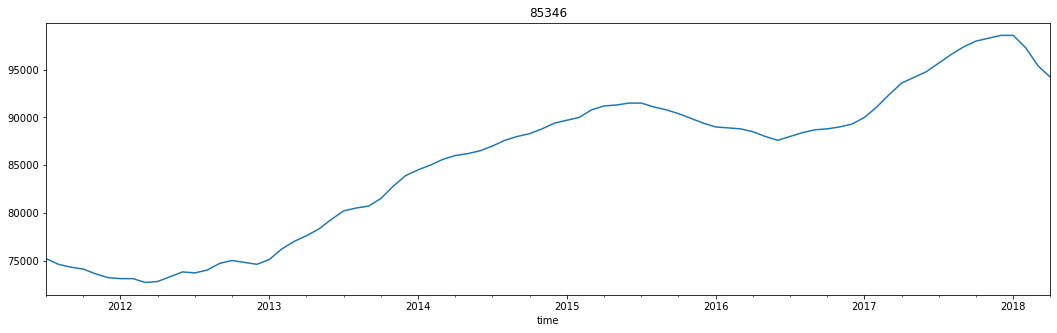

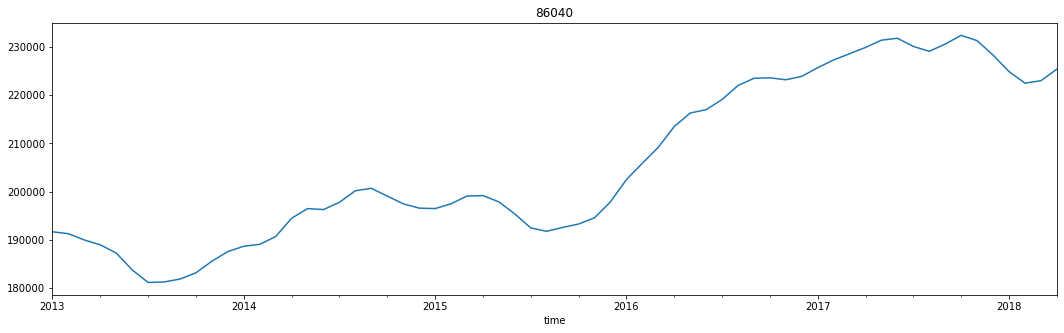

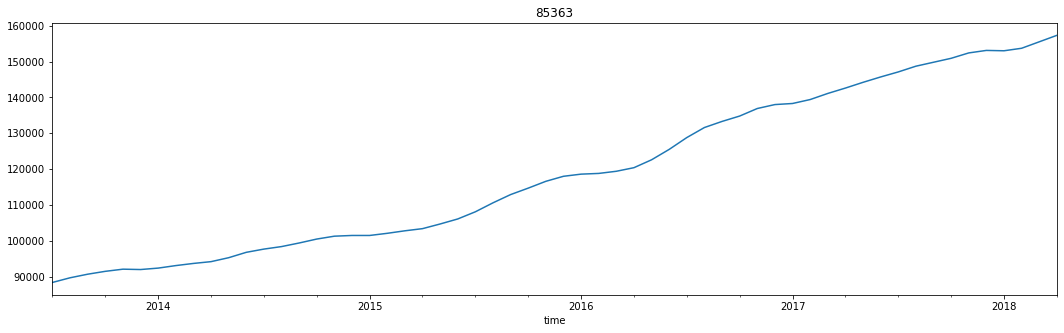

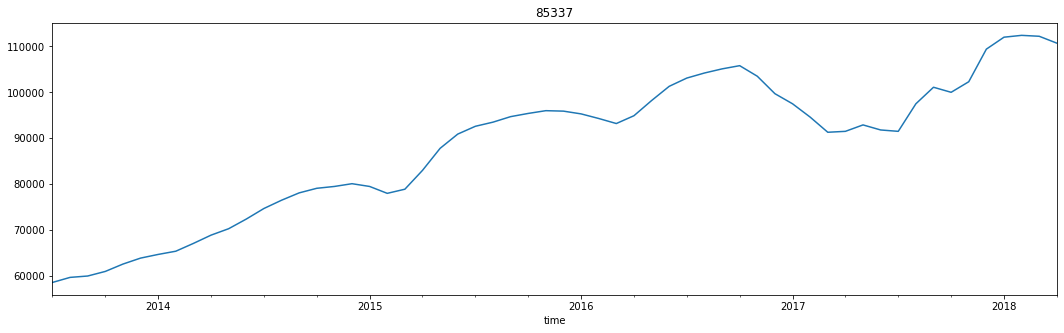

In [126]:
#for z in Arizona_df.Zipcode.unique():
  #  plot_zip(z)

In [127]:
Arizona_grouped_recent

value
Zipcode time                
85003   2009-01-31  283500.0
        2009-02-28  275300.0
        2009-03-31  266200.0
        2009-04-30  256400.0
        2009-05-31  247600.0
...                      ...
86442   2017-12-31  152000.0
        2018-01-31  153600.0
        2018-02-28  154700.0
        2018-03-31  155500.0
        2018-04-30  156200.0

[25520 rows x 1 columns]

In [140]:
rolling_mean = Arizona_recent_yrs.value.rolling(window=3).mean()

In [139]:
Arizona_recent_yrs.head()

Zipcode State    Metro     value
time                                        
2009-01-01    85032    AZ  Phoenix  190200.0
2009-01-01    85710    AZ   Tucson  171100.0
2009-01-01    85225    AZ  Phoenix  179900.0
2009-01-01    85308    AZ  Phoenix  212000.0
2009-01-01    85281    AZ  Phoenix  181300.0

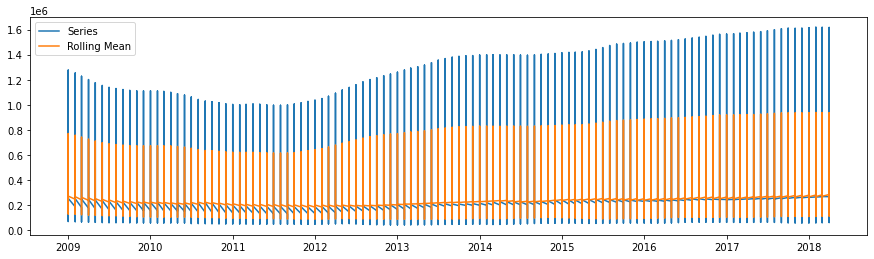

In [141]:
plt.figure(figsize=(15,4))
plt.plot(Arizona_recent_yrs.index, Arizona_recent_yrs.value, label='Series')
plt.plot(Arizona_recent_yrs.index, rolling_mean, label='Rolling Mean')
plt.legend();

In [142]:
# Your code here
def rolling_mean_diff(df,window=3,periods=12):
    roll_mean=df.rolling(window=window).mean()
    df_minus_roll_mean= df-roll_mean
    return df_minus_roll_mean
    df_diff= df_minus_roll_mean.diff(periods=periods)
    return df_diff

In [146]:
rolling_mean_diff(Arizona_recent_yrs)

Metro  State     Zipcode         value
time                                              
2009-01-01    NaN    NaN         NaN           NaN
2009-01-01    NaN    NaN         NaN           NaN
2009-01-01    NaN    NaN  -97.333333   -500.000000
2009-01-01    NaN    NaN -106.333333  24333.333333
2009-01-01    NaN    NaN    9.666667  -9766.666667
...           ...    ...         ...           ...
2018-04-01    NaN    NaN  661.666667   -666.666667
2018-04-01    NaN    NaN -126.333333   7133.333333
2018-04-01    NaN    NaN  -40.333333  41800.000000
2018-04-01    NaN    NaN  -99.666667  87533.333333
2018-04-01    NaN    NaN -114.333333  -2366.666667

[25520 rows x 4 columns]

In [147]:
value_rolling_mean_diff_Arizona=rolling_mean_diff(Arizona_recent_yrs)

<AxesSubplot:xlabel='time'>

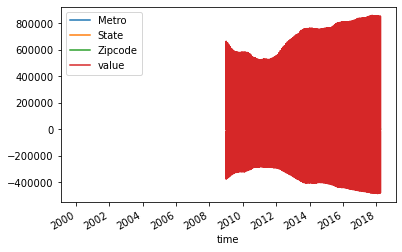

In [148]:
value_rolling_mean_diff_Arizona.plot()

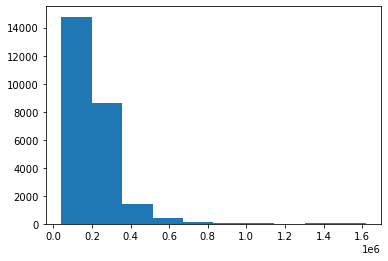

In [149]:
Arizona_recent_yrs.value.hist(grid=False);

In [157]:
diff_values=Arizona_recent_yrs.value.diff().dropna()

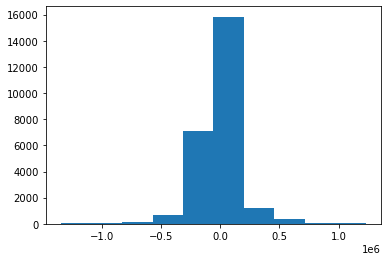

In [158]:
diff_values.hist(grid=False);

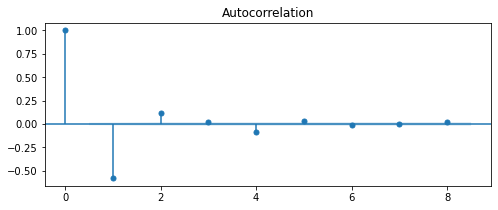

In [159]:
# Plot the ACF
from statsmodels.graphics.tsaplots import plot_acf
fig, ax = plt.subplots(figsize=(8,3))
plot_acf(diff_values,ax=ax, lags=8);

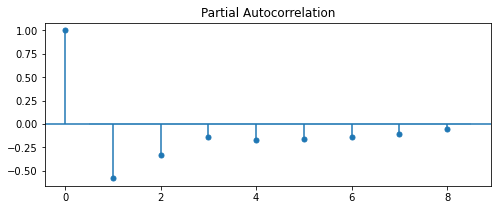

In [160]:
# Plot the PACF
from statsmodels.graphics.tsaplots import plot_pacf
fig, ax = plt.subplots(figsize=(8,3))
plot_pacf(diff_values,ax=ax, lags=8);

In [161]:
# Import ARMA
from statsmodels.tsa.arima_model import ARMA

# Fit an ARMA(1,0) model
mod_arma = ARMA(diff_values, order=(1,0))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

/Users/matthewreinhart/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/matthewreinhart/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueW

                              ARMA Model Results                              
Dep. Variable:                  value   No. Observations:                25519
Model:                     ARMA(1, 0)   Log Likelihood             -340401.805
Method:                       css-mle   S.D. of innovations         150272.388
Date:                Mon, 03 Jan 2022   AIC                         680809.609
Time:                        18:12:11   BIC                         680834.051
Sample:                             0   HQIC                        680817.512
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.0879    595.513      0.005      0.996   -1164.097    1170.272
ar.L1.value    -0.5797      0.005   -113.643      0.000      -0.590      -0.570
                                    Roots       

In [162]:
# Fit an ARMA(2,1) model
mod_arma = ARMA(diff_values, order=(2,1))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

/Users/matthewreinhart/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/matthewreinhart/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueW

                              ARMA Model Results                              
Dep. Variable:                  value   No. Observations:                25519
Model:                     ARMA(2, 1)   Log Likelihood             -336548.995
Method:                       css-mle   S.D. of innovations         129201.233
Date:                Mon, 03 Jan 2022   AIC                         673107.990
Time:                        18:14:26   BIC                         673148.726
Sample:                             0   HQIC                        673121.162
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.1429      1.445      1.483      0.138      -0.690       4.976
ar.L1.value     0.0067      0.006      1.092      0.275      -0.005       0.019
ar.L2.value     0.1661      0.006     26.882    

In [163]:
# Fit an ARMA(2,2) model
mod_arma = ARMA(diff_values, order=(2,2))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

/Users/matthewreinhart/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/matthewreinhart/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueW

                              ARMA Model Results                              
Dep. Variable:                  value   No. Observations:                25519
Model:                     ARMA(2, 2)   Log Likelihood             -336490.506
Method:                       css-mle   S.D. of innovations         128905.644
Date:                Mon, 03 Jan 2022   AIC                         672993.012
Time:                        18:15:45   BIC                         673041.895
Sample:                             0   HQIC                        673008.818
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.1630      1.462      1.479      0.139      -0.703       5.029
ar.L1.value     0.2935      0.010     28.989      0.000       0.274       0.313
ar.L2.value     0.1690      0.006     27.273    

In [171]:
def ts_models(df,order=(1,0)):
    #Plot ACF
    diff_values=df.diff().dropna()
    fig, ax = plt.subplots(figsize=(8,3))
    plot_acf(diff_values,ax=ax, lags=8);
    # Plot the PACF
    fig, ax = plt.subplots(figsize=(8,3))
    plot_pacf(diff_values,ax=ax, lags=8);
    # Import ARMA


# Fit an ARMA(1,0) model
    mod_arma = ARMA(diff_values, order=(order))
    res_arma = mod_arma.fit()

# Print out summary information on the fit
    print(res_arma.summary())
    

/Users/matthewreinhart/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/matthewreinhart/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueW

                              ARMA Model Results                              
Dep. Variable:                  value   No. Observations:                25519
Model:                     ARMA(2, 2)   Log Likelihood             -336490.506
Method:                       css-mle   S.D. of innovations         128905.644
Date:                Mon, 03 Jan 2022   AIC                         672993.012
Time:                        18:23:48   BIC                         673041.895
Sample:                             0   HQIC                        673008.818
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.1630      1.462      1.479      0.139      -0.703       5.029
ar.L1.value     0.2935      0.010     28.989      0.000       0.274       0.313
ar.L2.value     0.1690      0.006     27.273    

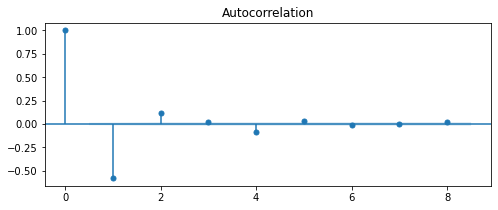

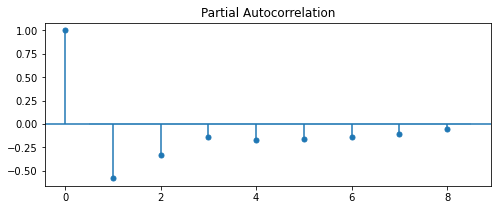

In [175]:
ts_models(Arizona_recent_yrs.value,order=(2,2))

In [195]:
zip_85032=Arizona_recent_yrs[(Arizona_recent_yrs['Zipcode'] == 85032)]

In [196]:
zip_85032

Zipcode State    Metro     value
time                                        
2009-01-01    85032    AZ  Phoenix  190200.0
2009-02-01    85032    AZ  Phoenix  185100.0
2009-03-01    85032    AZ  Phoenix  179900.0
2009-04-01    85032    AZ  Phoenix  174800.0
2009-05-01    85032    AZ  Phoenix  169800.0
...             ...   ...      ...       ...
2017-12-01    85032    AZ  Phoenix  261900.0
2018-01-01    85032    AZ  Phoenix  263100.0
2018-02-01    85032    AZ  Phoenix  264100.0
2018-03-01    85032    AZ  Phoenix  265400.0
2018-04-01    85032    AZ  Phoenix  266400.0

[112 rows x 4 columns]

/Users/matthewreinhart/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/matthewreinhart/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueW

                              ARMA Model Results                              
Dep. Variable:                  value   No. Observations:                  111
Model:                     ARMA(1, 0)   Log Likelihood                -871.394
Method:                       css-mle   S.D. of innovations            612.911
Date:                Mon, 03 Jan 2022   AIC                           1748.789
Time:                        18:31:08   BIC                           1756.917
Sample:                    02-01-2009   HQIC                          1752.086
                         - 04-01-2018                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -398.9200   1778.283     -0.224      0.823   -3884.291    3086.451
ar.L1.value     0.9732      0.022     43.861      0.000       0.930       1.017
                                    Roots       

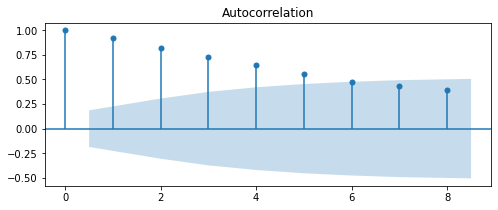

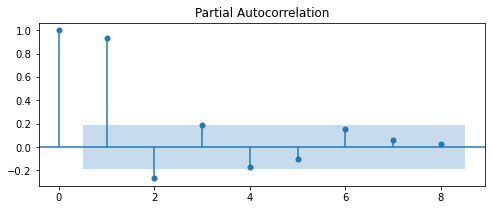

In [198]:
ts_models(zip_85032.value)